<a href="https://colab.research.google.com/github/AMorQ/Statistics/blob/main/LinearRegression_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 1. What is R?
R is a programming language and software environment for statistical computing and graphics. It is widely used in data science, machine learning, and statistical analysis.

Key Features of R:

✅ Open-source and free

✅ Excellent for statistical modeling and visualization

✅ Supports a vast ecosystem of packages via CRAN

✅ Commonly used in academia and research

### 2. What is RStudio?

RStudio is an Integrated Development Environment (IDE) for R that makes working with R easier and more efficient. It provides:

✅ A script editor for writing and running R code

✅ A console to execute commands interactively

✅ Built-in tools for plotting, debugging, and managing variables

✅ Version control integration (Git, SVN)

✅ Markdown support for creating reports



🔹 RStudio has two versions:

RStudio Desktop (runs locally on your machine)


RStudio Server (runs on a remote server and can be accessed via a web browser

# How to approach a given problem:

1) analyze data and propose linear models for establishing a baseline
      a) identify response and predictors

```R
 California <- read.csv("california.dat", comment.char="@", header = FALSE)
 n<-length(names(California)) -1;
 names(California)[1:n] <- paste ("X", 1:n, sep="");  names(California)[n+1] <- "Y"
 temp <- California
 plotY <- function (x,y) {
 plot(temp[,y]~temp[,x], xlab=names(temp)[x], ylab=names(temp)[y])
 }
 par(mfrow=c(2,4)); x<-sapply(1:(dim(temp)[2]-1), plotY, dim(temp)[2]); par(mfrow=c(1,1))
 fitX8 <- lm(Y~X8, California)
 fitX7 <- lm(Y~X7, California)
 fitX4 <- lm(Y~X4, California)
 #.... etc


```
  2) build the multivariate model with ascendant/descendant technique and then add no-linearity/interaction terms
```R
  fit1=lm(Y~X8+I(X8^2)+I(X8^3)+I(log(X3))+I(log(X4/X6))
  +I(log(X5/X6))+I(log(X6/X7))+I(log(X7)),California)
  #Modelo que usa el logaritmo por ser Y=ln(median house value)
  #recomendado en el website que describe el problema
  #Haciendo pruebas y analizando los datos se plantean posibles
  #modelos hasta llegar a uno satisfactorio
  fit2=lm(Y~., California)
  fit3=lm(Y~.+X4*X7*X8, California)
  fit4=lm(Y~.+I(X1^2)+I(X6^2)+I(X8^2)+I(X8^3)+I(X8^4)
  +X7*X8*X4*X5*X6, California)
  summary(fit1)$adj.r.squared
  summary(fit2)$adj.r.squared
  summary(fit3)$adj.r.squared
  summary(fit4)$adj.r.squared
```

  3) to test the capability of the model to generalize, we use K-fold CV (Cross Validation)

  4) Another techniques are tried and the test MSE is compared
```R
nombre <- "california"
run_lm_fold <- function(i, x, tt = "test") {
  file <- paste(x, "-5-", i, "tra.dat", sep=""); x_tra <- read.csv(file, comment.char="@", header = FALSE)
  file <- paste(x, "-5-", i, "tst.dat", sep=""); x_tst <- read.csv(file, comment.char="@", header = FALSE)
  In <- length(names(x_tra)) - 1
  names(x_tra)[1:In] <- paste ("X", 1:In, sep=""); names(x_tra)[In+1] <- "Y"
  names(x_tst)[1:In] <- paste ("X", 1:In, sep=""); names(x_tst)[In+1] <- "Y"
  if (tt == "train") { test <- x_tra }
  else { test <- x_tst }
  fitMulti=lm(Y~.+I(X1^2)+I(X6^2)+I(X8^2)+I(X8^3)
  +I(X8^4)+X7*X8*X4*X5*X6,x_tra)
  yprime=predict(fitMulti,test)
  sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
lmMSEtrain<-mean(sapply(1:5,run_lm_fold,nombre,"train"))
lmMSEtest<-mean(sapply(1:5,run_lm_fold,nombre,"test"))

#Se obtendría también para k-NN y M5 tal cual se hizo antes
```

In [1]:
data() # data(package = .packages(all.available = TRUE))
install.packages("ISLR")
require(MASS)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS



In [2]:
?Boston #fix(Boston) =check-edit (dataset is display in data editor)
#Boston is a dataset containing housing vales in suburbs of Boston

In [3]:
names(Boston) # = colnames(Boston)
str(Boston) #str() function provides a compact display of the internal structure of an R object

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [4]:

Boston$lstat # $ --> access a specific column within a dataframe (dataset)
Boston$rm
Boston$attribute

[1]  4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.10 20.45 13.27
 [13] 15.71  8.26 10.26  8.47  6.58 14.67 11.69 11.28 21.02 13.83 18.72 19.88
 [25] 16.30 16.51 14.81 17.28 12.80 11.98 22.60 13.04 27.71 18.35 20.34  9.68
 [37] 11.41  8.77 10.13  4.32  1.98  4.84  5.81  7.44  9.55 10.21 14.15 18.80
 [49] 30.81 16.20 13.45  9.43  5.28  8.43 14.80  4.81  5.77  3.95  6.86  9.22
 [61] 13.15 14.44  6.73  9.50  8.05  4.67 10.24  8.10 13.09  8.79  6.72  9.88
 [73]  5.52  7.54  6.78  8.94 11.97 10.27 12.34  9.10  5.29  7.22  6.72  7.51
 [85]  9.62  6.53 12.86  8.44  5.50  5.70  8.81  8.20  8.16  6.21 10.59  6.65
 [97] 11.34  4.21  3.57  6.19  9.42  7.67 10.63 13.44 12.33 16.47 18.66 14.09
[109] 12.27 15.55 13.00 10.16 16.21 17.09 10.45 15.76 12.04 10.30 15.37 13.61
[121] 14.37 14.27 17.93 25.41 17.58 14.81 27.26 17.19 15.39 18.34 12.60 12.26
[133] 11.12 15.03 17.31 16.96 16.90 14.59 21.32 18.46 24.16 34.41 26.82 26.42
[145] 29.29 27.80 16.65 29.53 28.32 21.45 14.10 13.28 12.12 15.79 15.12 15.02
[157] 16.14  4.59  6.43  7.39  5.50  1.73  1.92  3.32 11.64  9.81  3.70 12.14
[169] 11.10 11.32 14.43 12.03 14.69  9.04  9.64  5.33 10.11  6.29  6.92  5.04
[181]  7.56  9.45  4.82  5.68 13.98 13.15  4.45  6.68  4.56  5.39  5.10  4.69
[193]  2.87  5.03  4.38  2.97  4.08  8.61  6.62  4.56  4.45  7.43  3.11  3.81
[205]  2.88 10.87 10.97 18.06 14.66 23.09 17.27 23.98 16.03  9.38 29.55  9.47
[217] 13.51  9.69 17.92 10.50  9.71 21.46  9.93  7.60  4.14  4.63  3.13  6.36
[229]  3.92  3.76 11.65  5.25  2.47  3.95  8.05 10.88  9.54  4.73  6.36  7.37
[241] 11.38 12.40 11.22  5.19 12.50 18.46  9.16 10.15  9.52  6.56  5.90  3.59
[253]  3.53  3.54  6.57  9.25  3.11  5.12  7.79  6.90  9.59  7.26  5.91 11.25
[265]  8.10 10.45 14.79  7.44  3.16 13.65 13.00  6.59  7.73  6.58  3.53  2.98
[277]  6.05  4.16  7.19  4.85  3.76  4.59  3.01  3.16  7.85  8.23 12.93  7.14
[289]  7.60  9.51  3.33  3.56  4.70  8.58 10.40  6.27  7.39 15.84  4.97  4.74
[301]  6.07  9.50  8.67  4.86  6.93  8.93  6.47  7.53  4.54  9.97 12.64  5.98
[313] 11.72  7.90  9.28 11.50 18.33 15.94 10.36 12.73  7.20  6.87  7.70 11.74
[325]  6.12  5.08  6.15 12.79  9.97  7.34  9.09 12.43  7.83  5.68  6.75  8.01
[337]  9.80 10.56  8.51  9.74  9.29  5.49  8.65  7.18  4.61 10.53 12.67  6.36
[349]  5.99  5.89  5.98  5.49  7.79  4.50  8.05  5.57 17.60 13.27 11.48 12.67
[361]  7.79 14.19 10.19 14.64  5.29  7.12 14.00 13.33  3.26  3.73  2.96  9.53
[373]  8.88 34.77 37.97 13.44 23.24 21.24 23.69 21.78 17.21 21.08 23.60 24.56
[385] 30.63 30.81 28.28 31.99 30.62 20.85 17.11 18.76 25.68 15.17 16.35 17.12
[397] 19.37 19.92 30.59 29.97 26.77 20.32 20.31 19.77 27.38 22.98 23.34 12.13
[409] 26.40 19.78 10.11 21.22 34.37 20.08 36.98 29.05 25.79 26.64 20.62 22.74
[421] 15.02 15.70 14.10 23.29 17.16 24.39 15.69 14.52 21.52 24.08 17.64 19.69
[433] 12.03 16.22 15.17 23.27 18.05 26.45 34.02 22.88 22.11 19.52 16.59 18.85
[445] 23.79 23.98 17.79 16.44 18.13 19.31 17.44 17.73 17.27 16.74 18.71 18.13
[457] 19.01 16.94 16.23 14.70 16.42 14.65 13.99 10.29 13.22 14.13 17.15 21.32
[469] 18.13 14.76 16.29 12.87 14.36 11.66 18.14 24.10 18.68 24.91 18.03 13.11
[481] 10.74  7.74  7.01 10.42 13.34 10.58 14.98 11.45 18.06 23.97 29.68 18.07
[493] 13.35 12.01 13.59 17.60 21.14 14.10 12.92 15.10 14.33  9.67  9.08  5.64
[505]  6.48  7.88

[1] 6.575 6.421 7.185 6.998 7.147 6.430 6.012 6.172 5.631 6.004 6.377 6.009
 [13] 5.889 5.949 6.096 5.834 5.935 5.990 5.456 5.727 5.570 5.965 6.142 5.813
 [25] 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.950 5.701 6.096 5.933
 [37] 5.841 5.850 5.966 6.595 7.024 6.770 6.169 6.211 6.069 5.682 5.786 6.030
 [49] 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 [61] 5.741 5.966 6.456 6.762 7.104 6.290 5.787 5.878 5.594 5.885 6.417 5.961
 [73] 6.065 6.245 6.273 6.286 6.279 6.140 6.232 5.874 6.727 6.619 6.302 6.167
 [85] 6.389 6.630 6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 [97] 6.163 8.069 7.820 7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
[109] 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
[121] 5.870 6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
[133] 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
[145] 4.903 6.130 5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
[157] 5.272 6.943 6.066 6.510 6.250 7.489 7.802 8.375 5.854 6.101 7.929 5.877
[169] 6.319 6.402 5.875 5.880 5.572 6.416 5.859 6.546 6.020 6.315 6.860 6.980
[181] 7.765 6.144 7.155 6.563 5.604 6.153 7.831 6.782 6.556 7.185 6.951 6.739
[193] 7.178 6.800 6.604 7.875 7.287 7.107 7.274 6.975 7.135 6.162 7.610 7.853
[205] 8.034 5.891 6.326 5.783 6.064 5.344 5.960 5.404 5.807 6.375 5.412 6.182
[217] 5.888 6.642 5.951 6.373 6.951 6.164 6.879 6.618 8.266 8.725 8.040 7.163
[229] 7.686 6.552 5.981 7.412 8.337 8.247 6.726 6.086 6.631 7.358 6.481 6.606
[241] 6.897 6.095 6.358 6.393 5.593 5.605 6.108 6.226 6.433 6.718 6.487 6.438
[253] 6.957 8.259 6.108 5.876 7.454 8.704 7.333 6.842 7.203 7.520 8.398 7.327
[265] 7.206 5.560 7.014 8.297 7.470 5.920 5.856 6.240 6.538 7.691 6.758 6.854
[277] 7.267 6.826 6.482 6.812 7.820 6.968 7.645 7.923 7.088 6.453 6.230 6.209
[289] 6.315 6.565 6.861 7.148 6.630 6.127 6.009 6.678 6.549 5.790 6.345 7.041
[301] 6.871 6.590 6.495 6.982 7.236 6.616 7.420 6.849 6.635 5.972 4.973 6.122
[313] 6.023 6.266 6.567 5.705 5.914 5.782 6.382 6.113 6.426 6.376 6.041 5.708
[325] 6.415 6.431 6.312 6.083 5.868 6.333 6.144 5.706 6.031 6.316 6.310 6.037
[337] 5.869 5.895 6.059 5.985 5.968 7.241 6.540 6.696 6.874 6.014 5.898 6.516
[349] 6.635 6.939 6.490 6.579 5.884 6.728 5.663 5.936 6.212 6.395 6.127 6.112
[361] 6.398 6.251 5.362 5.803 8.780 3.561 4.963 3.863 4.970 6.683 7.016 6.216
[373] 5.875 4.906 4.138 7.313 6.649 6.794 6.380 6.223 6.968 6.545 5.536 5.520
[385] 4.368 5.277 4.652 5.000 4.880 5.390 5.713 6.051 5.036 6.193 5.887 6.471
[397] 6.405 5.747 5.453 5.852 5.987 6.343 6.404 5.349 5.531 5.683 4.138 5.608
[409] 5.617 6.852 5.757 6.657 4.628 5.155 4.519 6.434 6.782 5.304 5.957 6.824
[421] 6.411 6.006 5.648 6.103 5.565 5.896 5.837 6.202 6.193 6.380 6.348 6.833
[433] 6.425 6.436 6.208 6.629 6.461 6.152 5.935 5.627 5.818 6.406 6.219 6.485
[445] 5.854 6.459 6.341 6.251 6.185 6.417 6.749 6.655 6.297 7.393 6.728 6.525
[457] 5.976 5.936 6.301 6.081 6.701 6.376 6.317 6.513 6.209 5.759 5.952 6.003
[469] 5.926 5.713 6.167 6.229 6.437 6.980 5.427 6.162 6.484 5.304 6.185 6.229
[481] 6.242 6.750 7.061 5.762 5.871 6.312 6.114 5.905 5.454 5.414 5.093 5.983
[493] 5.983 5.707 5.926 5.670 5.390 5.794 6.019 5.569 6.027 6.593 6.120 6.976
[505] 6.794 6.030

NULL

In [5]:
attach(Boston) #making objects within a dataframe/list directly accesible by their names (no need using $ operator)
#create a search path for R to find objects
lstat # direct access to the fields
detach(Boston) #erases the object from the environment

[1]  4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.10 20.45 13.27
 [13] 15.71  8.26 10.26  8.47  6.58 14.67 11.69 11.28 21.02 13.83 18.72 19.88
 [25] 16.30 16.51 14.81 17.28 12.80 11.98 22.60 13.04 27.71 18.35 20.34  9.68
 [37] 11.41  8.77 10.13  4.32  1.98  4.84  5.81  7.44  9.55 10.21 14.15 18.80
 [49] 30.81 16.20 13.45  9.43  5.28  8.43 14.80  4.81  5.77  3.95  6.86  9.22
 [61] 13.15 14.44  6.73  9.50  8.05  4.67 10.24  8.10 13.09  8.79  6.72  9.88
 [73]  5.52  7.54  6.78  8.94 11.97 10.27 12.34  9.10  5.29  7.22  6.72  7.51
 [85]  9.62  6.53 12.86  8.44  5.50  5.70  8.81  8.20  8.16  6.21 10.59  6.65
 [97] 11.34  4.21  3.57  6.19  9.42  7.67 10.63 13.44 12.33 16.47 18.66 14.09
[109] 12.27 15.55 13.00 10.16 16.21 17.09 10.45 15.76 12.04 10.30 15.37 13.61
[121] 14.37 14.27 17.93 25.41 17.58 14.81 27.26 17.19 15.39 18.34 12.60 12.26
[133] 11.12 15.03 17.31 16.96 16.90 14.59 21.32 18.46 24.16 34.41 26.82 26.42
[145] 29.29 27.80 16.65 29.53 28.32 21.45 14.10 13.28 12.12 15.79 15.12 15.02
[157] 16.14  4.59  6.43  7.39  5.50  1.73  1.92  3.32 11.64  9.81  3.70 12.14
[169] 11.10 11.32 14.43 12.03 14.69  9.04  9.64  5.33 10.11  6.29  6.92  5.04
[181]  7.56  9.45  4.82  5.68 13.98 13.15  4.45  6.68  4.56  5.39  5.10  4.69
[193]  2.87  5.03  4.38  2.97  4.08  8.61  6.62  4.56  4.45  7.43  3.11  3.81
[205]  2.88 10.87 10.97 18.06 14.66 23.09 17.27 23.98 16.03  9.38 29.55  9.47
[217] 13.51  9.69 17.92 10.50  9.71 21.46  9.93  7.60  4.14  4.63  3.13  6.36
[229]  3.92  3.76 11.65  5.25  2.47  3.95  8.05 10.88  9.54  4.73  6.36  7.37
[241] 11.38 12.40 11.22  5.19 12.50 18.46  9.16 10.15  9.52  6.56  5.90  3.59
[253]  3.53  3.54  6.57  9.25  3.11  5.12  7.79  6.90  9.59  7.26  5.91 11.25
[265]  8.10 10.45 14.79  7.44  3.16 13.65 13.00  6.59  7.73  6.58  3.53  2.98
[277]  6.05  4.16  7.19  4.85  3.76  4.59  3.01  3.16  7.85  8.23 12.93  7.14
[289]  7.60  9.51  3.33  3.56  4.70  8.58 10.40  6.27  7.39 15.84  4.97  4.74
[301]  6.07  9.50  8.67  4.86  6.93  8.93  6.47  7.53  4.54  9.97 12.64  5.98
[313] 11.72  7.90  9.28 11.50 18.33 15.94 10.36 12.73  7.20  6.87  7.70 11.74
[325]  6.12  5.08  6.15 12.79  9.97  7.34  9.09 12.43  7.83  5.68  6.75  8.01
[337]  9.80 10.56  8.51  9.74  9.29  5.49  8.65  7.18  4.61 10.53 12.67  6.36
[349]  5.99  5.89  5.98  5.49  7.79  4.50  8.05  5.57 17.60 13.27 11.48 12.67
[361]  7.79 14.19 10.19 14.64  5.29  7.12 14.00 13.33  3.26  3.73  2.96  9.53
[373]  8.88 34.77 37.97 13.44 23.24 21.24 23.69 21.78 17.21 21.08 23.60 24.56
[385] 30.63 30.81 28.28 31.99 30.62 20.85 17.11 18.76 25.68 15.17 16.35 17.12
[397] 19.37 19.92 30.59 29.97 26.77 20.32 20.31 19.77 27.38 22.98 23.34 12.13
[409] 26.40 19.78 10.11 21.22 34.37 20.08 36.98 29.05 25.79 26.64 20.62 22.74
[421] 15.02 15.70 14.10 23.29 17.16 24.39 15.69 14.52 21.52 24.08 17.64 19.69
[433] 12.03 16.22 15.17 23.27 18.05 26.45 34.02 22.88 22.11 19.52 16.59 18.85
[445] 23.79 23.98 17.79 16.44 18.13 19.31 17.44 17.73 17.27 16.74 18.71 18.13
[457] 19.01 16.94 16.23 14.70 16.42 14.65 13.99 10.29 13.22 14.13 17.15 21.32
[469] 18.13 14.76 16.29 12.87 14.36 11.66 18.14 24.10 18.68 24.91 18.03 13.11
[481] 10.74  7.74  7.01 10.42 13.34 10.58 14.98 11.45 18.06 23.97 29.68 18.07
[493] 13.35 12.01 13.59 17.60 21.14 14.10 12.92 15.10 14.33  9.67  9.08  5.64
[505]  6.48  7.88

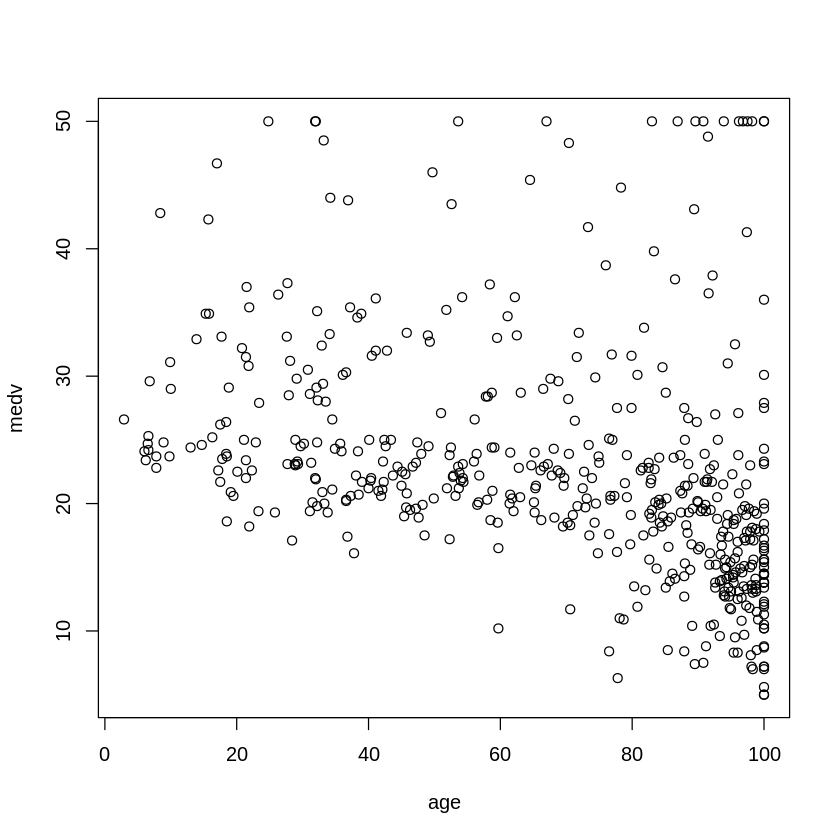

In [6]:
# CORRELATION BETWEEN VARIABLES

plot(medv~age, Boston) #scattered plots medv variable against age variable

#FIND THE LINEAR CORRELATION

[1] 0.04018791


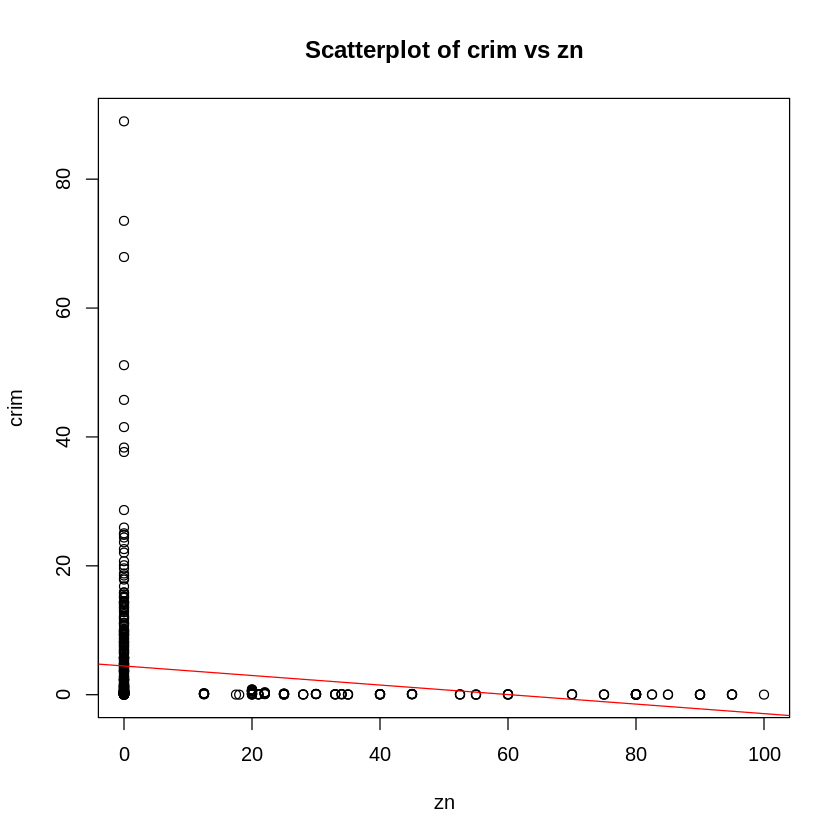

[1] 0.1653101


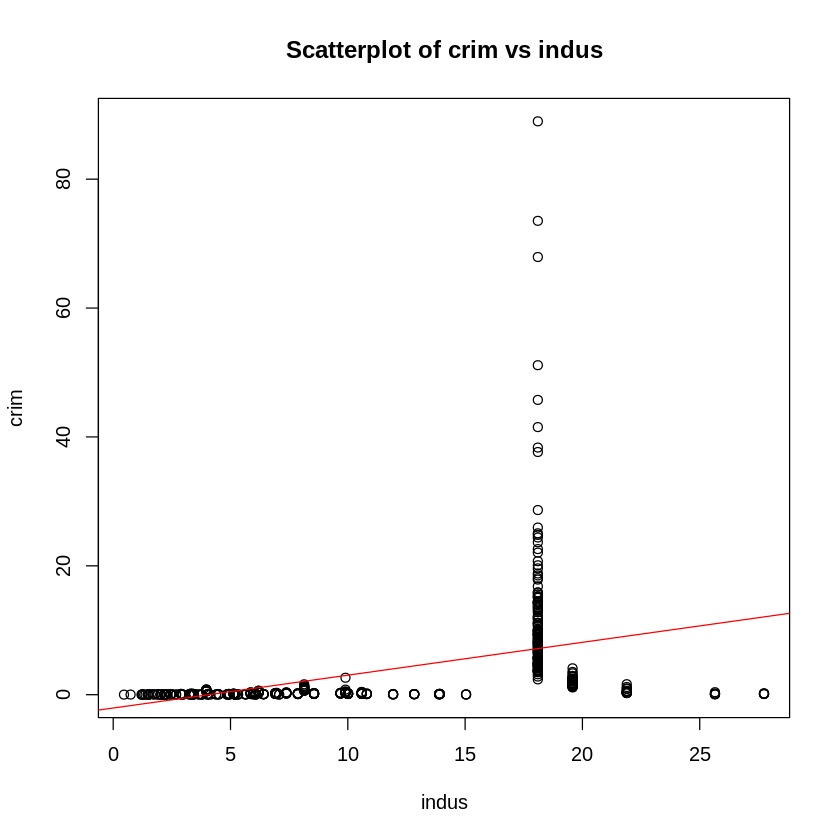

[1] 0.003123869


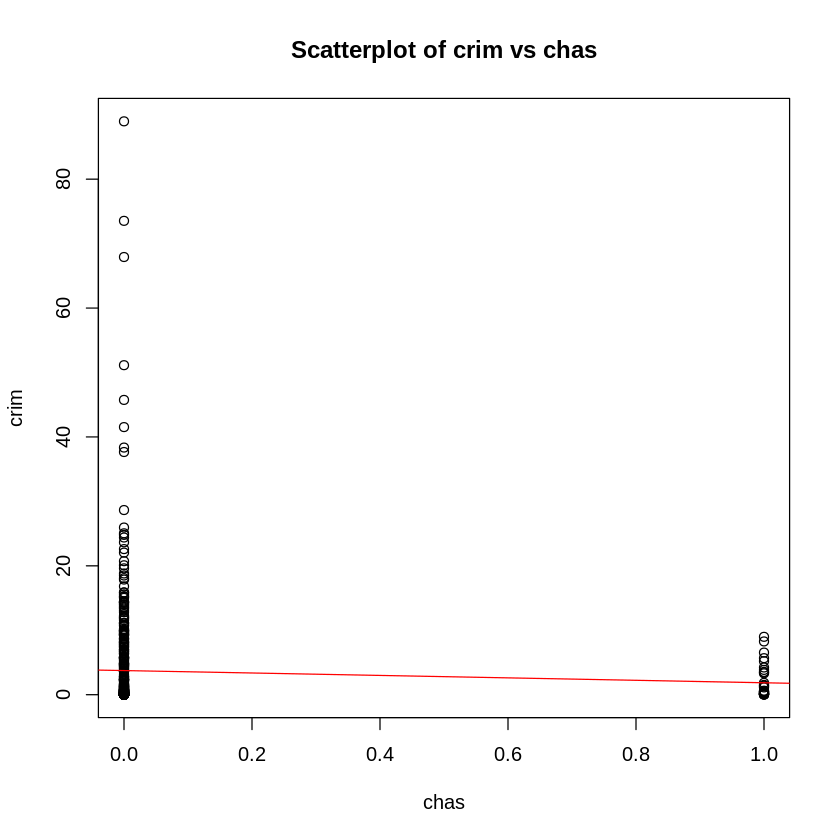

[1] 0.1772172


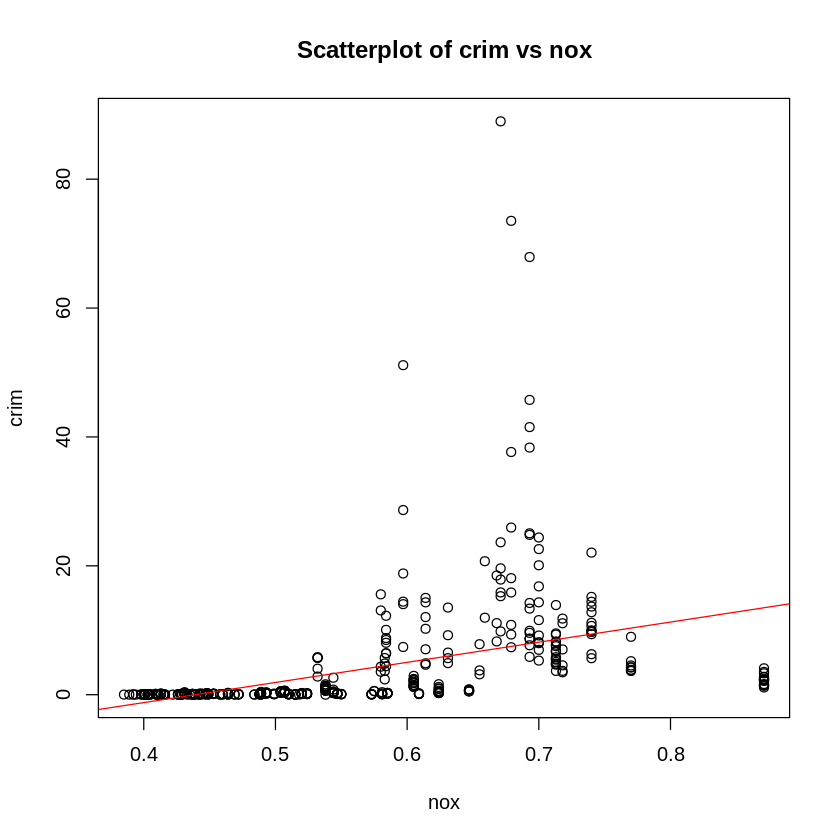

[1] 0.04806912


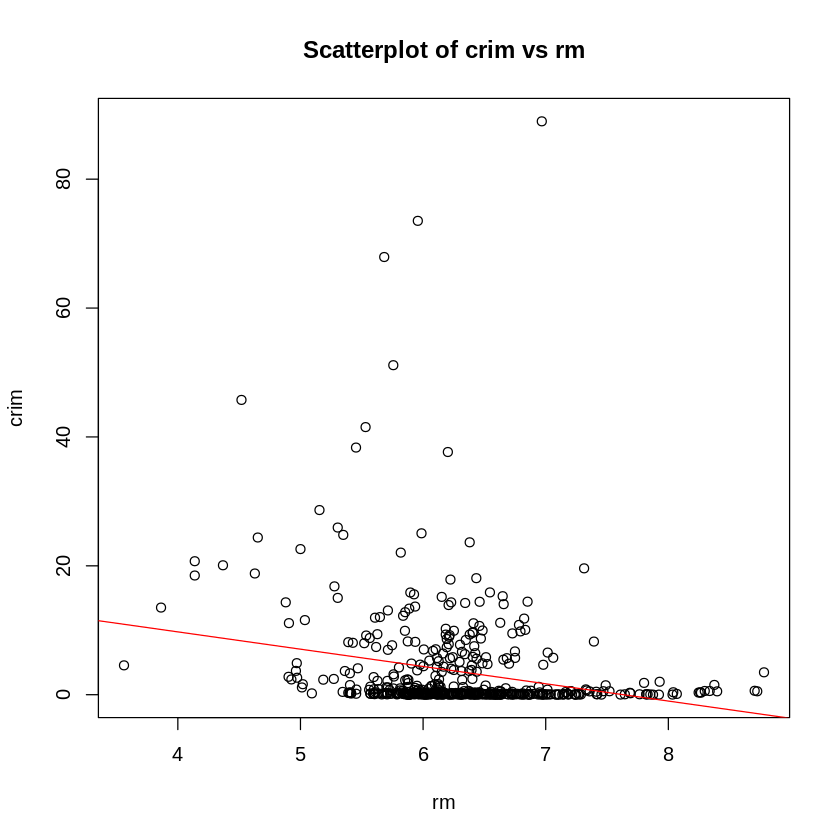

[1] 0.1244215


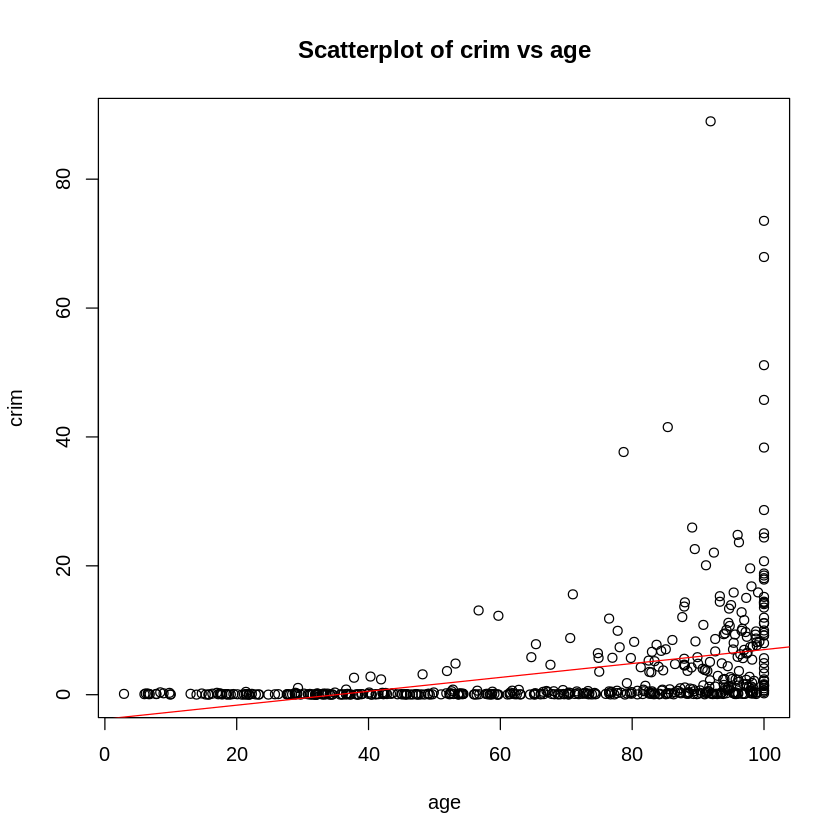

[1] 0.1441494


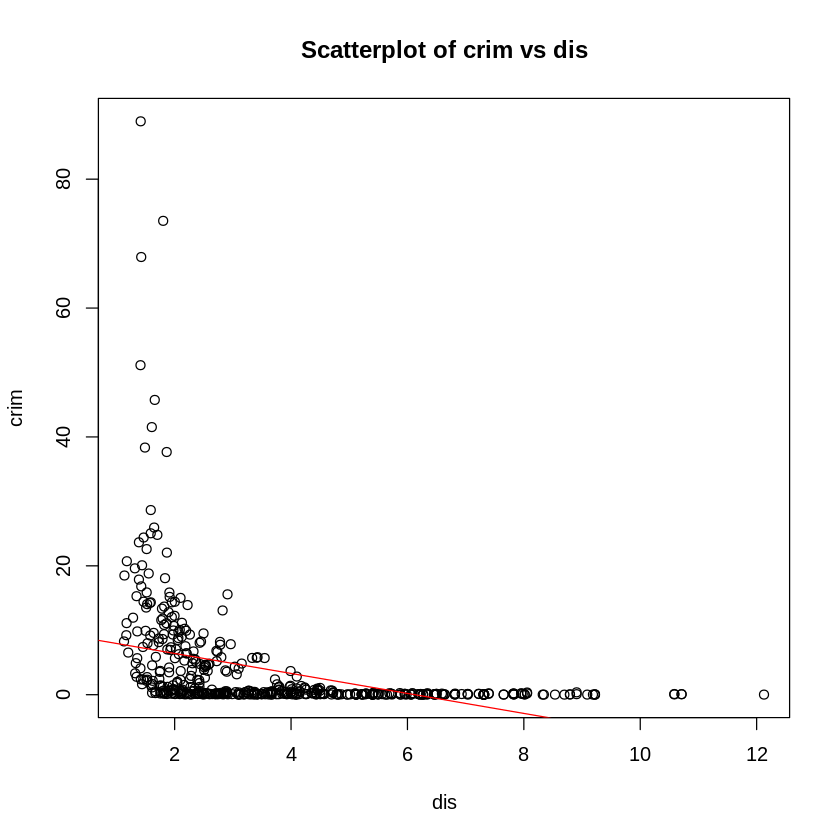

[1] 0.3912567


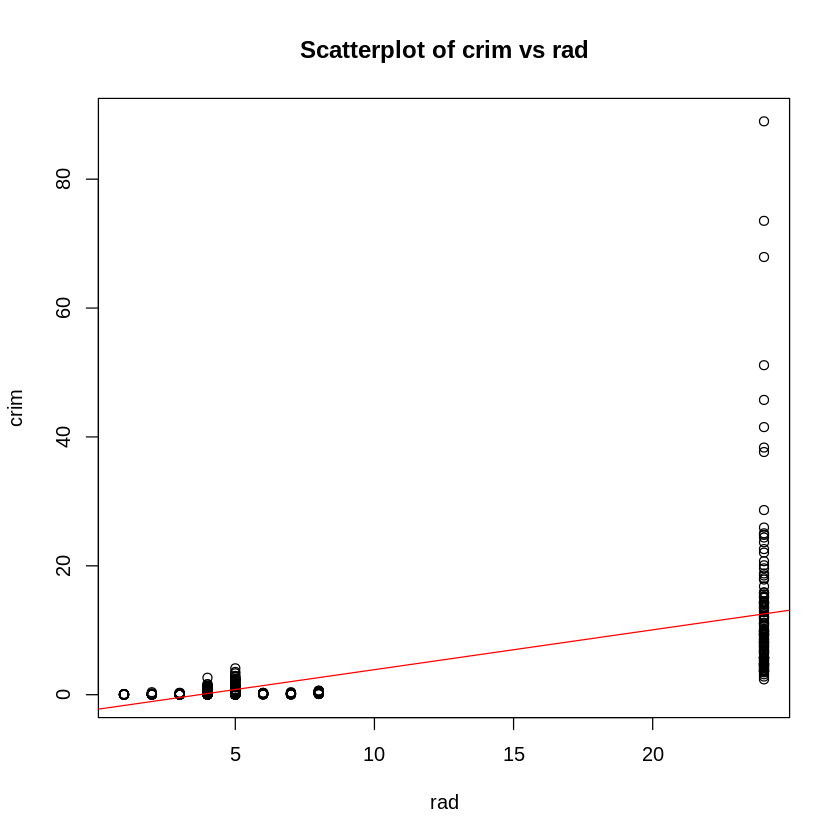

[1] 0.3396142


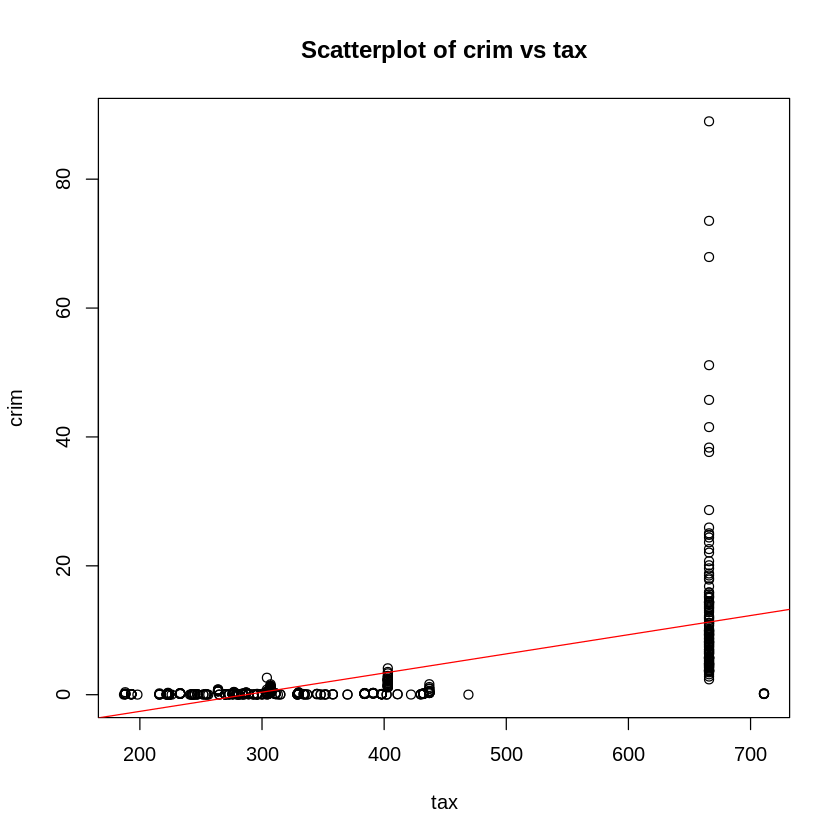

[1] 0.08406844


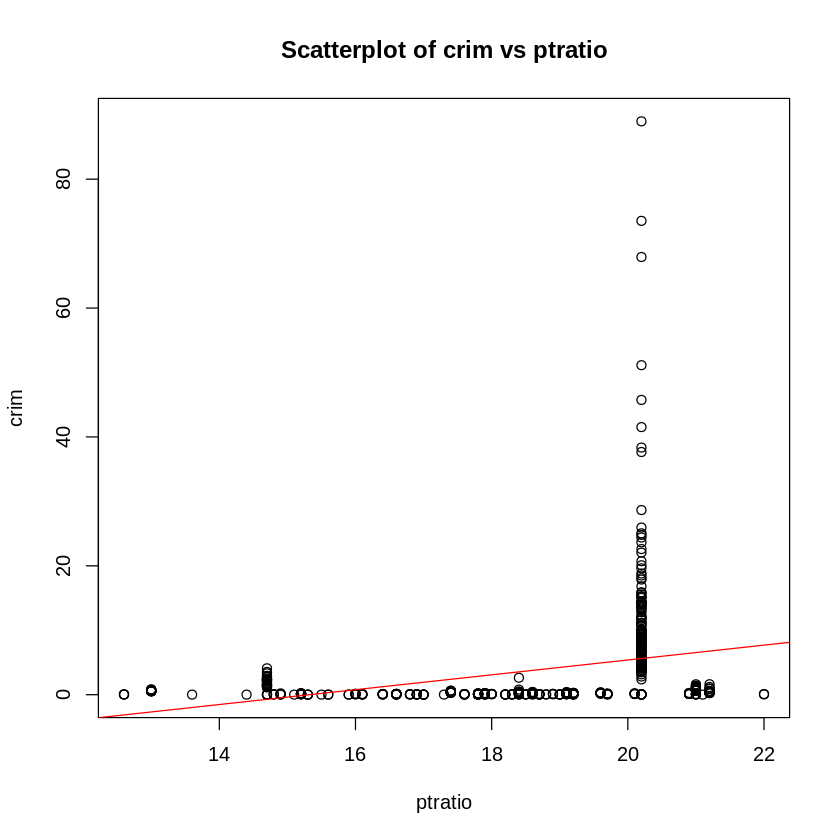

[1] 0.1482742


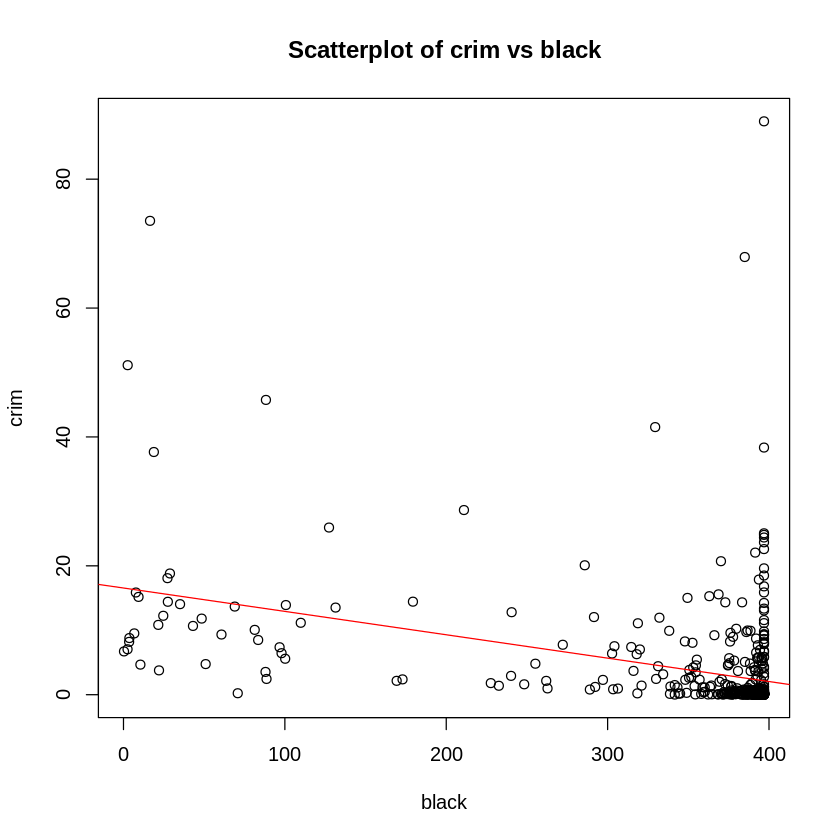

[1] 0.2075909


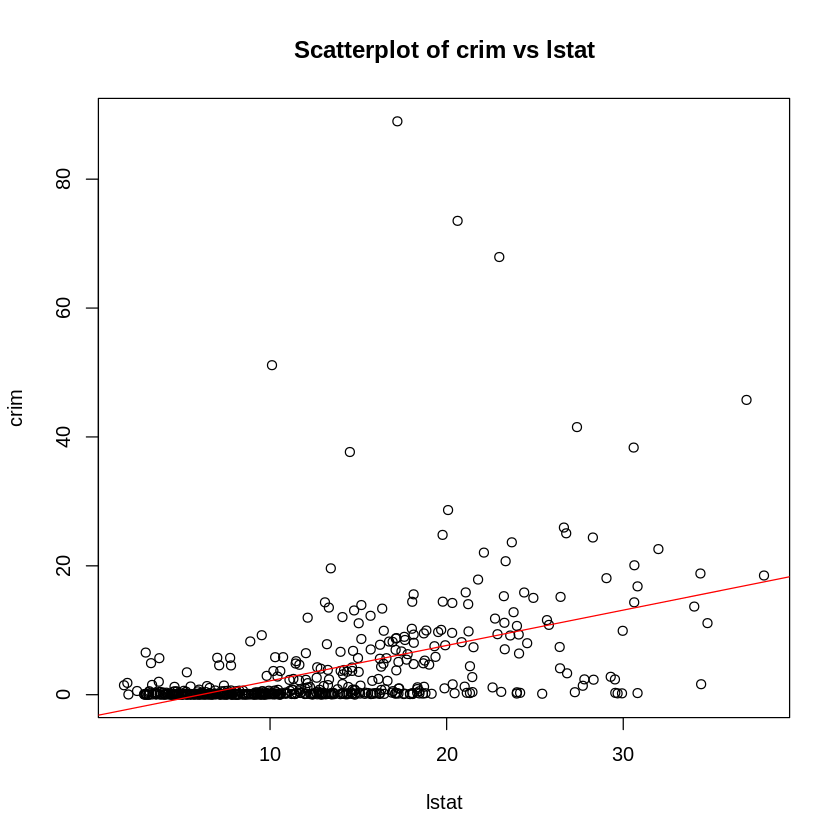

[1] 0.1507805


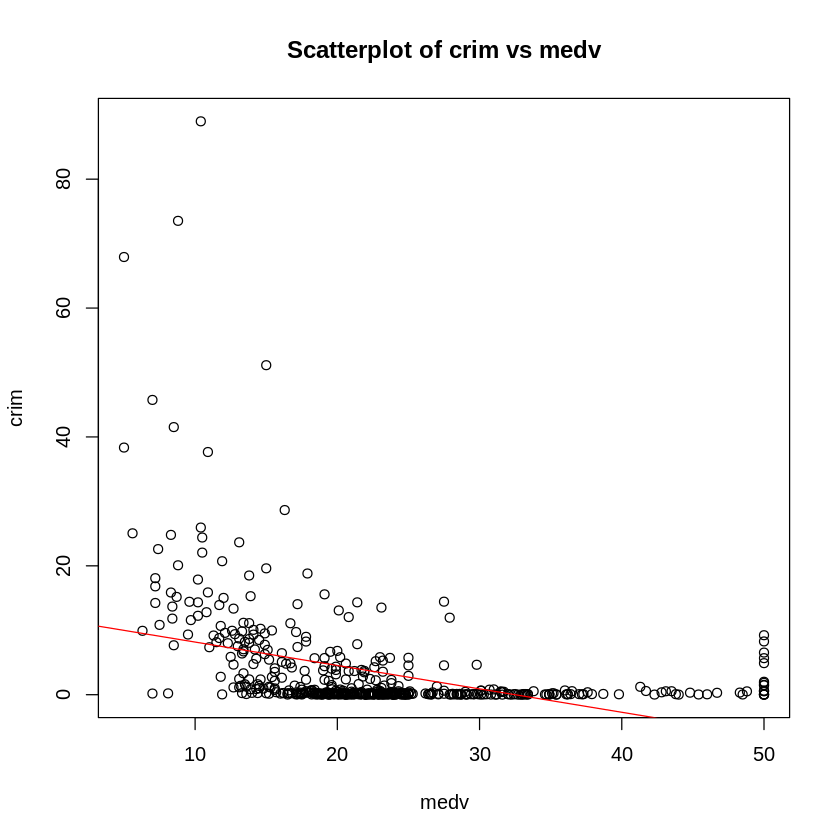

[1] 0.2849725


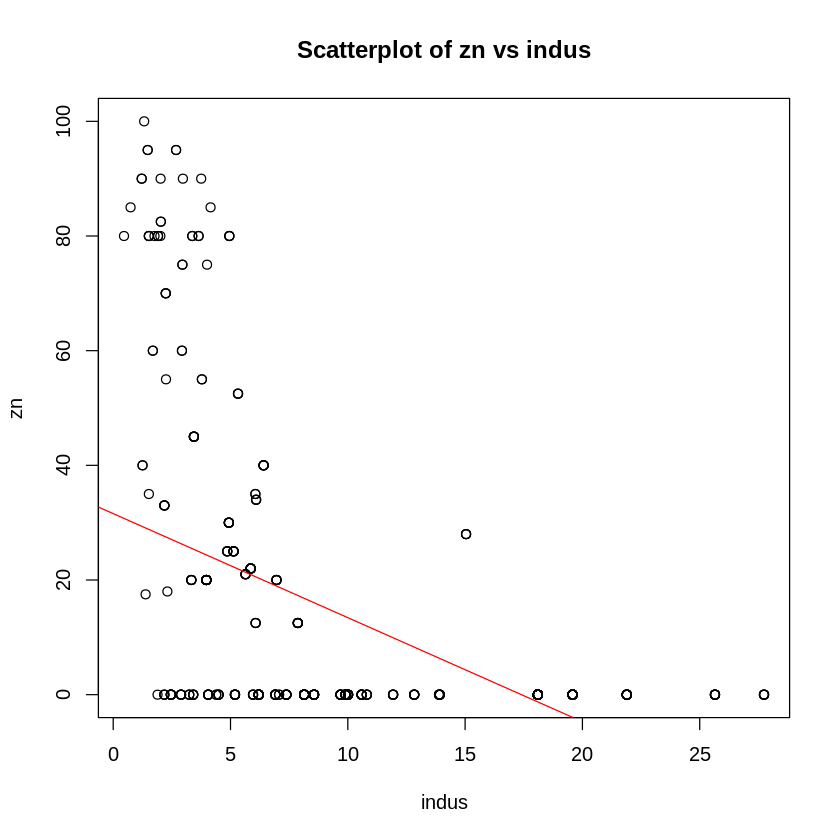

[1] 0.00182301


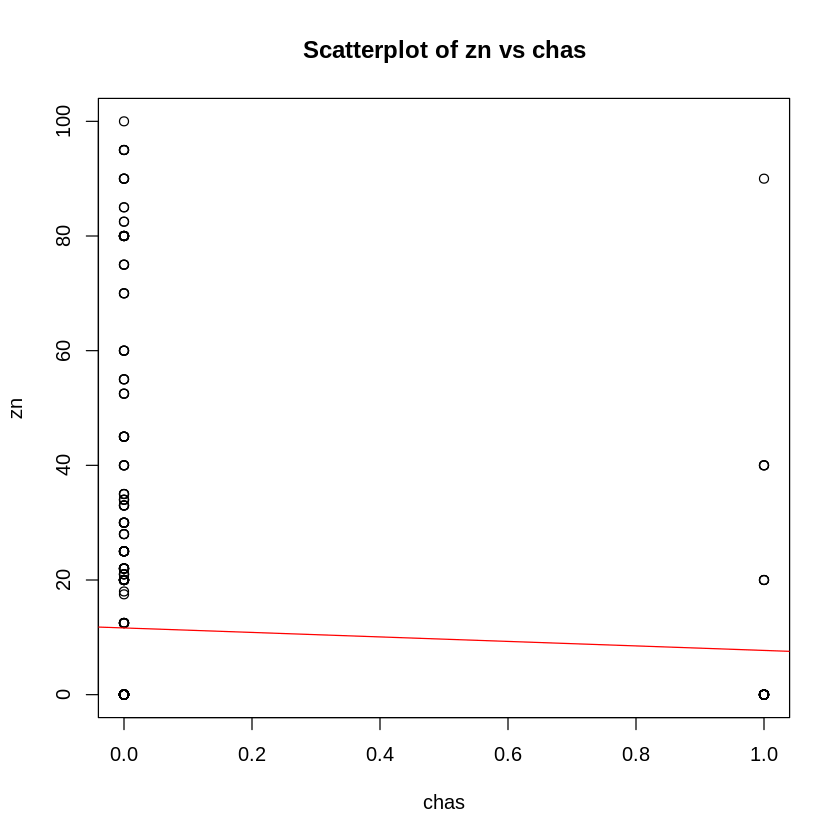

[1] 0.2668794


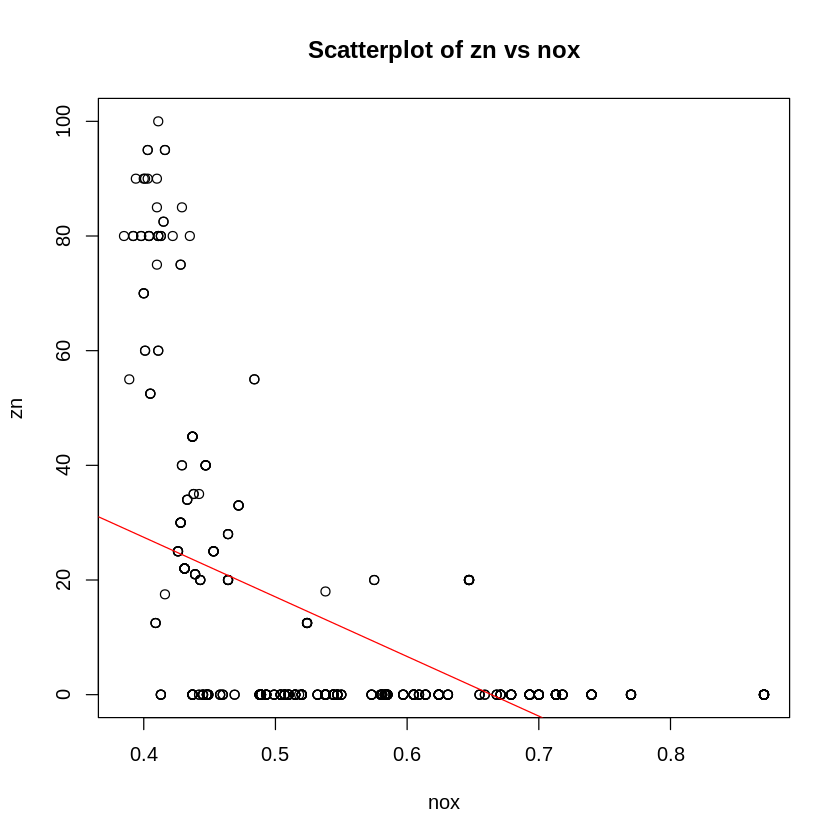

[1] 0.09733813


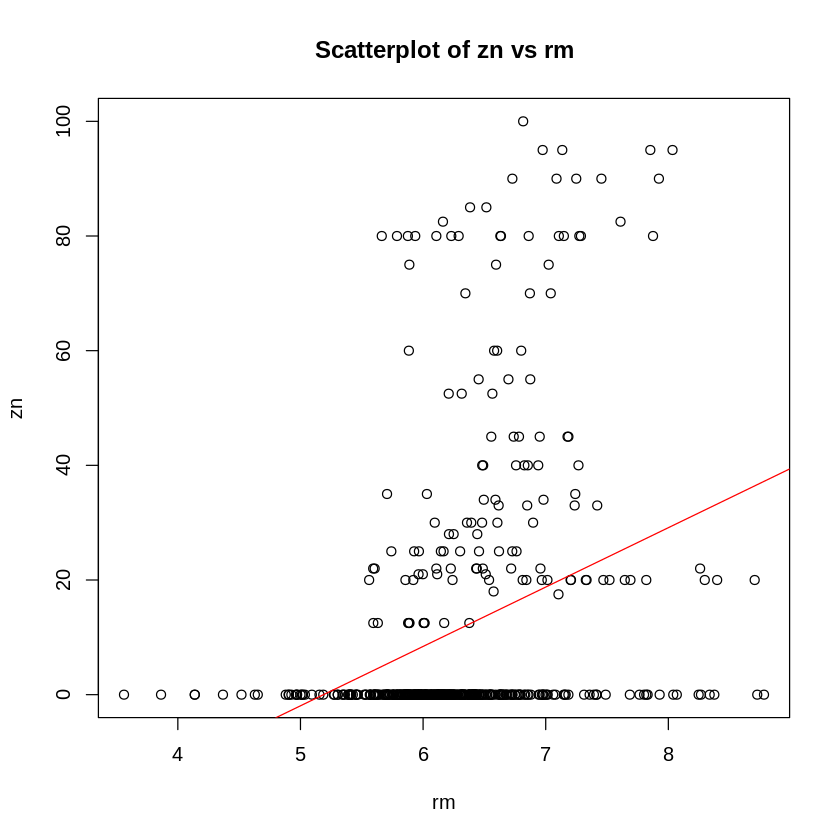

[1] 0.3243728


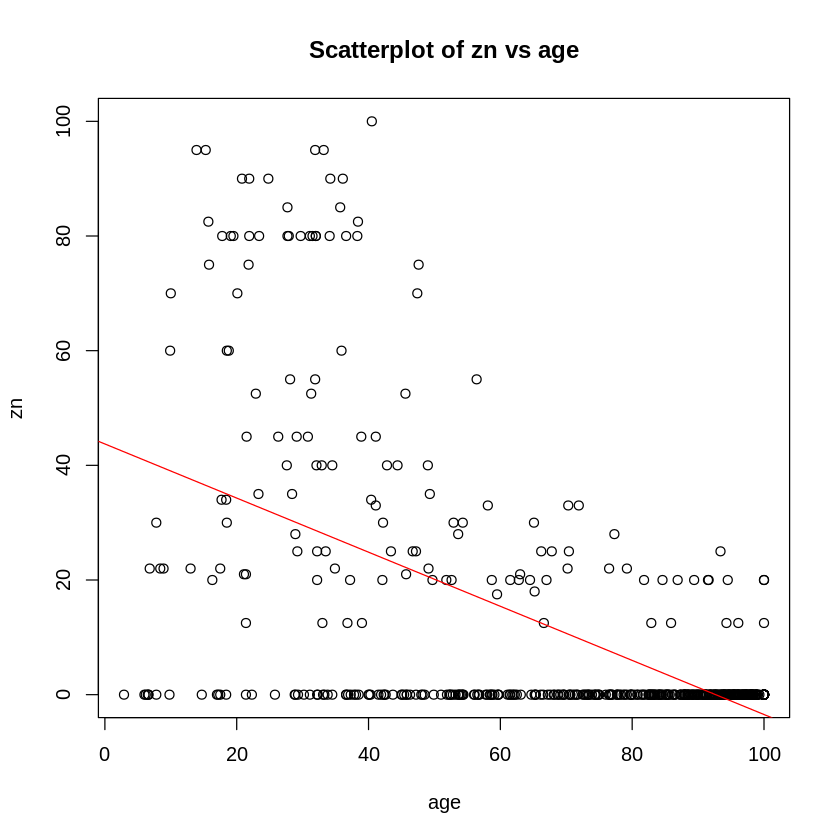

[1] 0.4414383


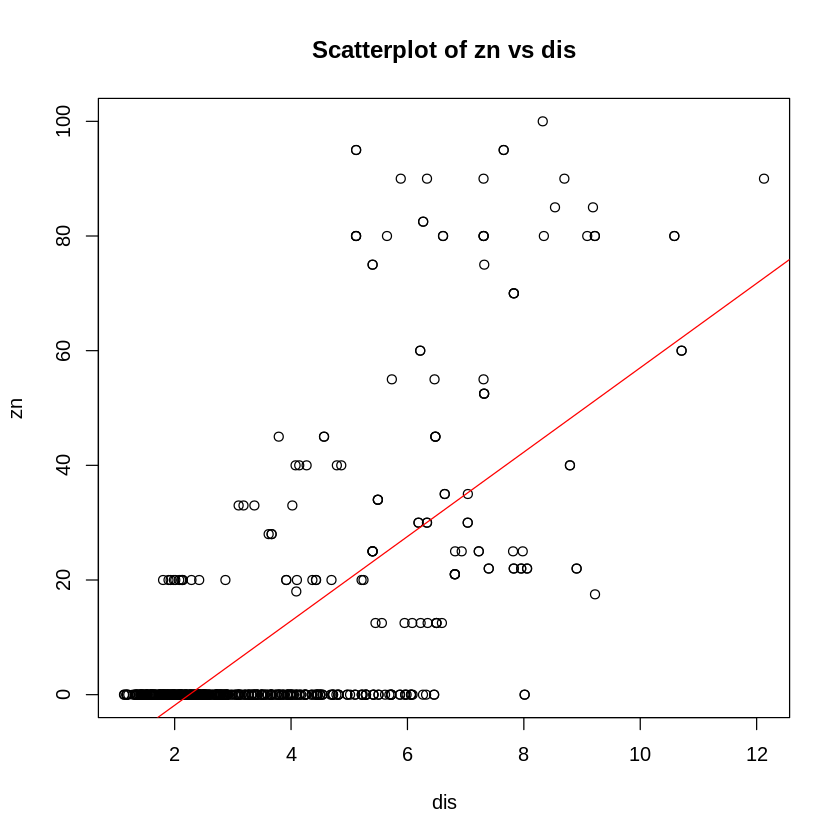

[1] 0.09731145


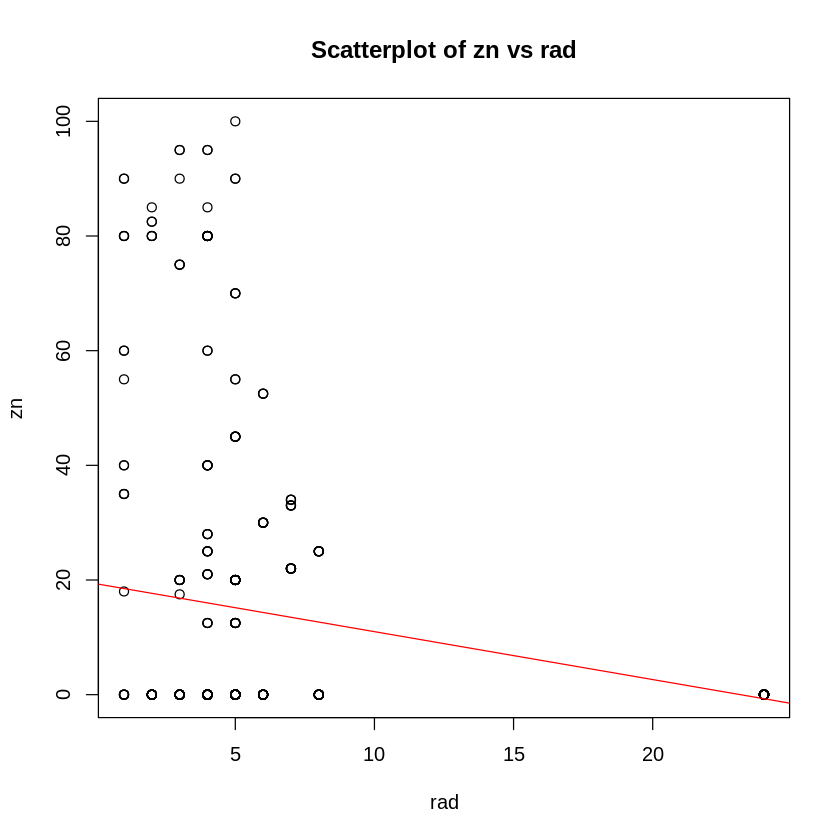

[1] 0.09895009


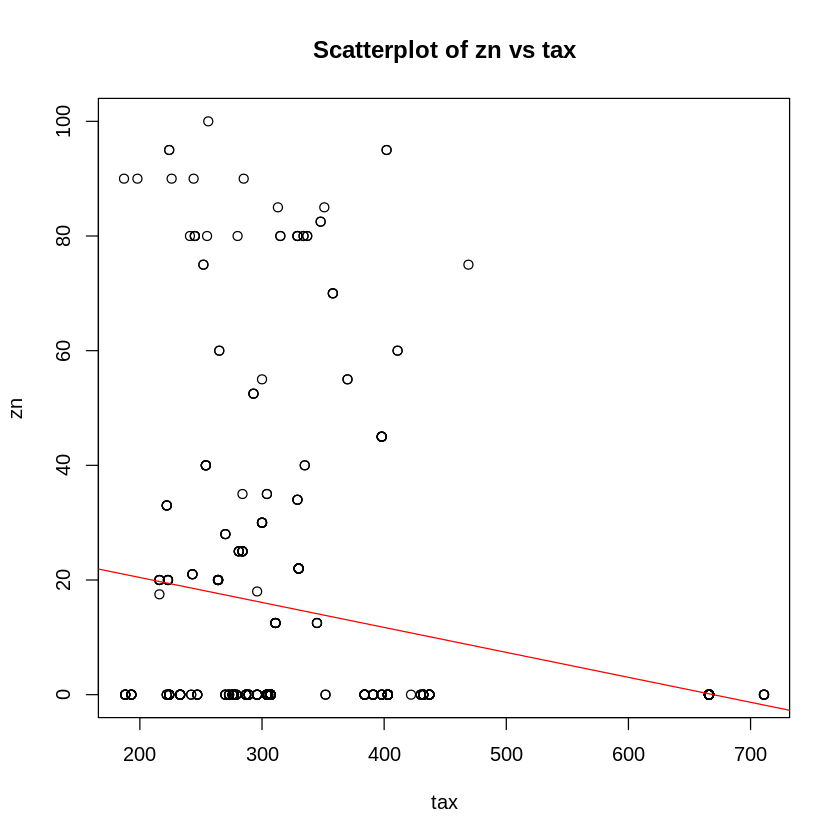

[1] 0.1534121


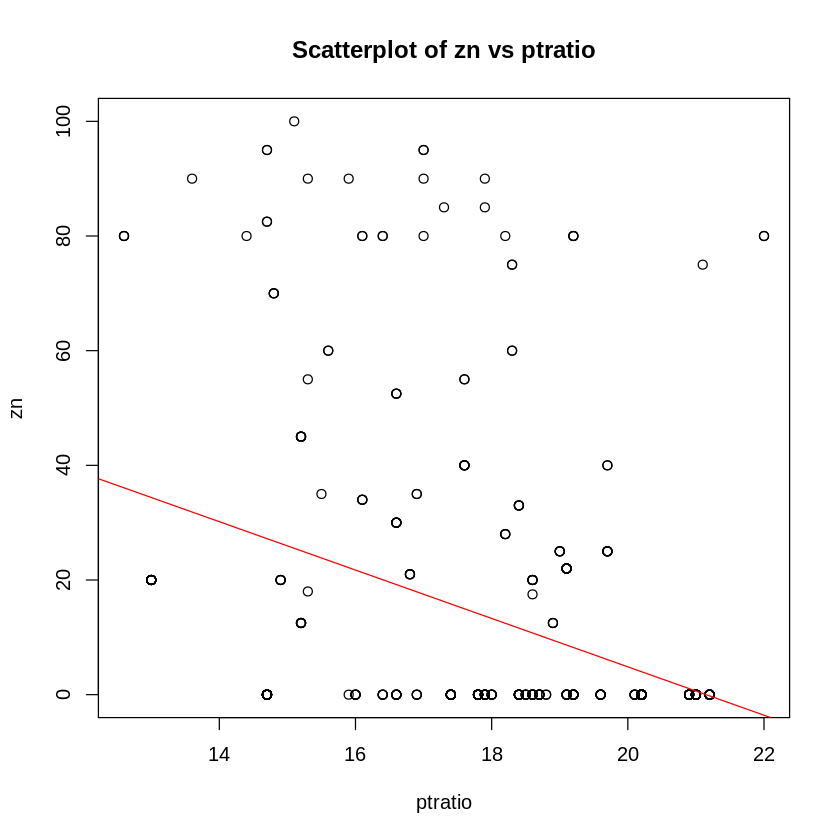

[1] 0.03080738


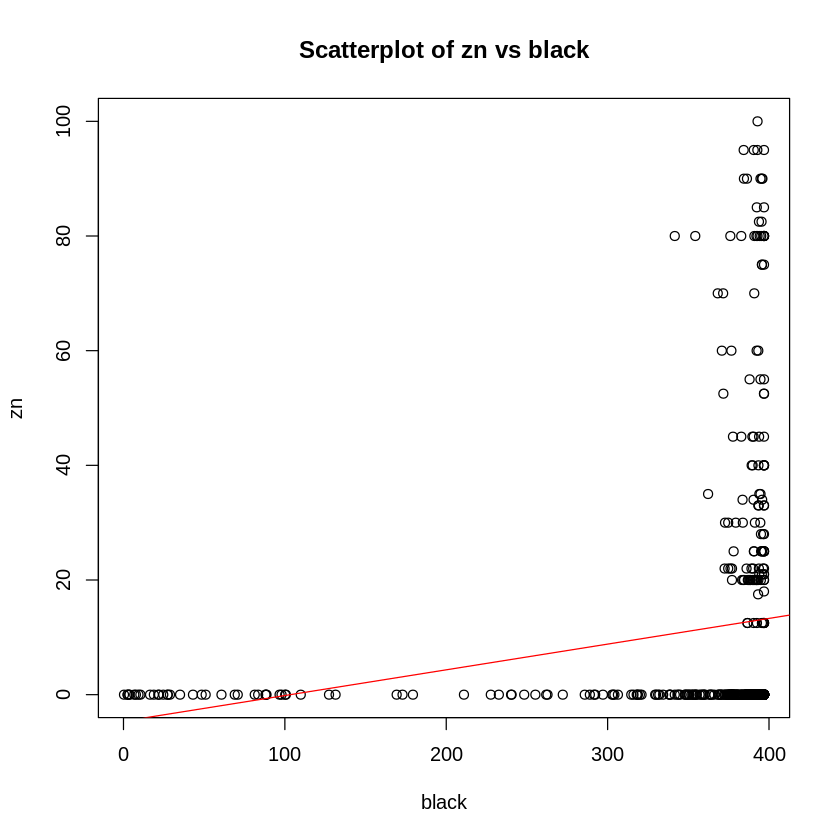

[1] 0.1705645


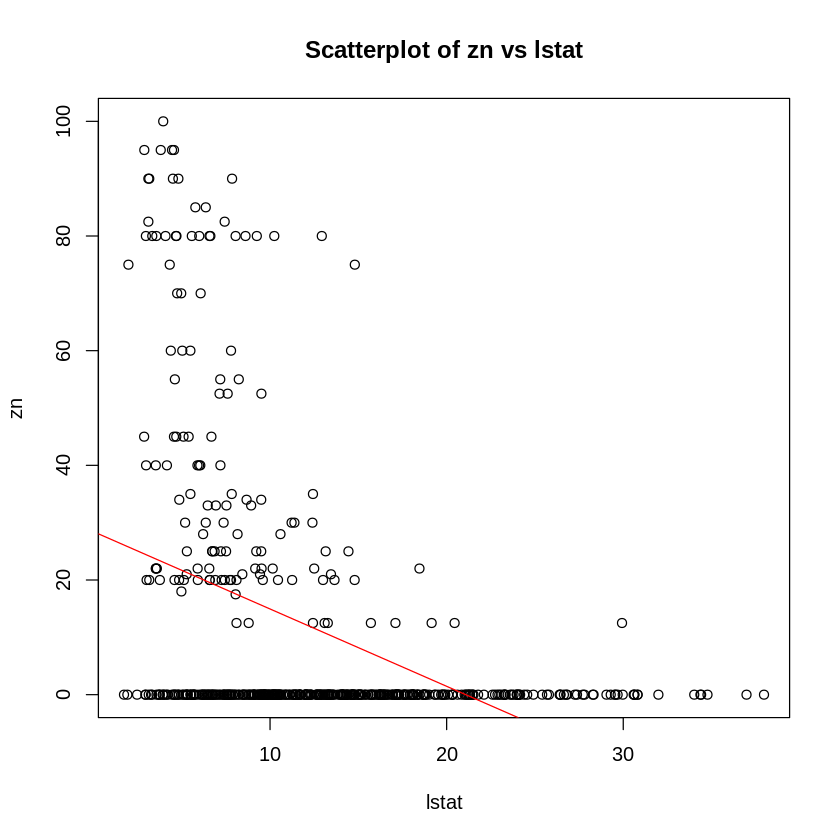

[1] 0.1299208


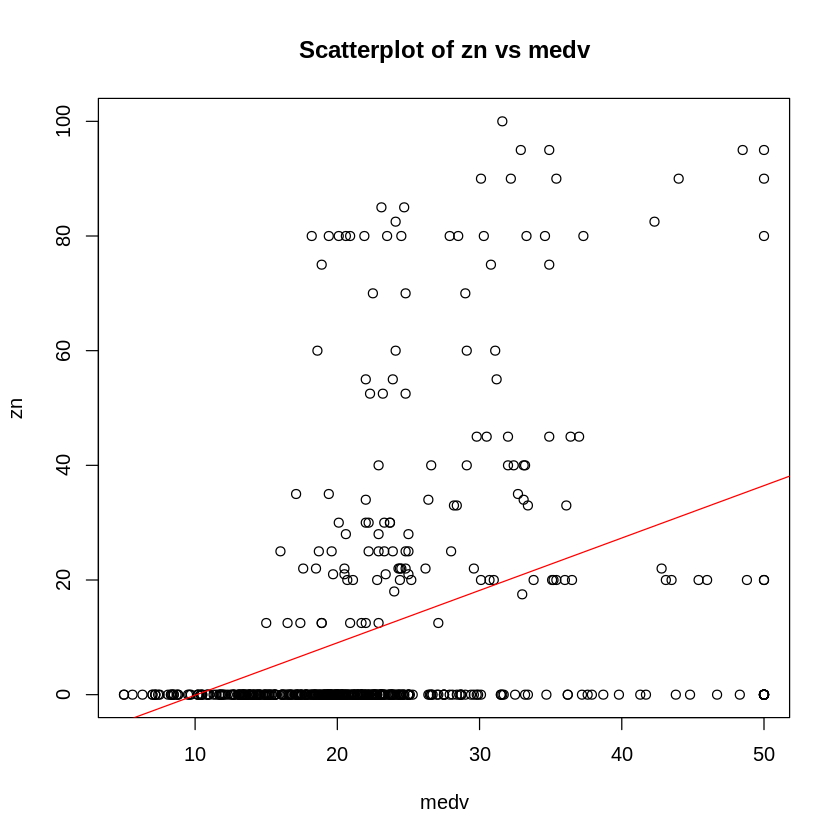

[1] 0.003961195


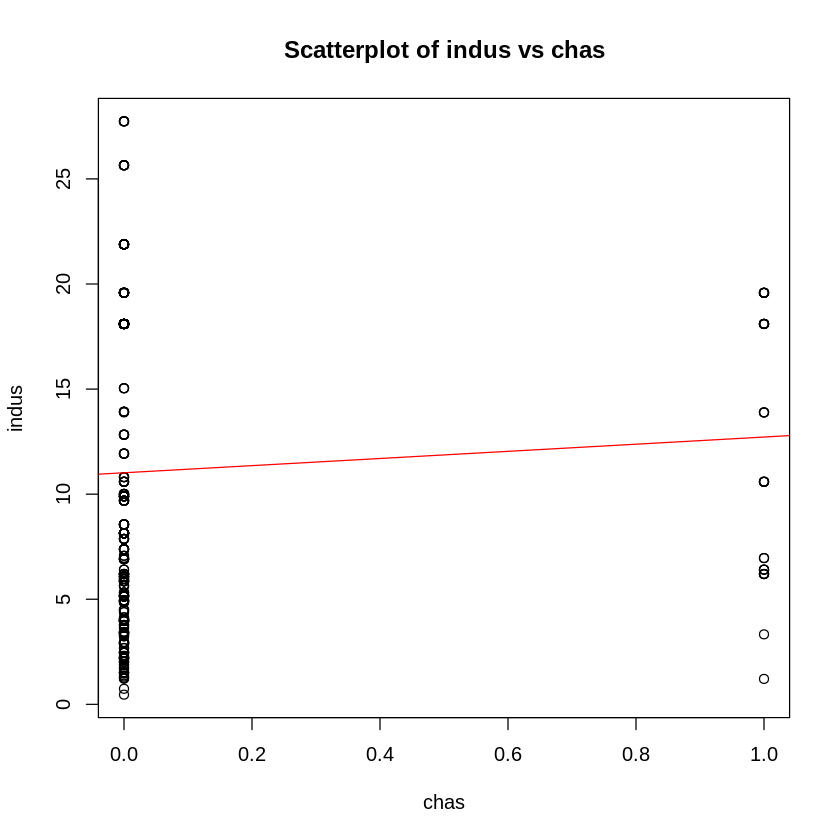

[1] 0.5831635


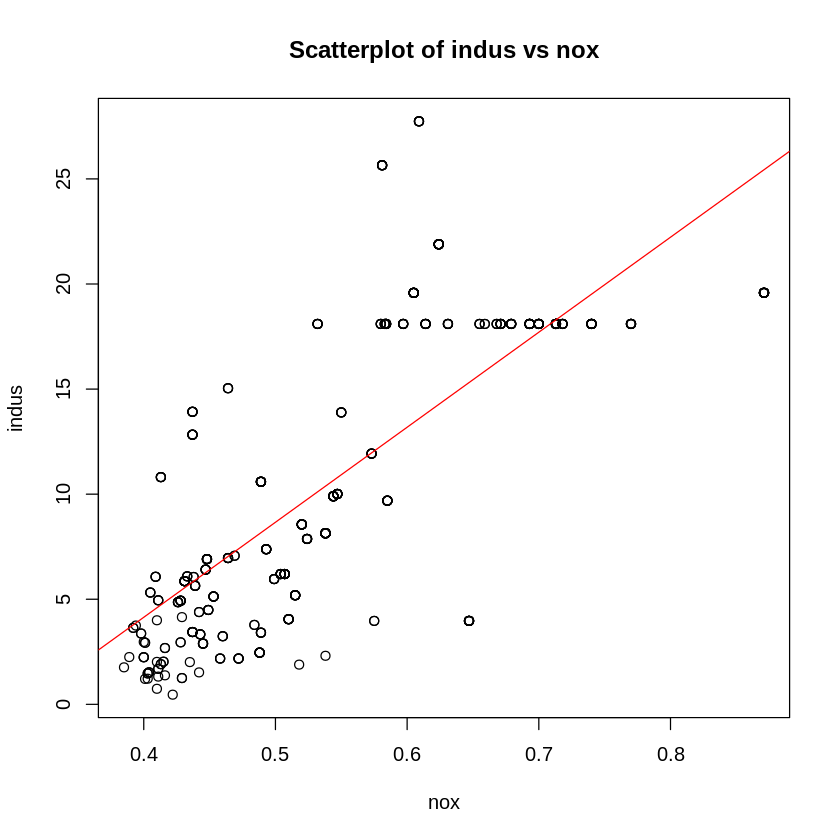

[1] 0.15341


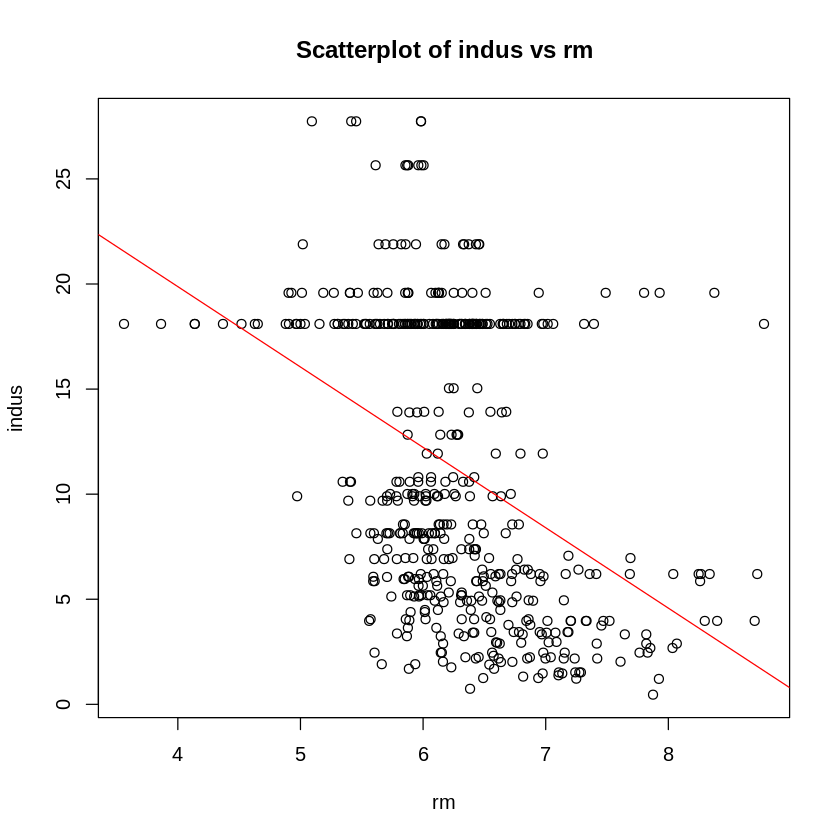

[1] 0.4157393


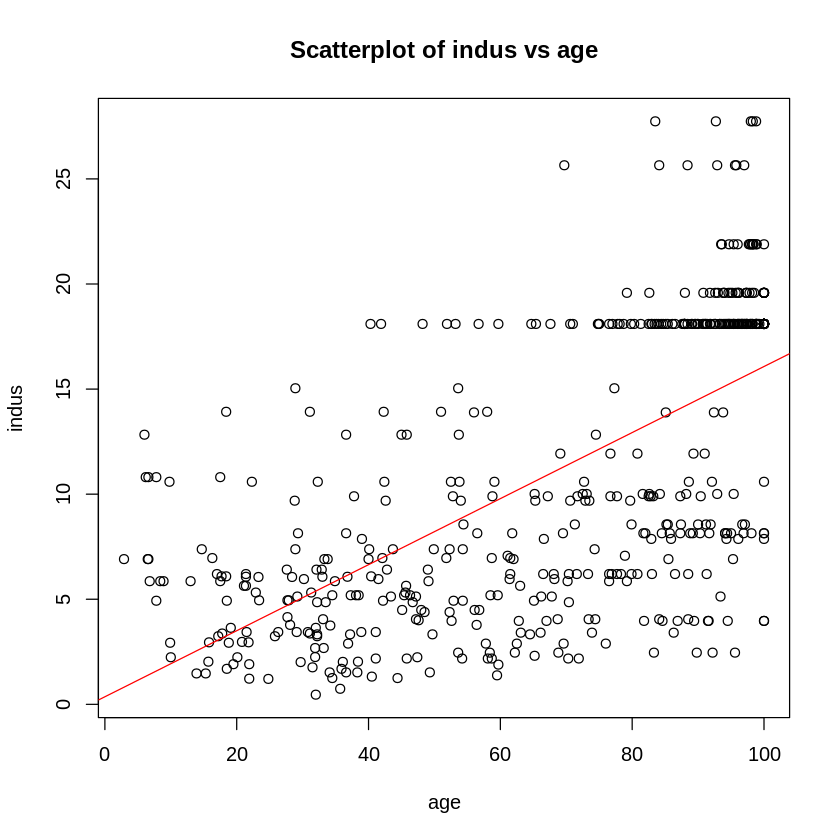

[1] 0.5013022


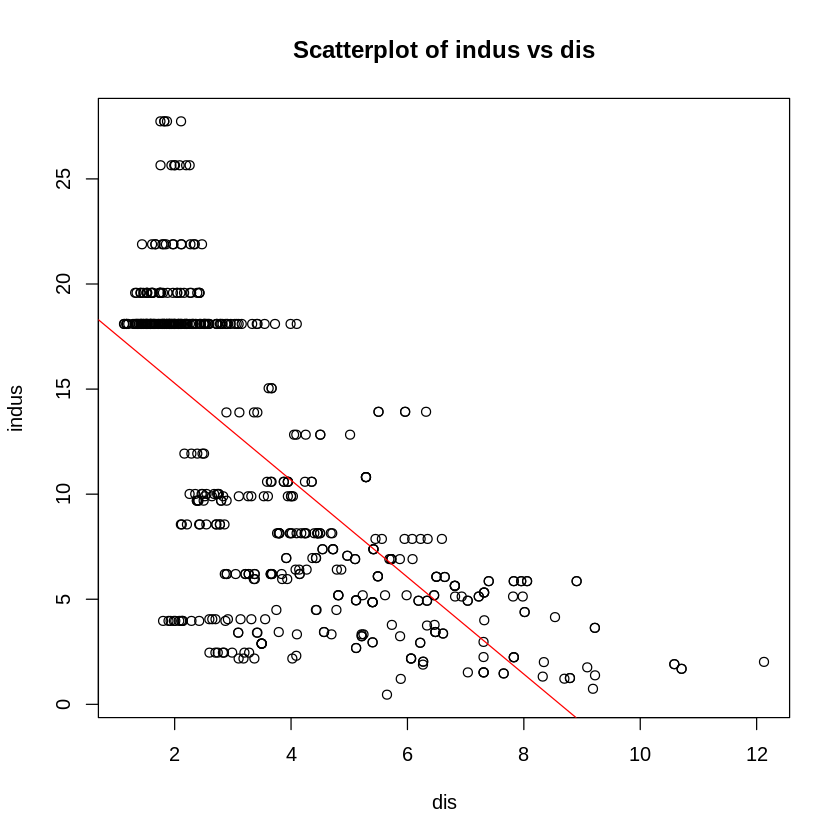

[1] 0.3541789


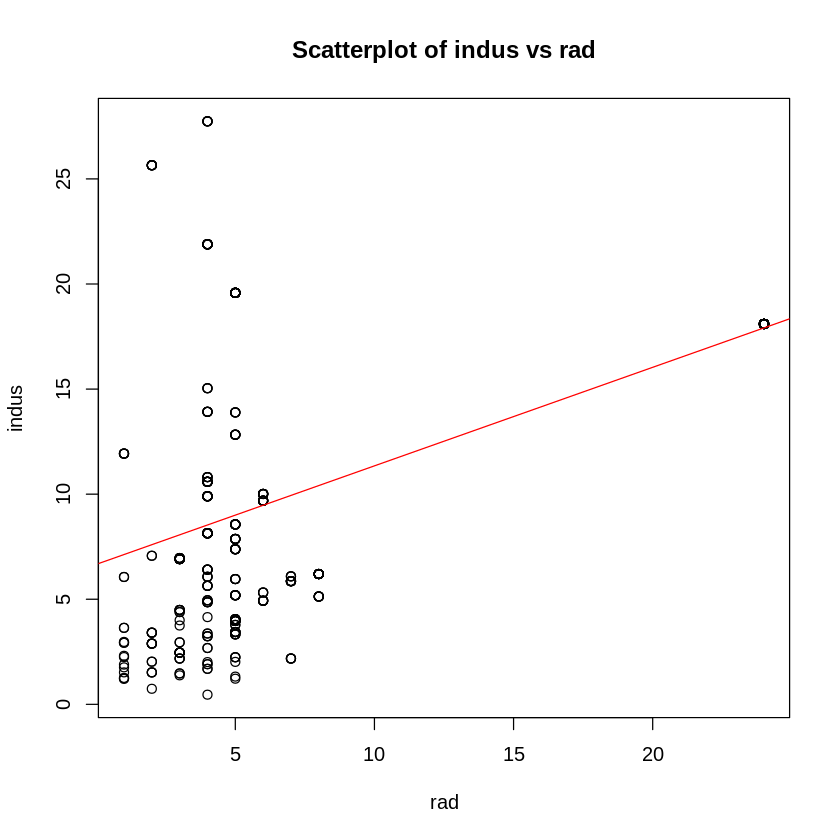

[1] 0.5194952


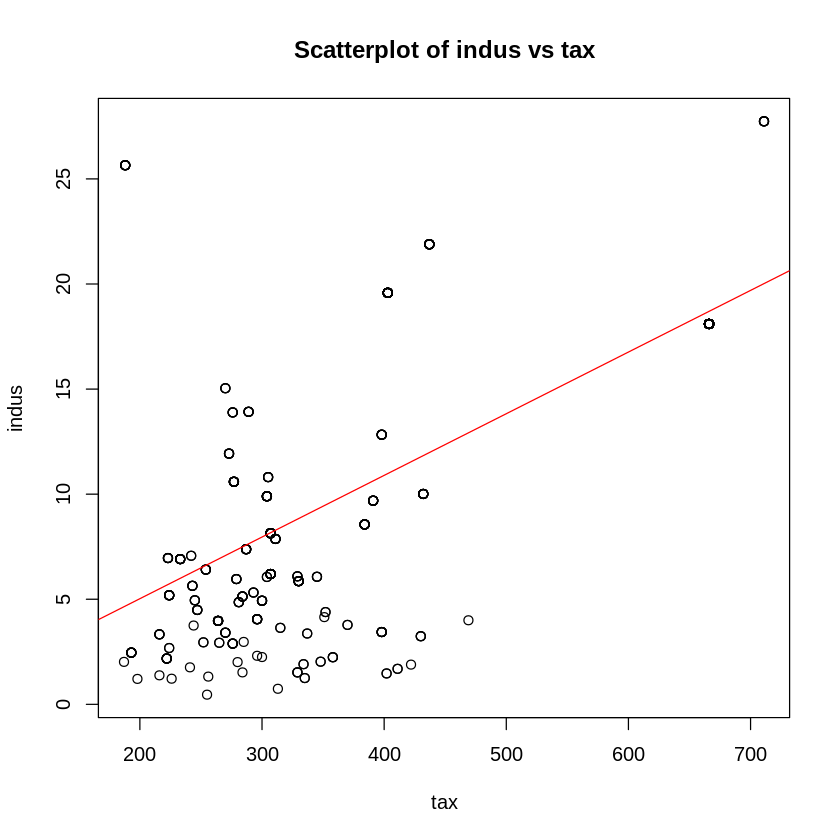

[1] 0.1468787


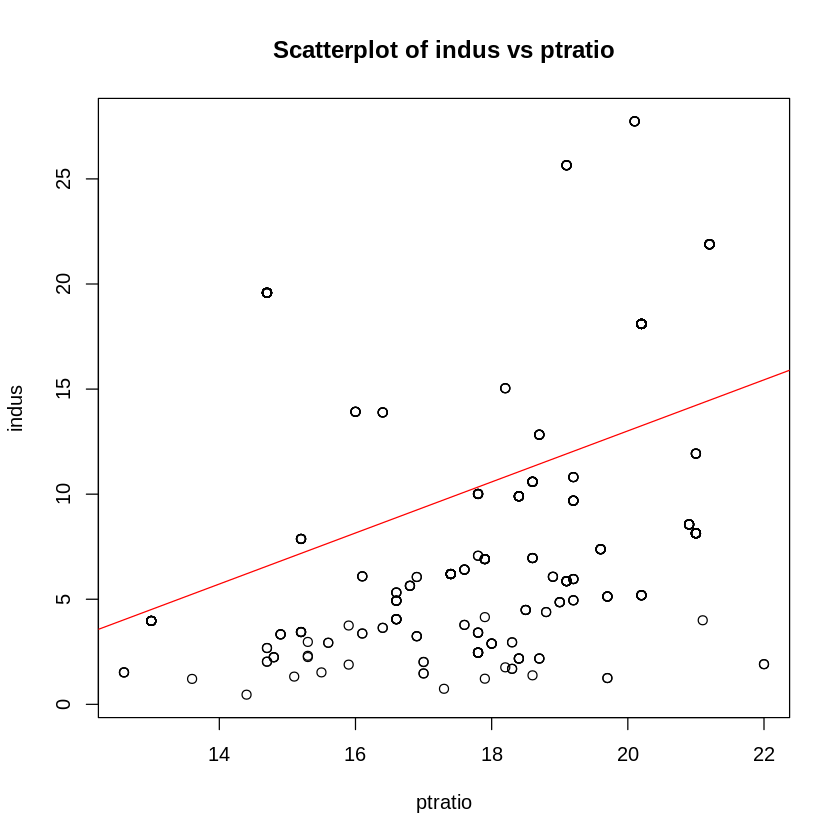

[1] 0.1274322


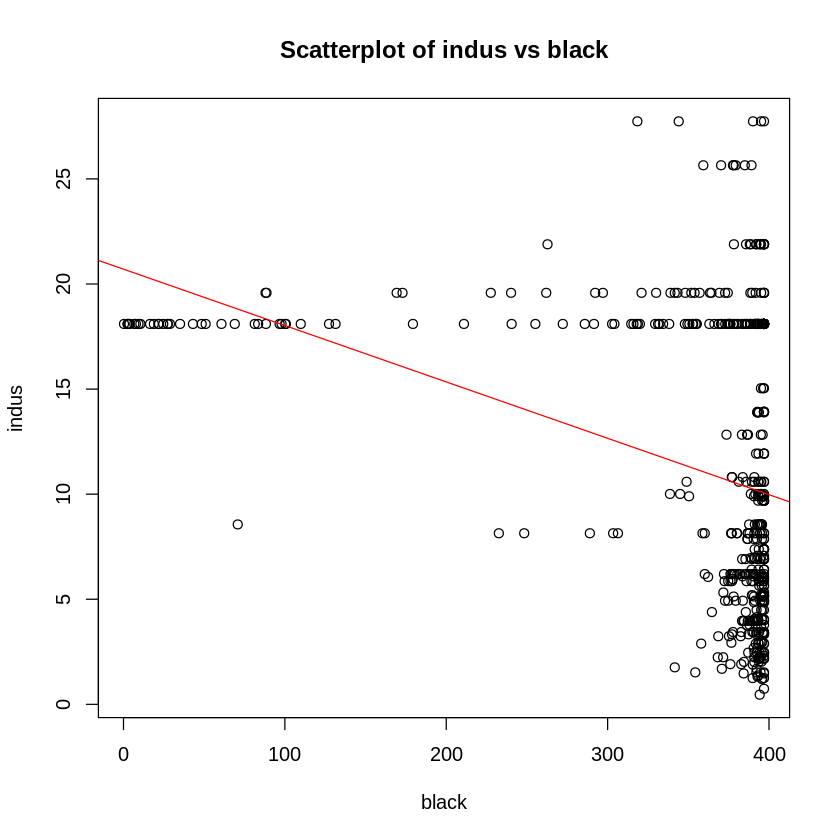

[1] 0.3645741


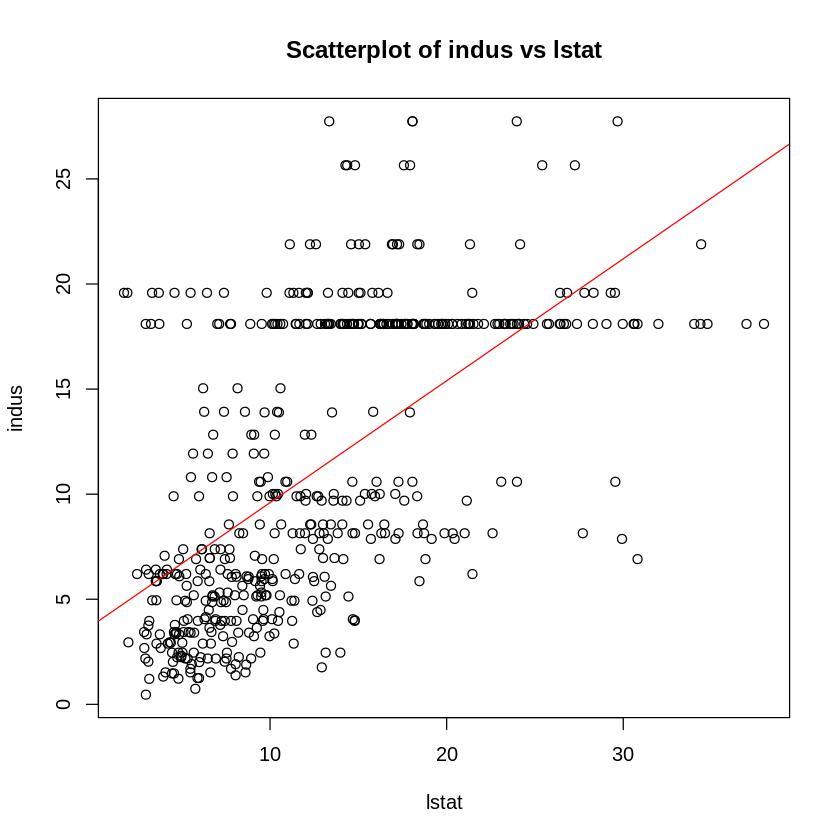

[1] 0.23399


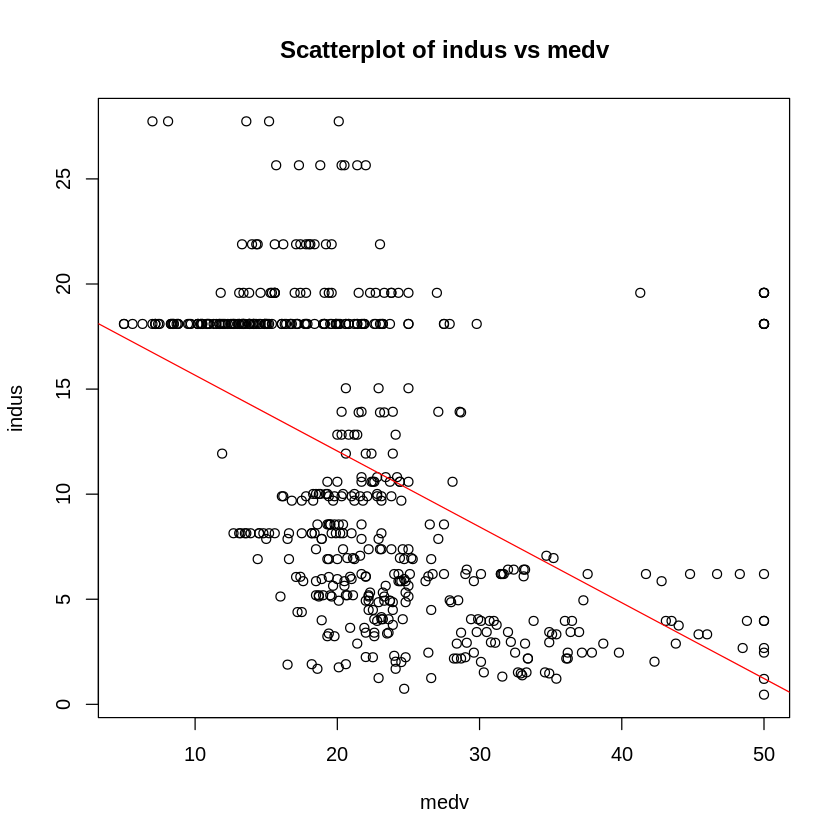

[1] 0.008317952


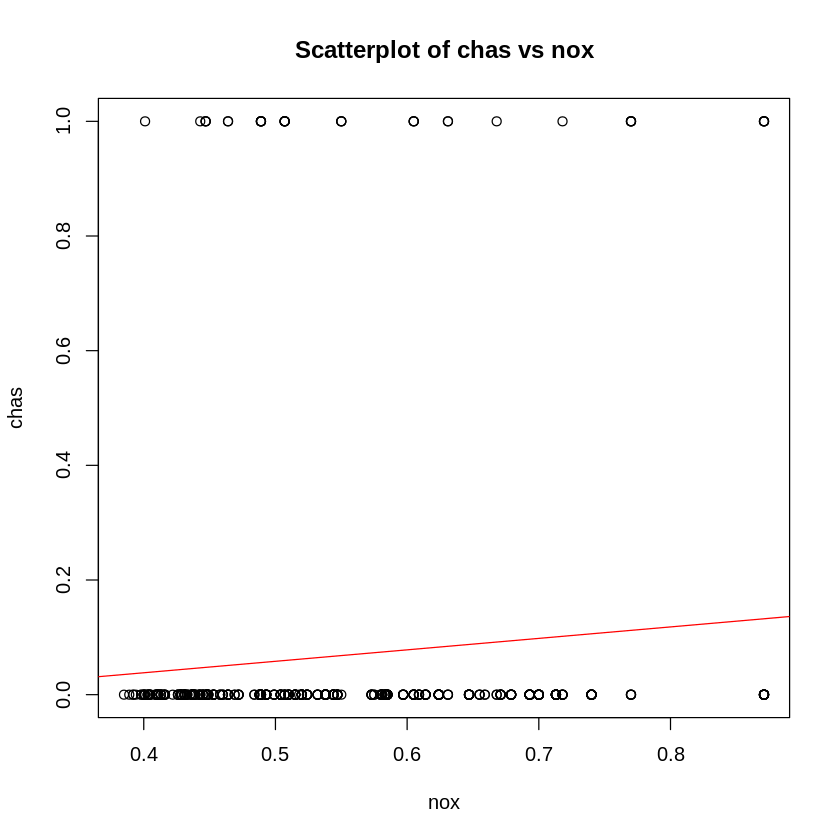

[1] 0.008326786


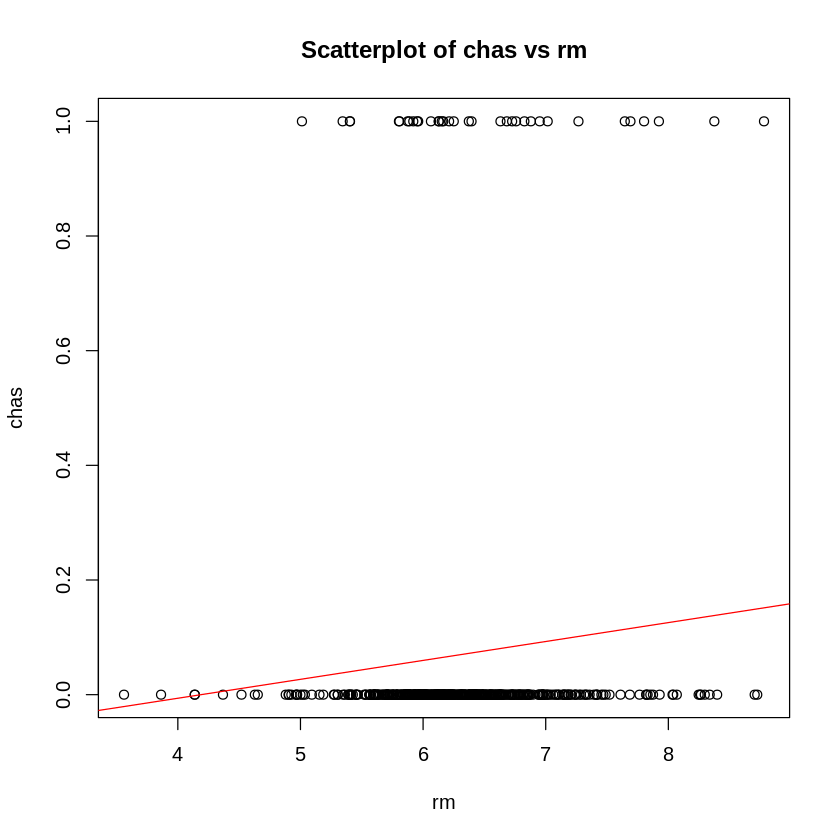

[1] 0.007485325


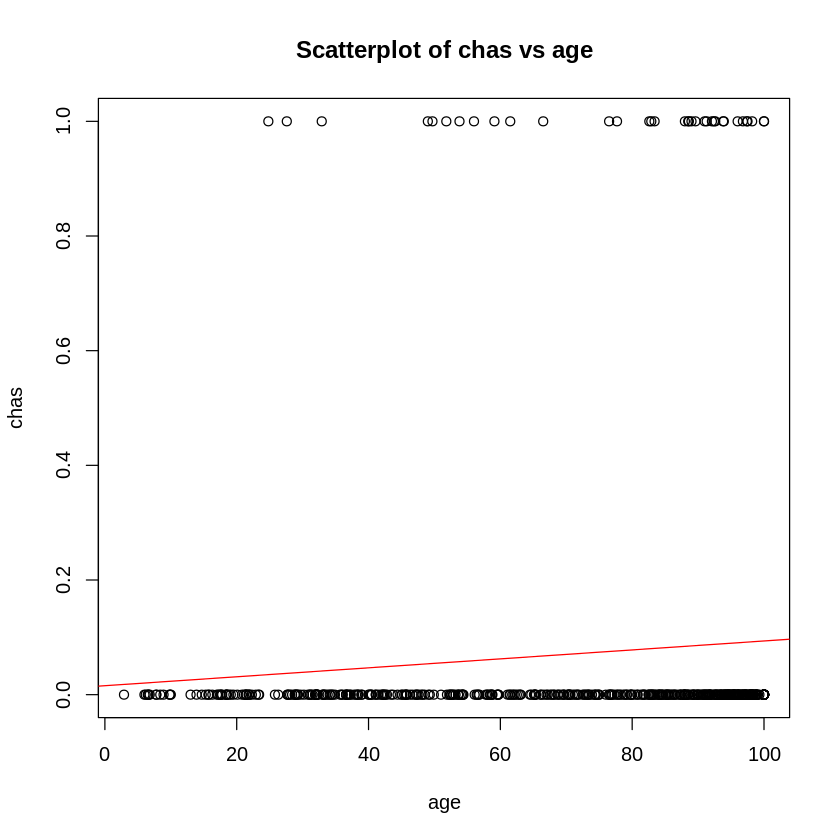

[1] 0.009835835


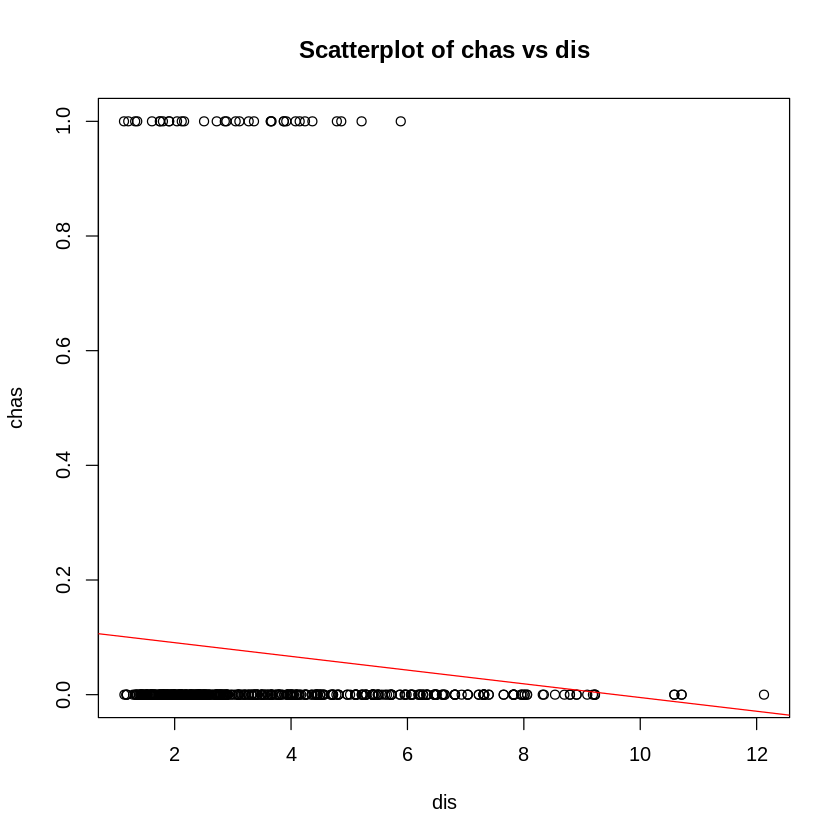

[1] 5.429097e-05


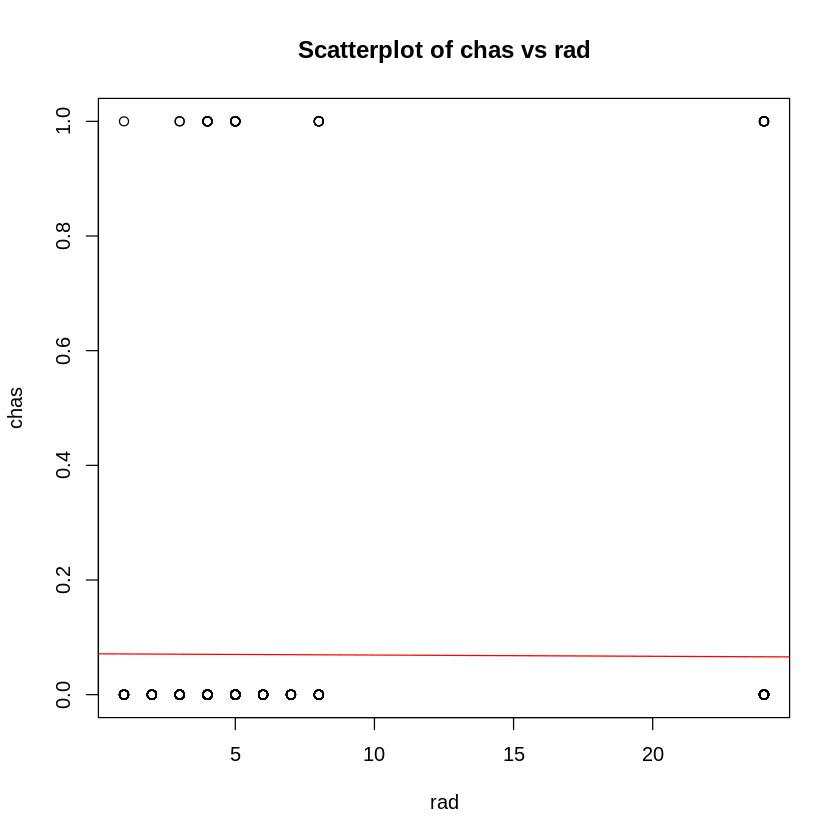

[1] 0.0012664


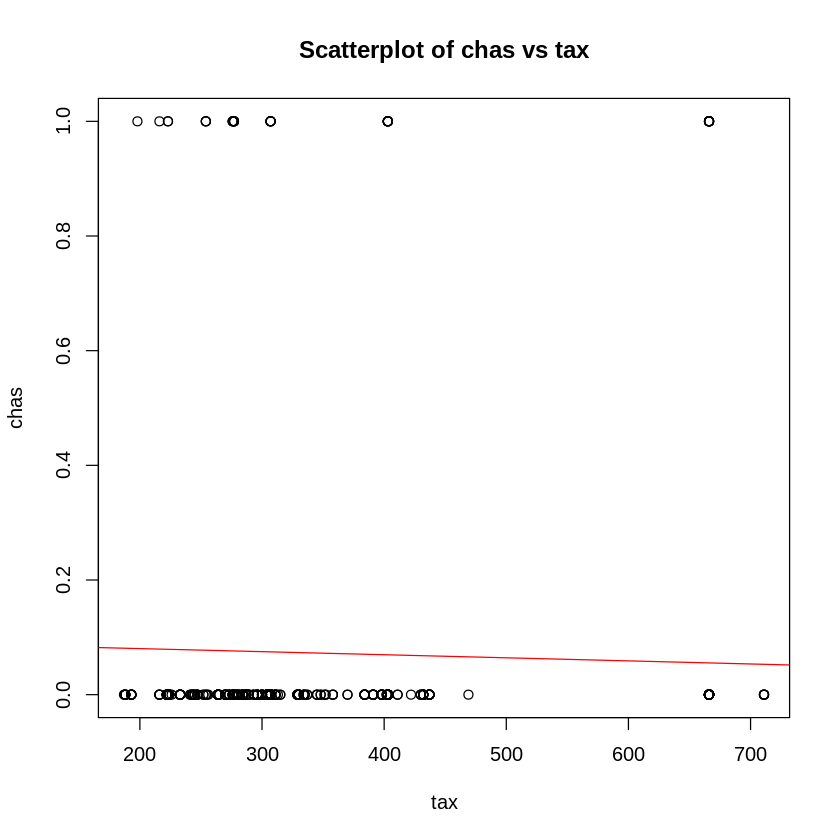

[1] 0.01476594


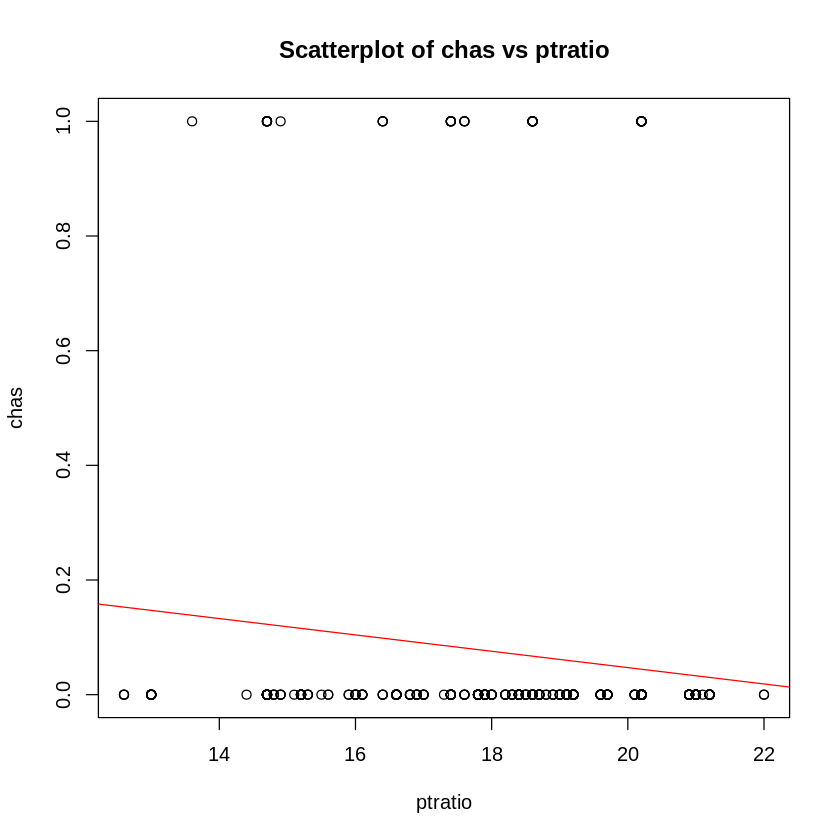

[1] 0.002380316


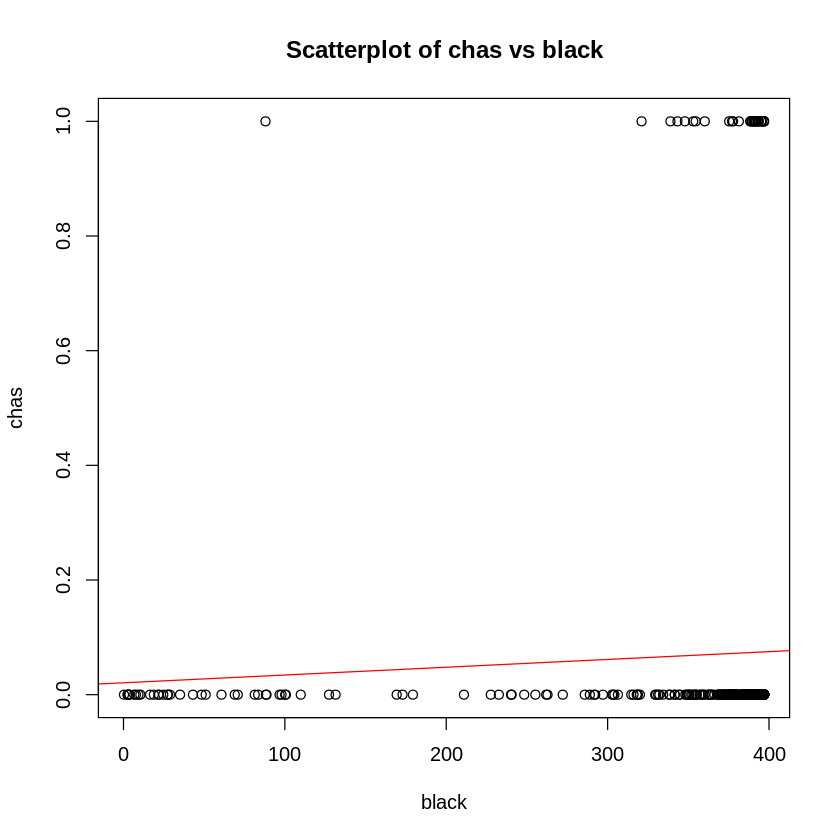

[1] 0.002908369


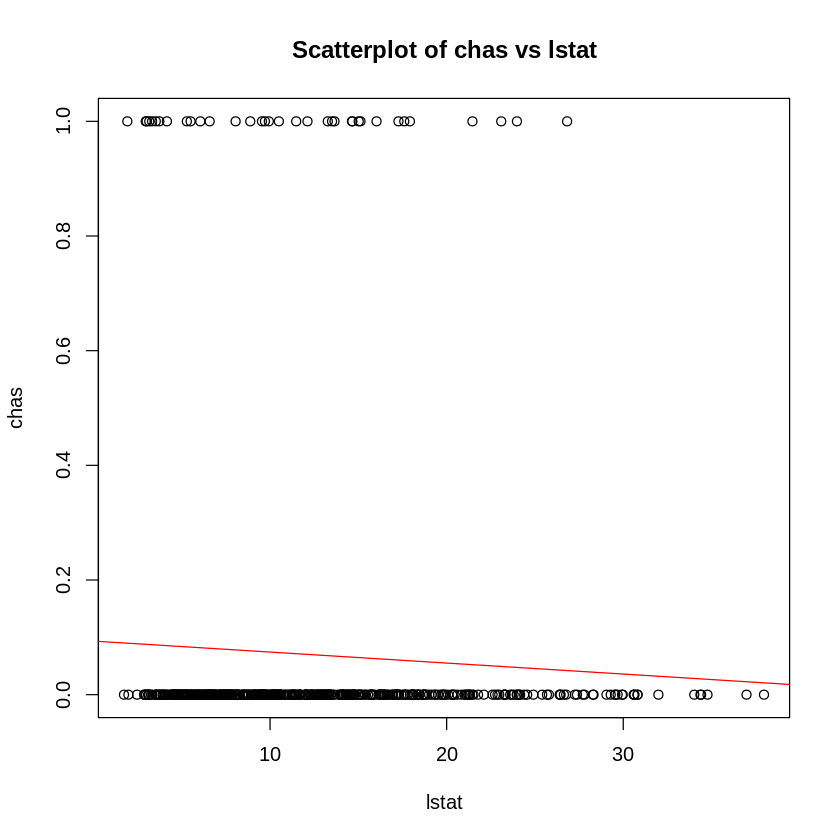

[1] 0.03071613


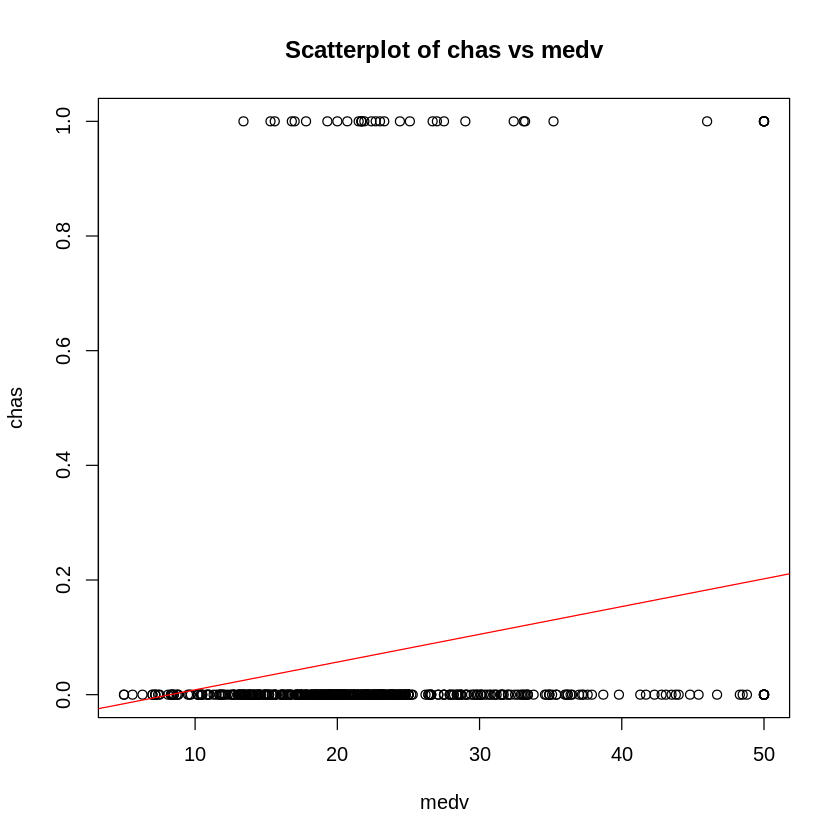

[1] 0.0913177


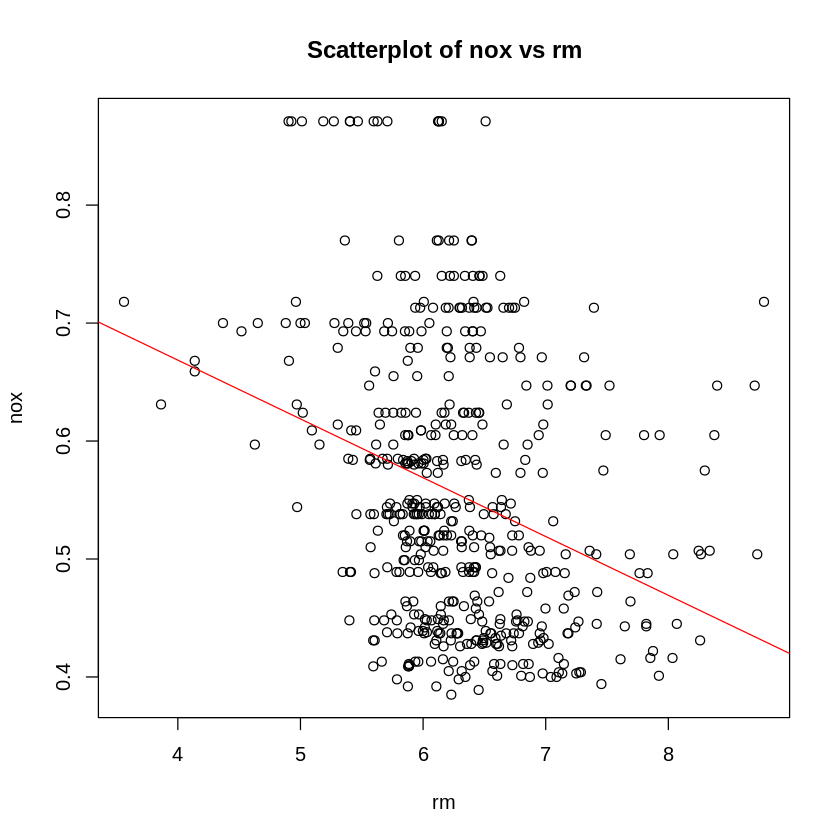

[1] 0.5350485


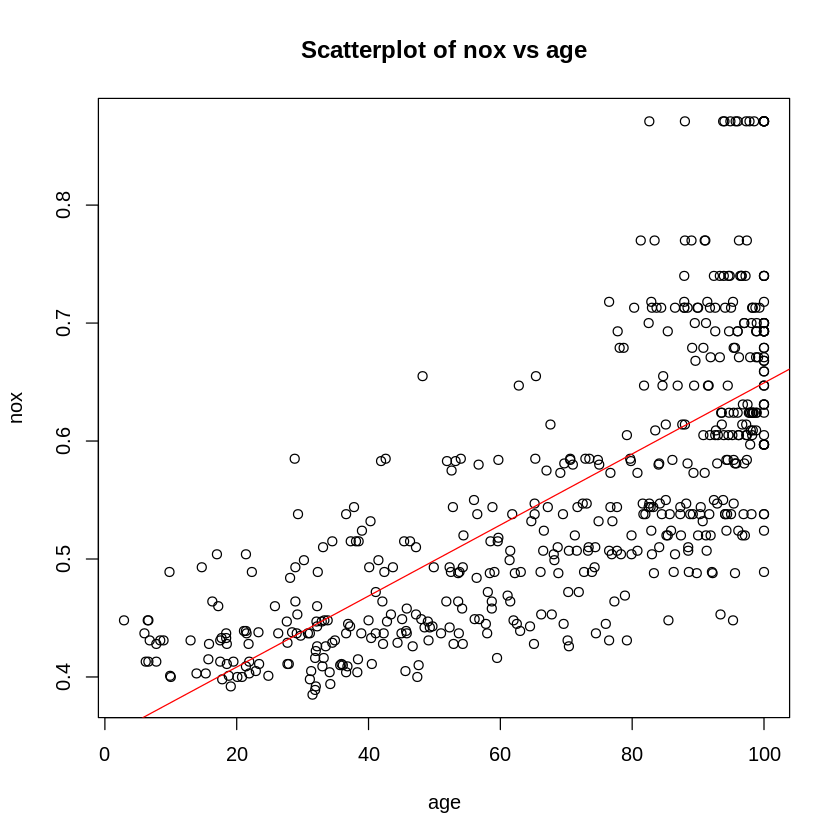

[1] 0.591715


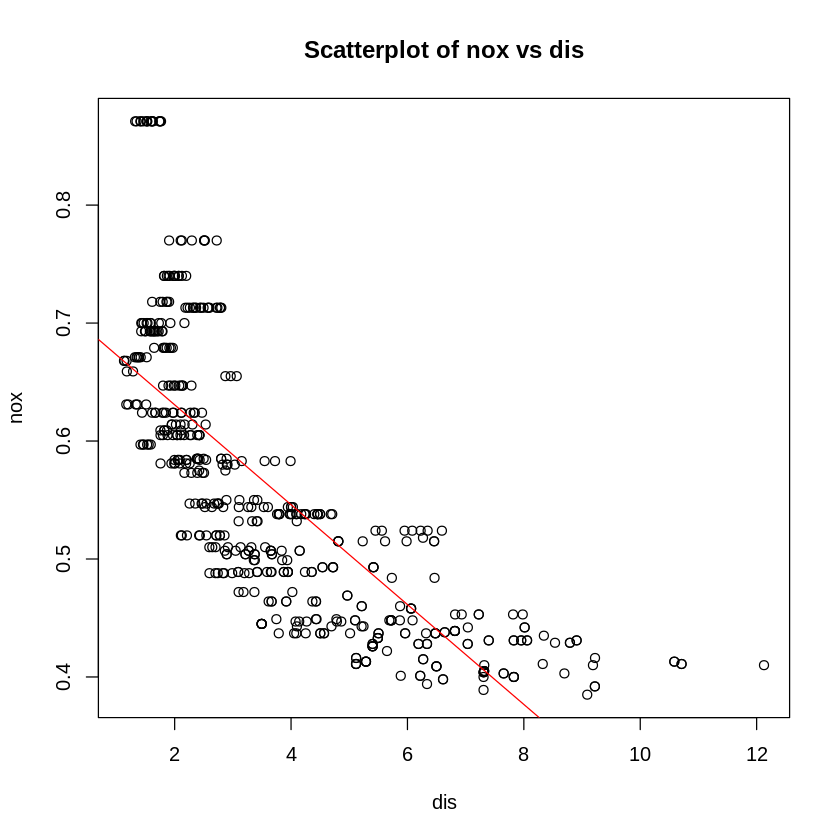

[1] 0.3738596


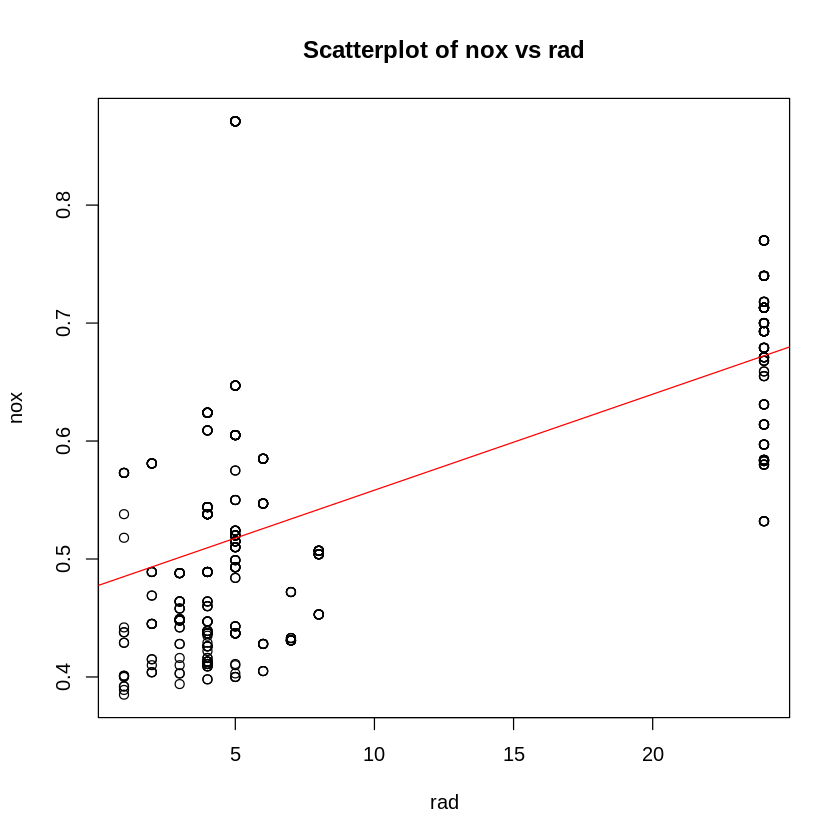

[1] 0.446255


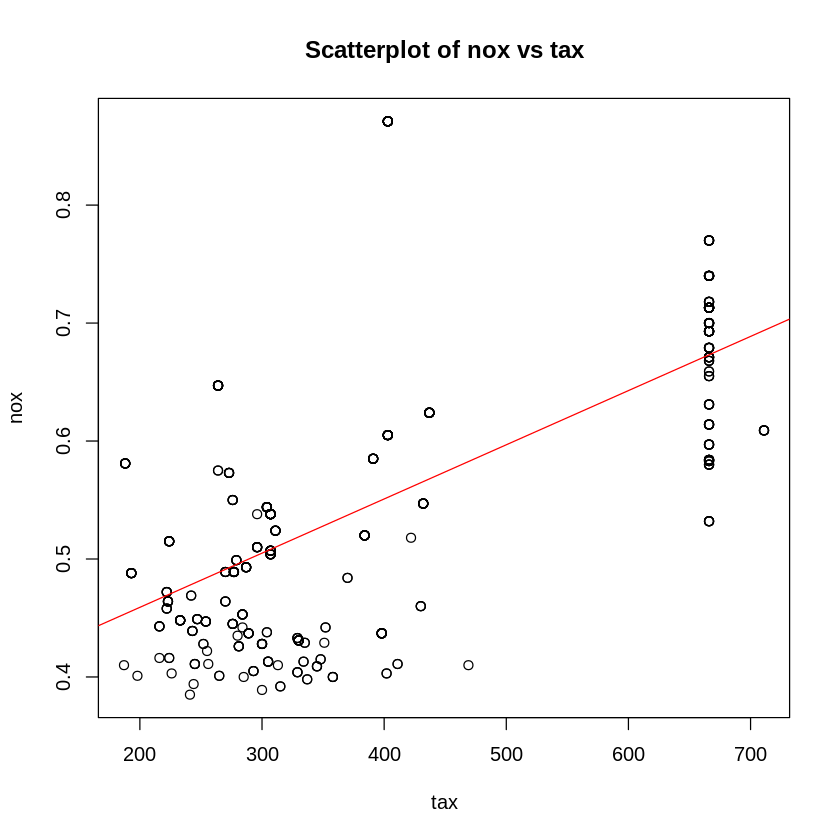

[1] 0.03569556


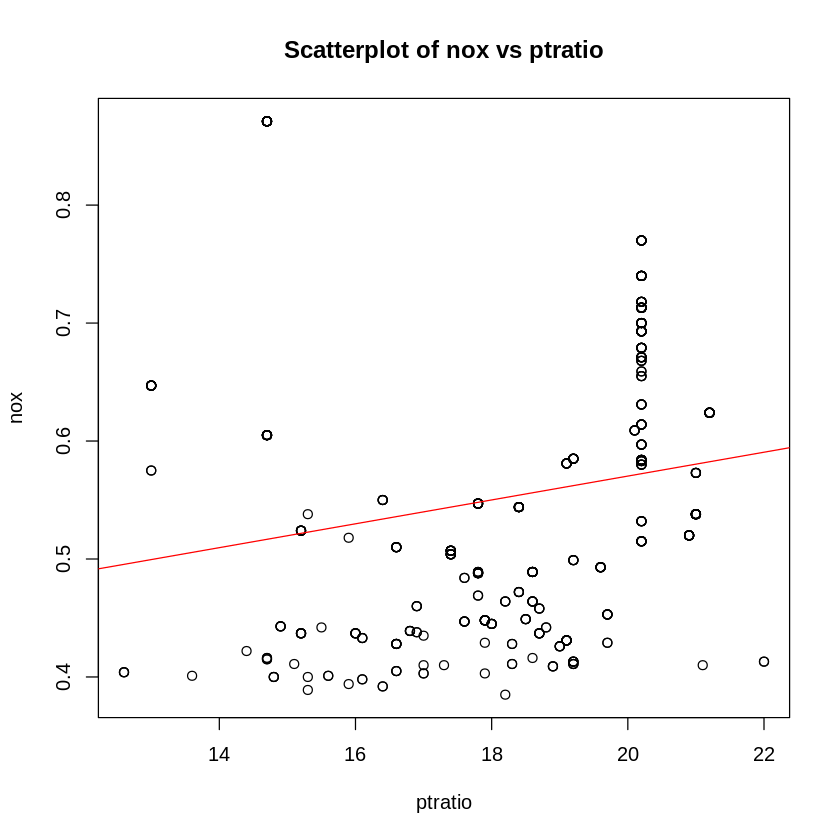

[1] 0.1444385


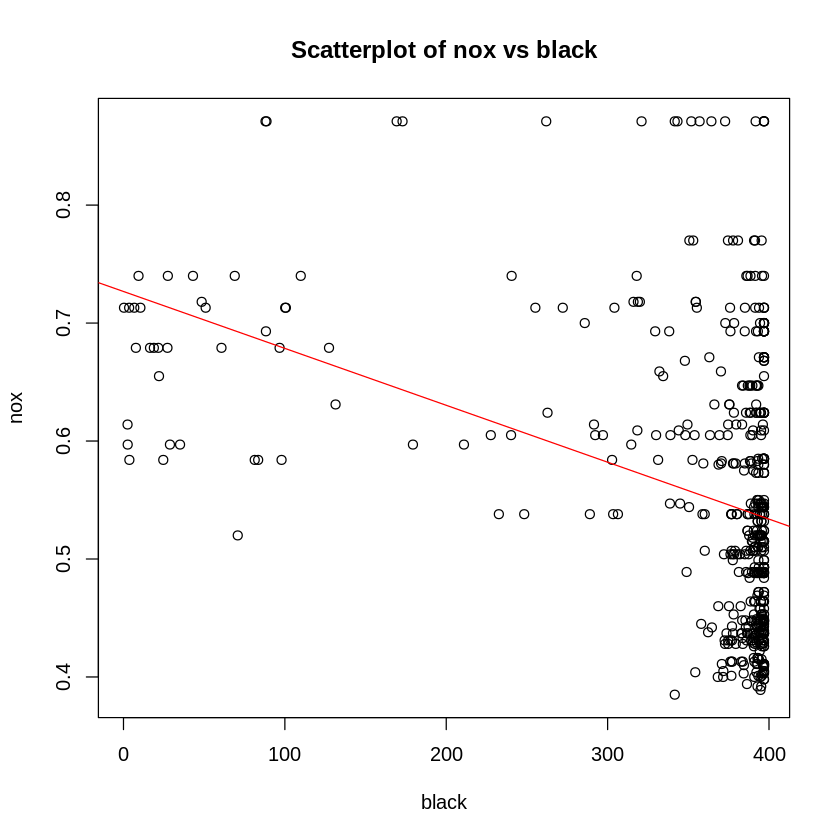

[1] 0.3491379


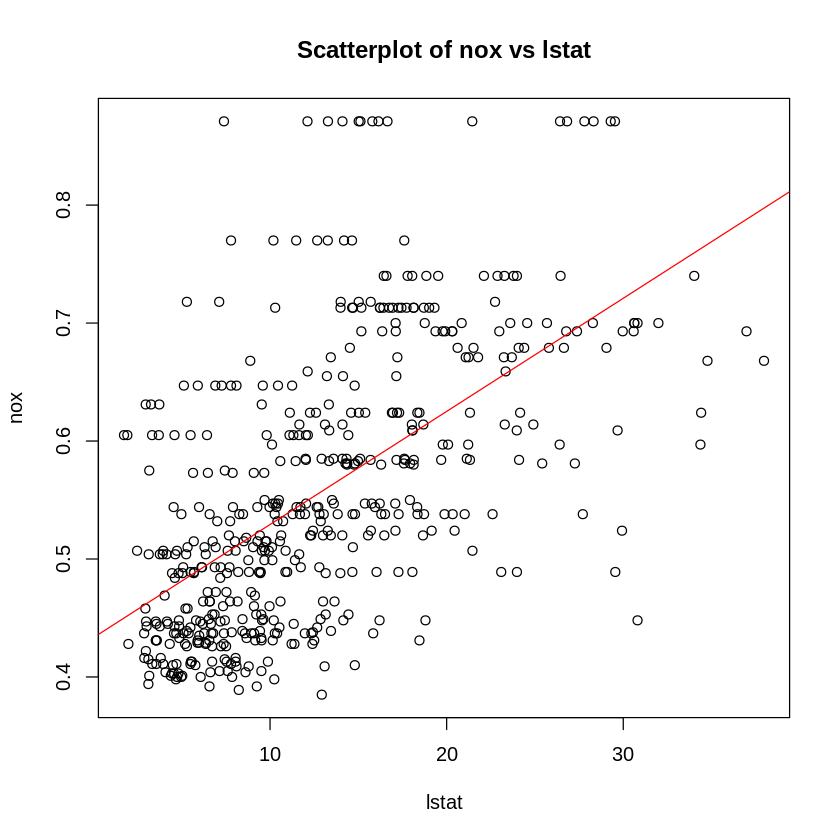

[1] 0.182603


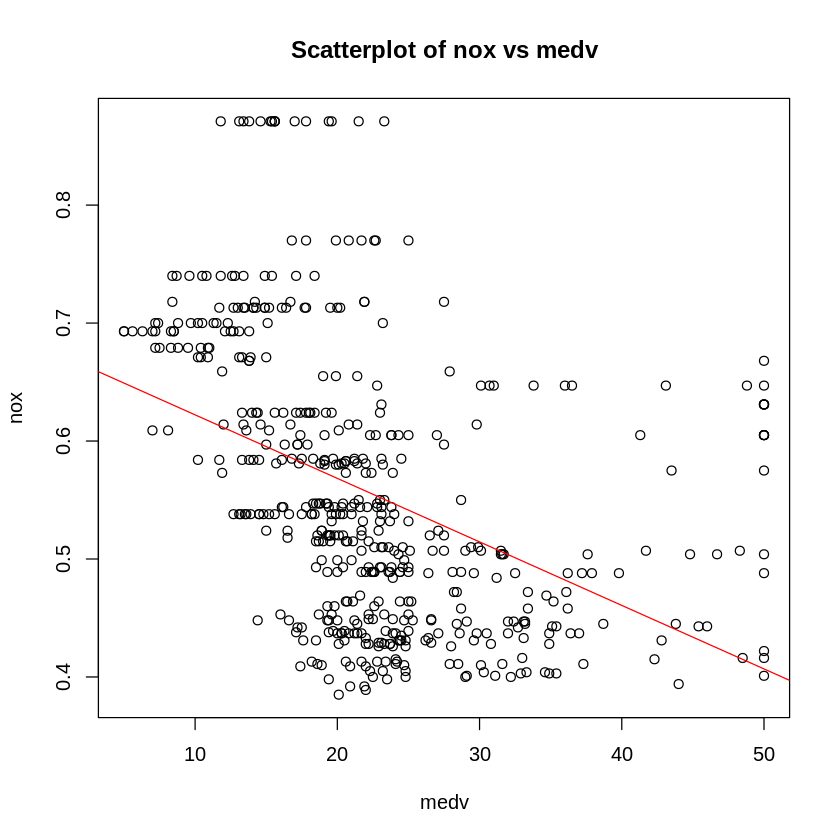

[1] 0.05772724


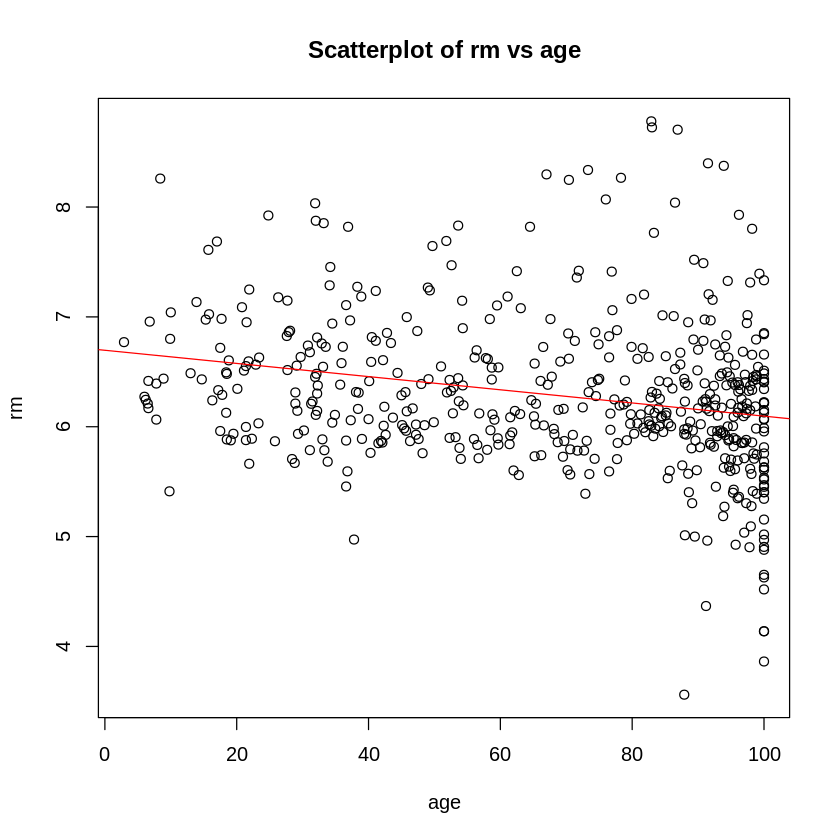

[1] 0.04212601


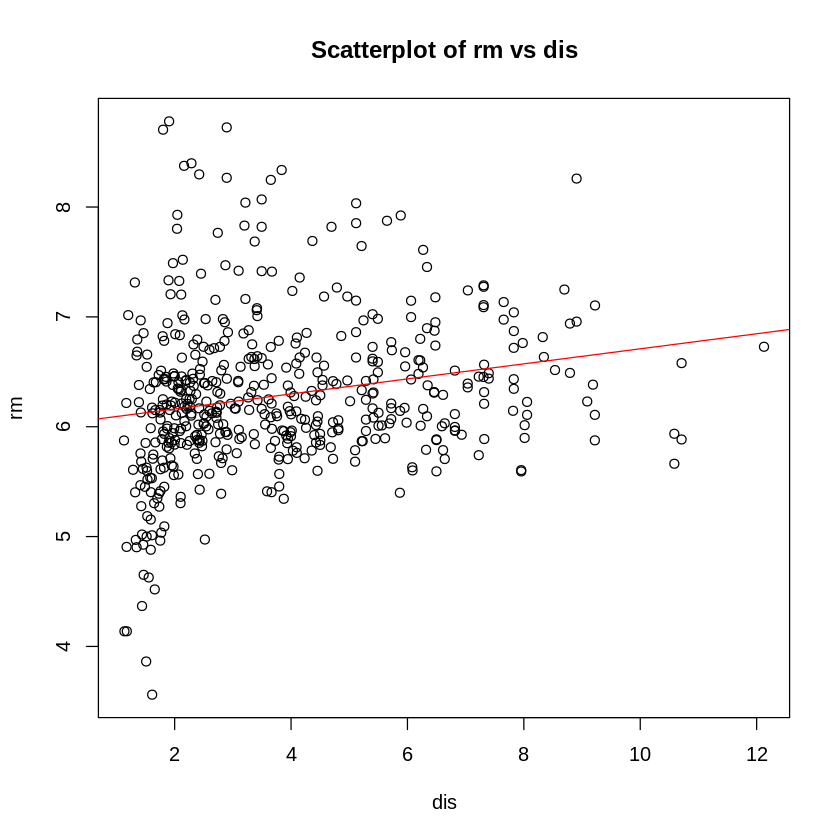

[1] 0.04403562


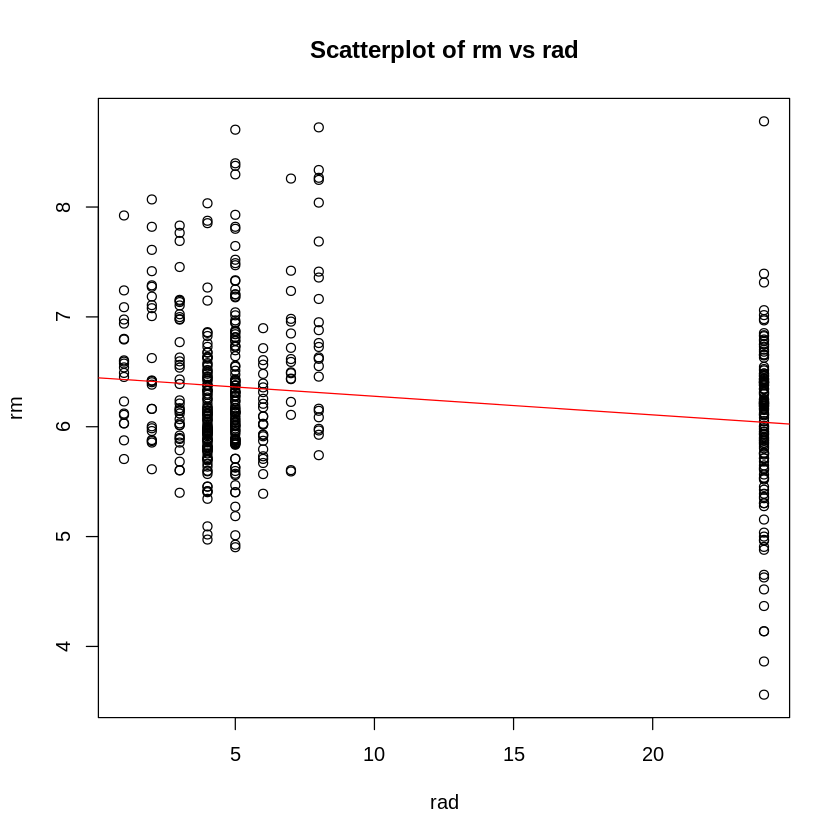

[1] 0.08529194


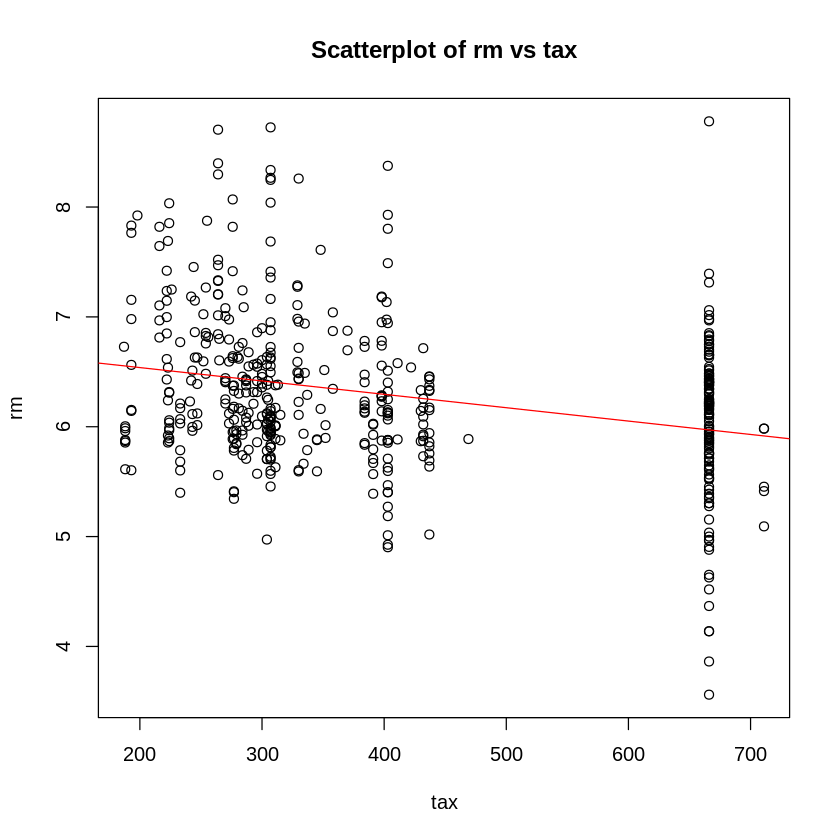

[1] 0.1263813


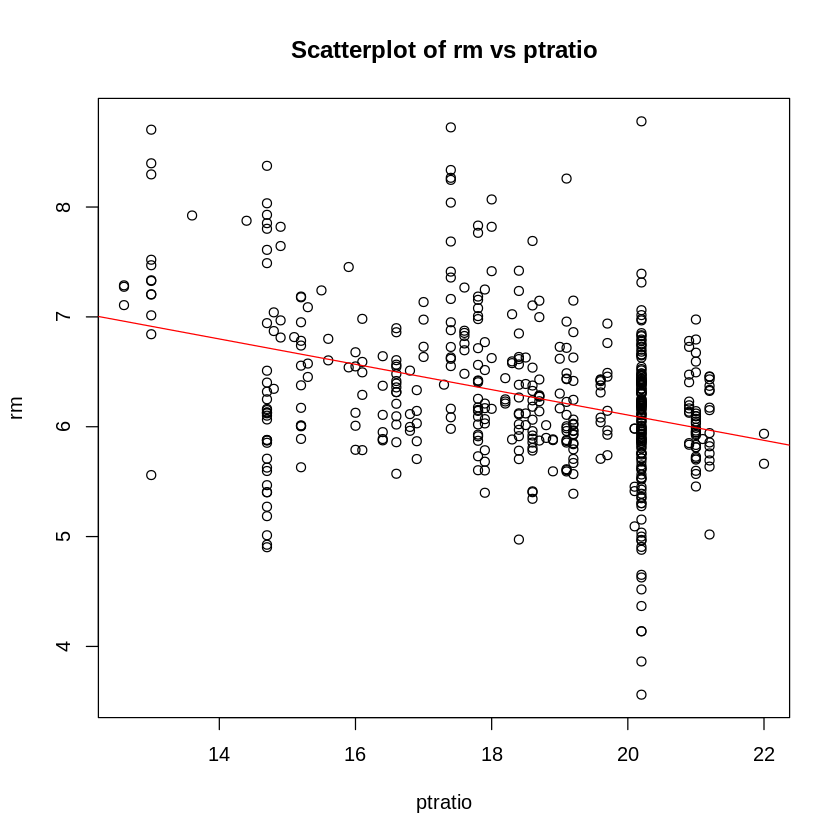

[1] 0.01640158


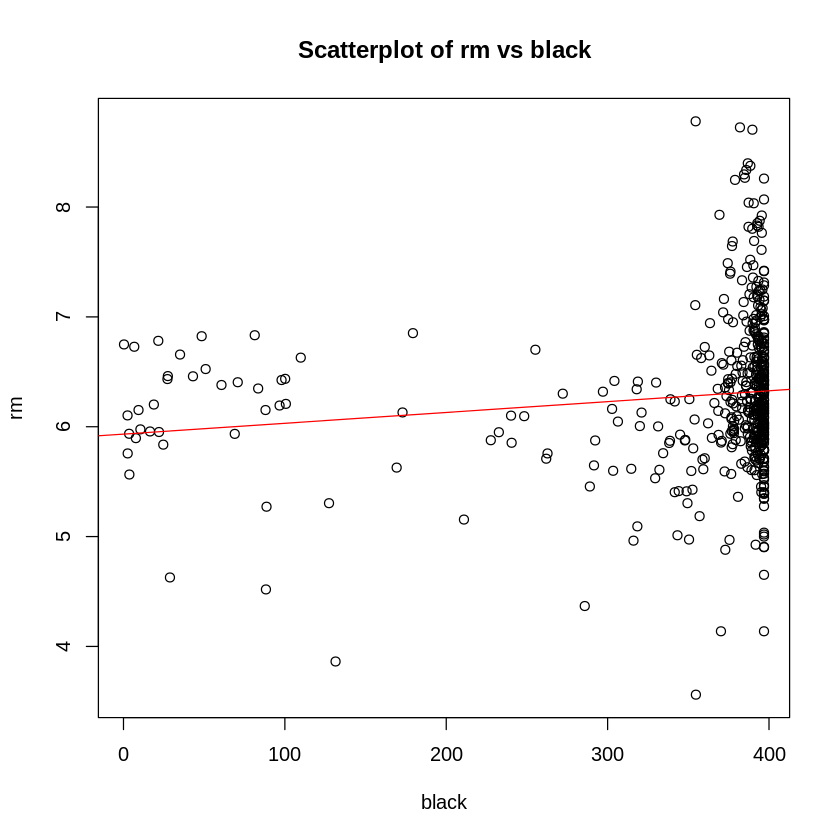

[1] 0.3767606


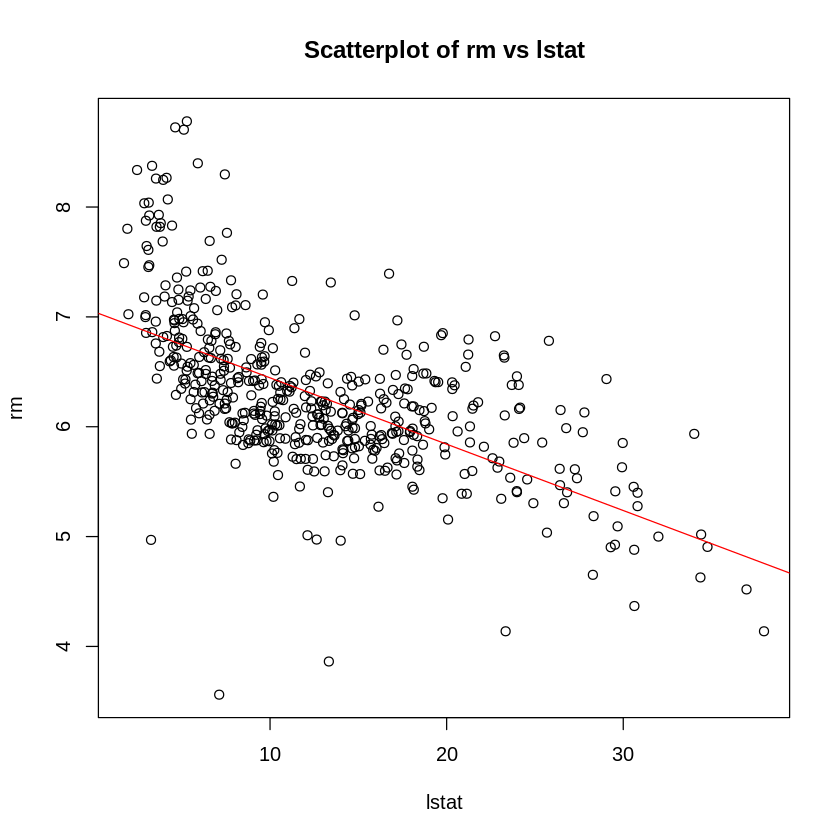

[1] 0.4835255


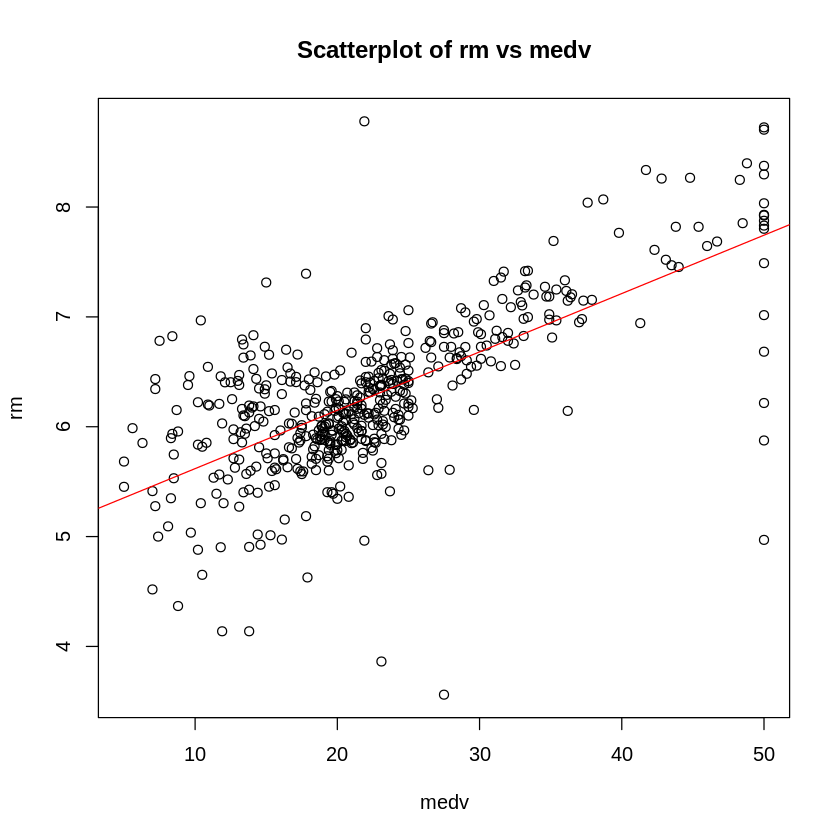

[1] 0.5593253


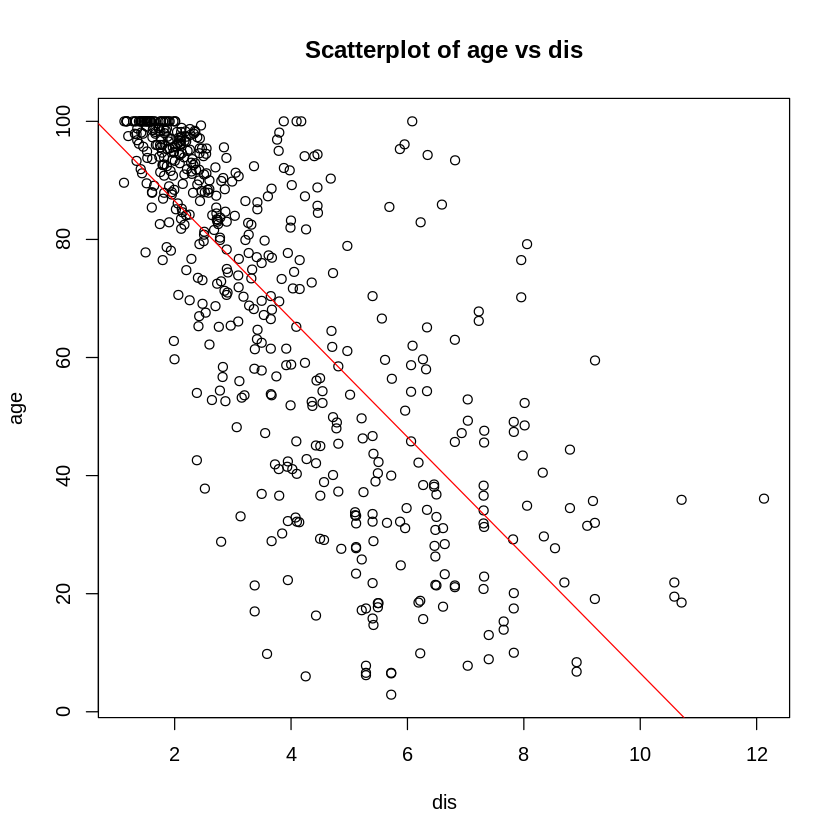

[1] 0.2079565


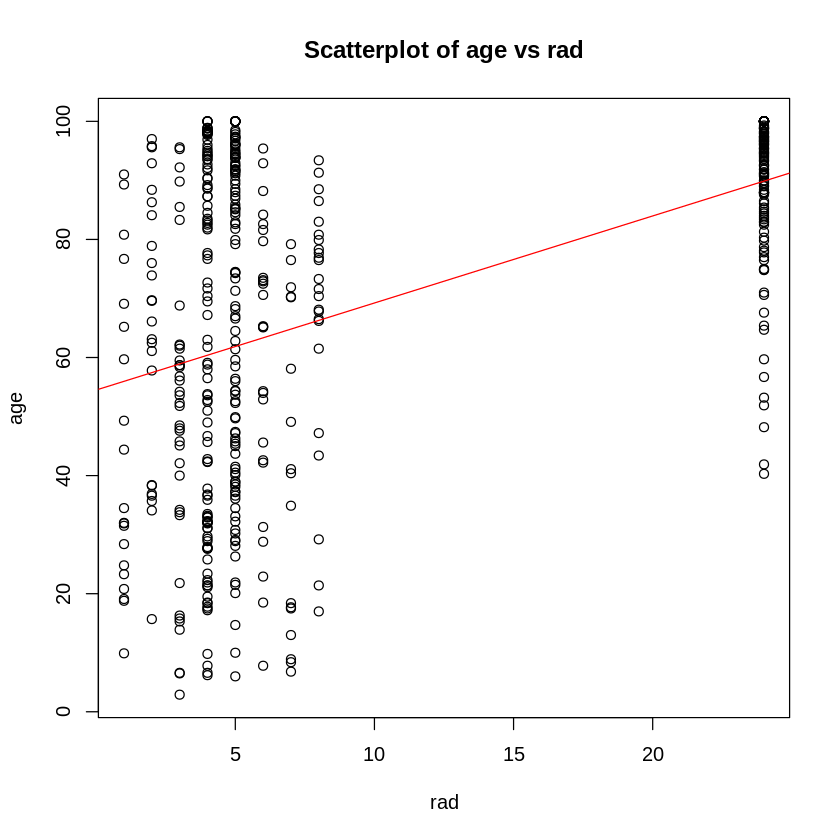

[1] 0.2564973


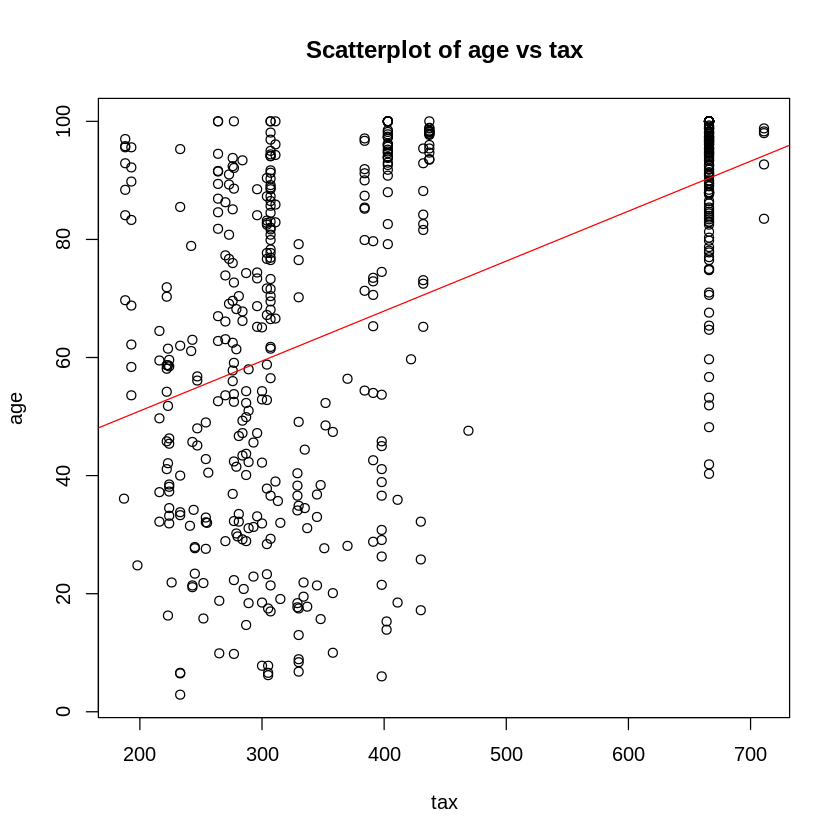

[1] 0.0683901


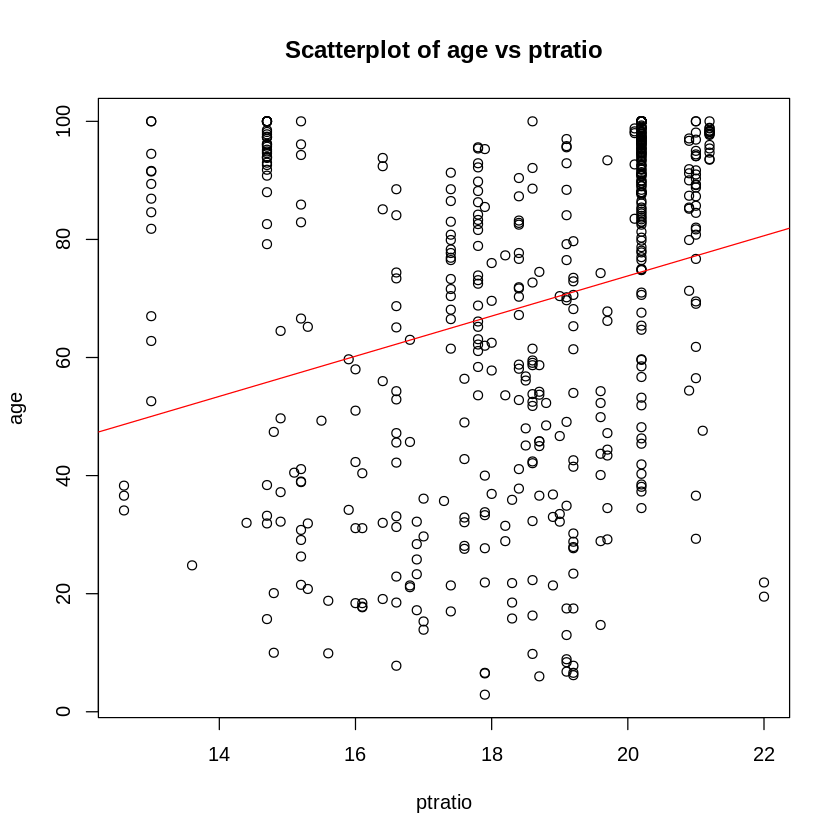

[1] 0.07482084


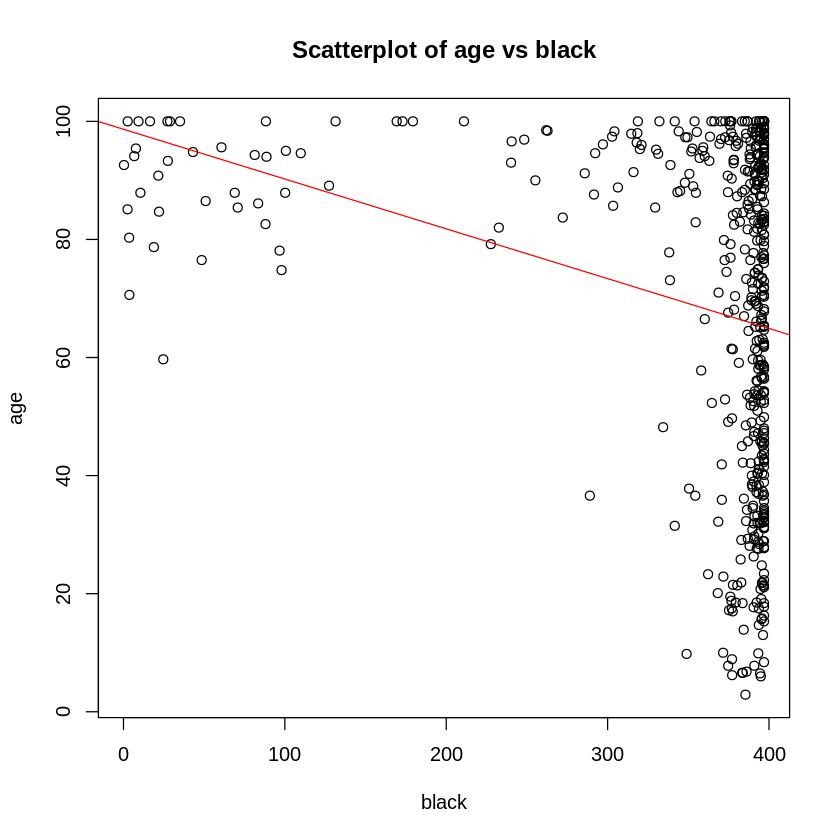

[1] 0.3628117


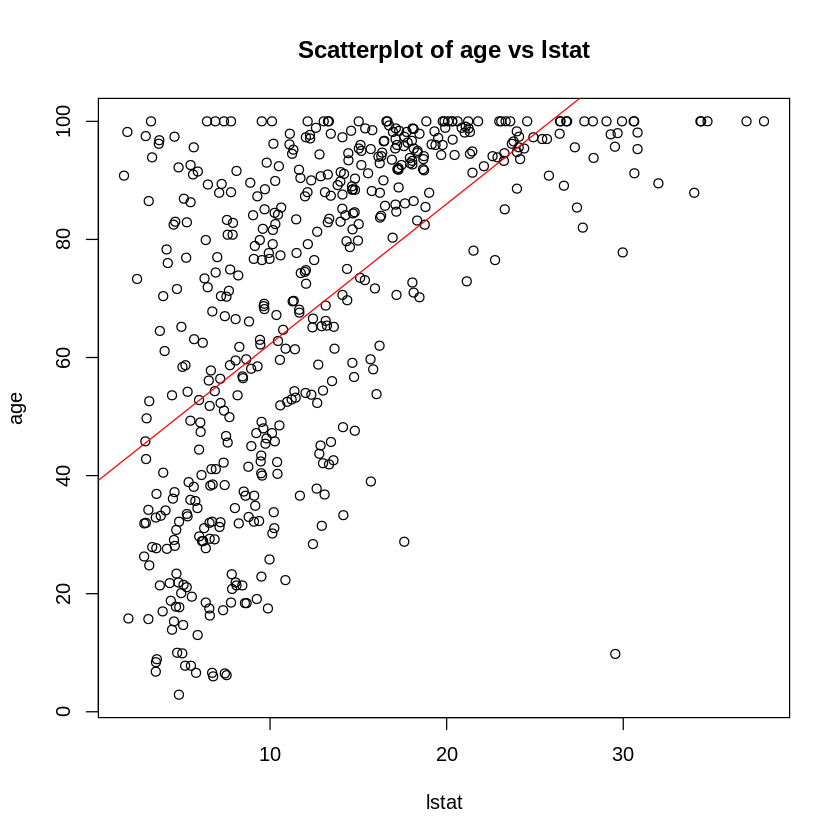

[1] 0.1420947


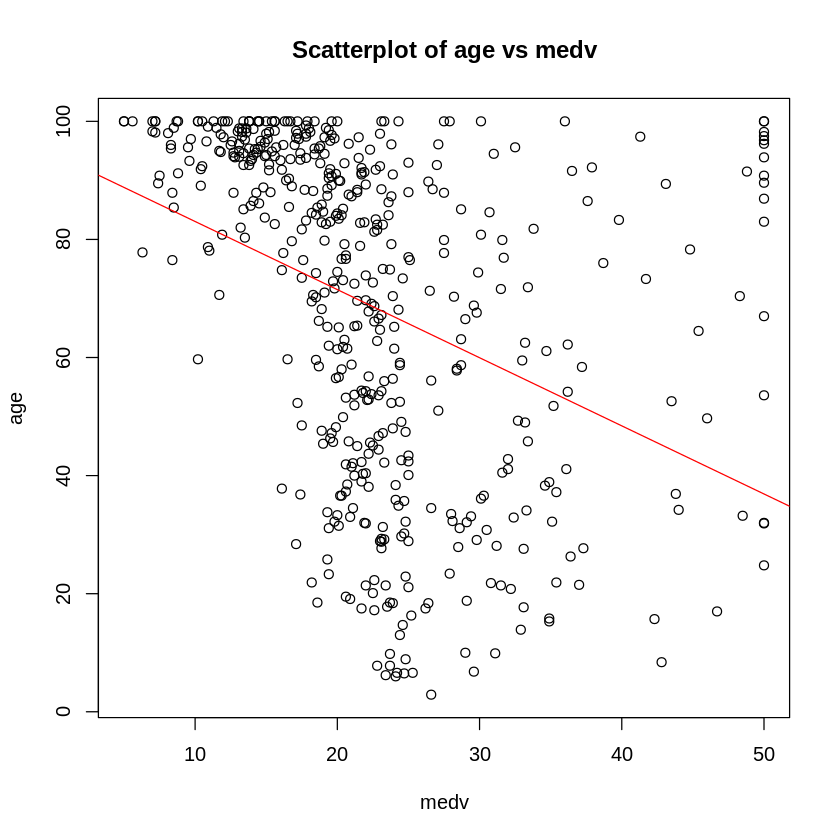

[1] 0.2446172


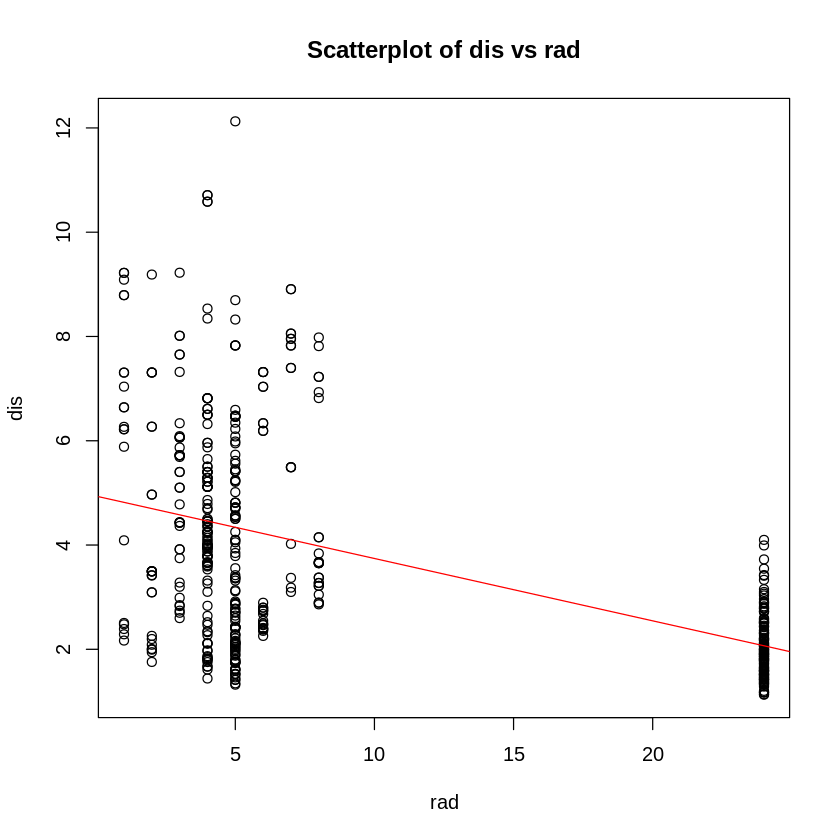

[1] 0.2856171


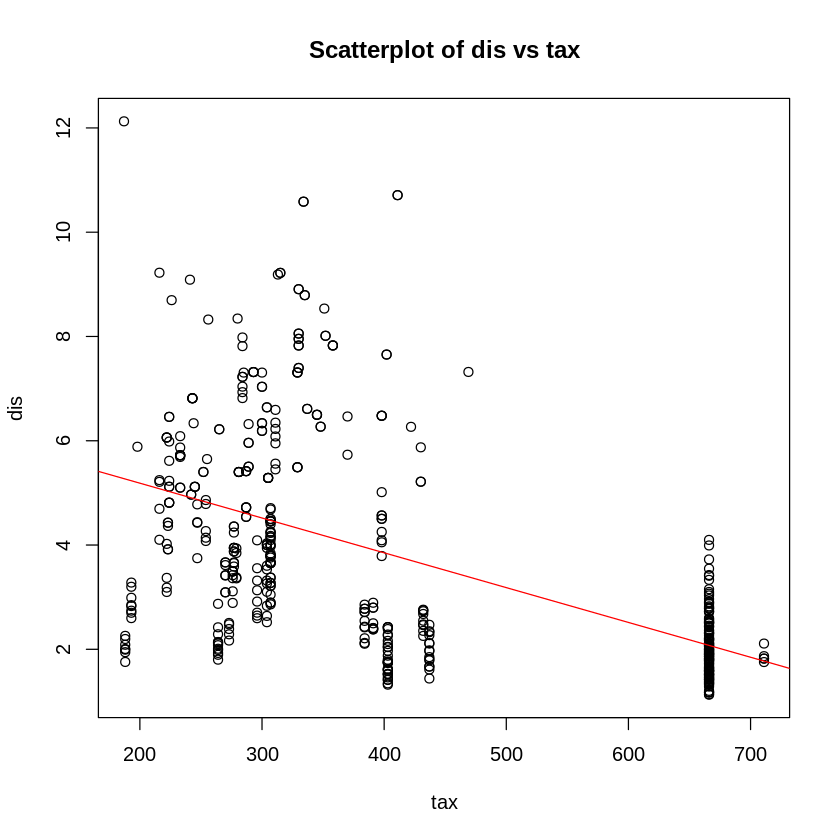

[1] 0.05404255


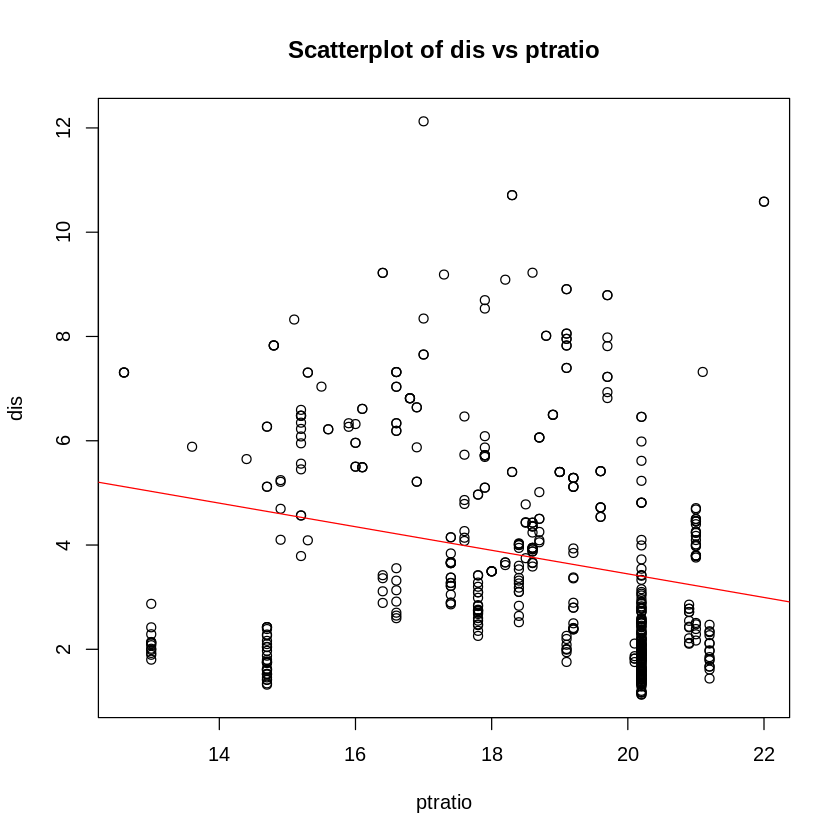

[1] 0.08497906


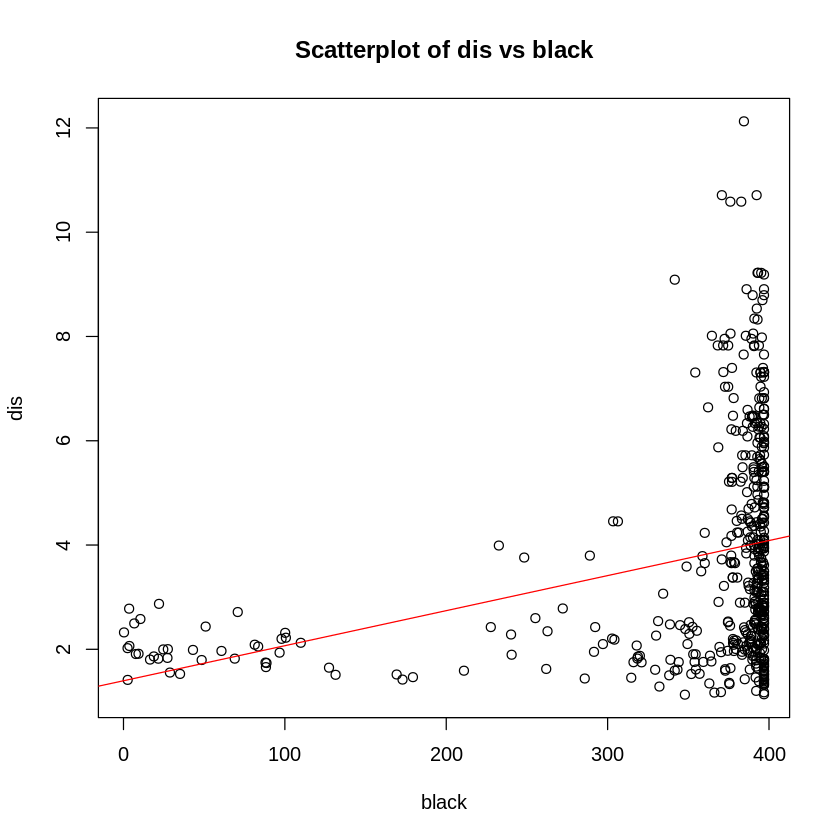

[1] 0.2470049


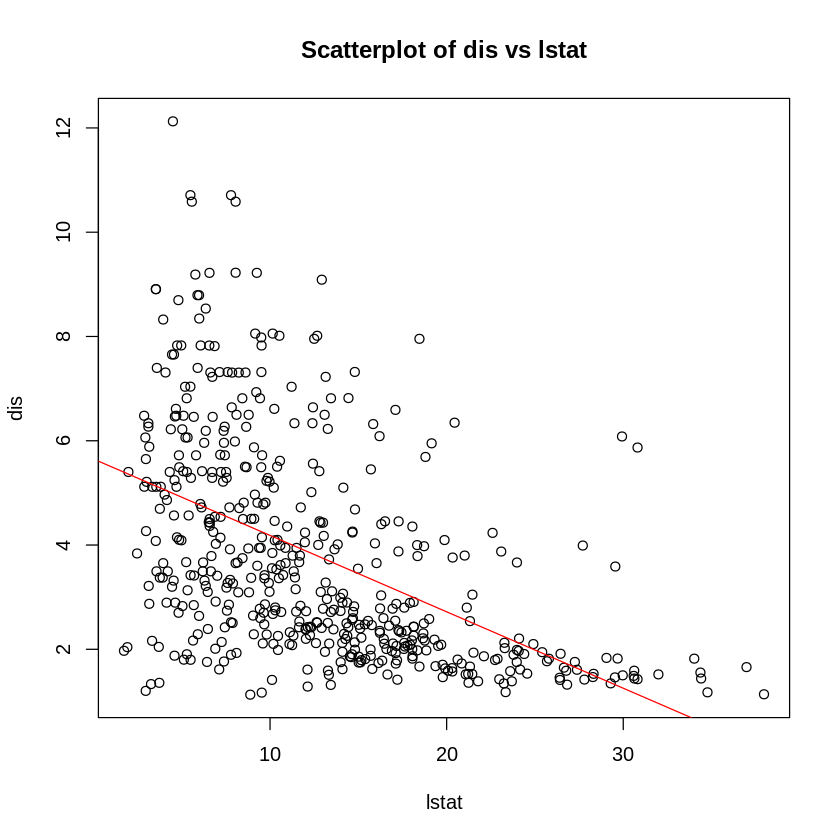

[1] 0.06246437


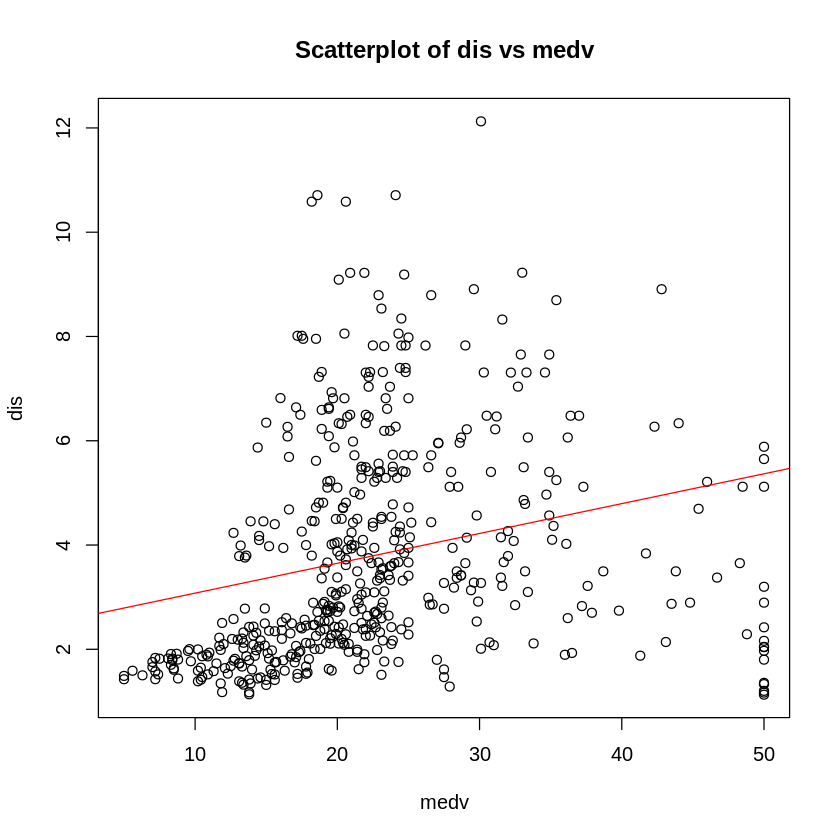

[1] 0.8285154


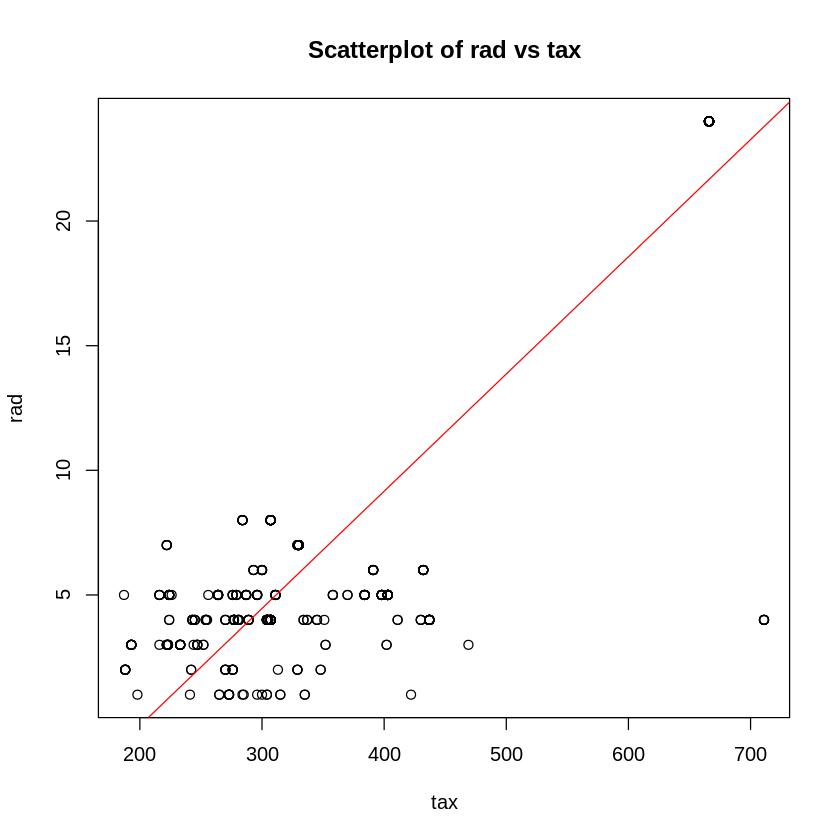

[1] 0.2159844


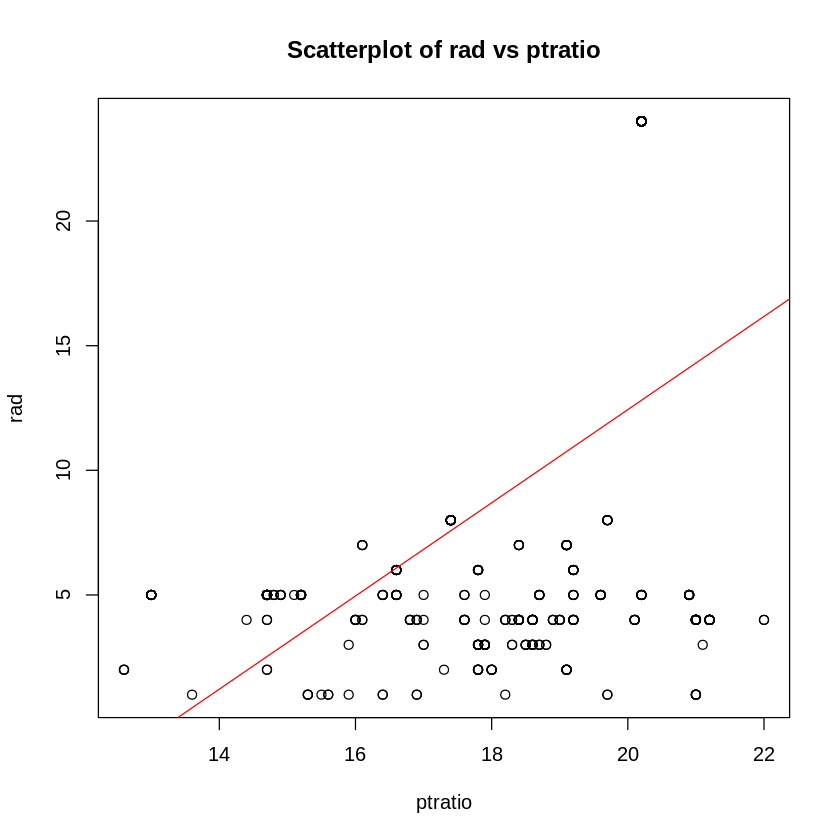

[1] 0.1975028


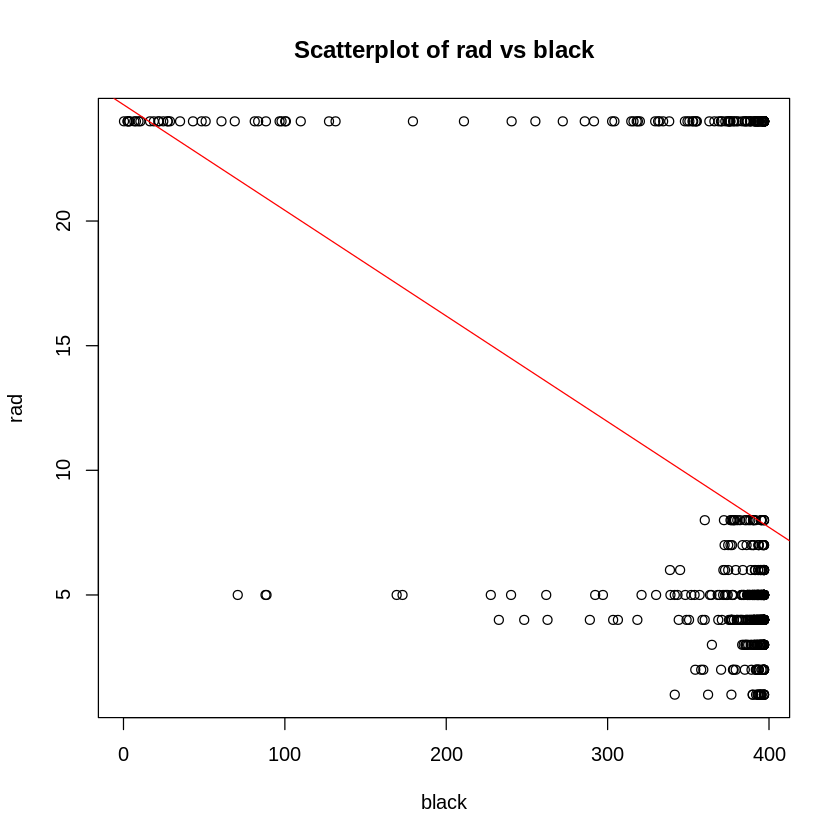

[1] 0.2388046


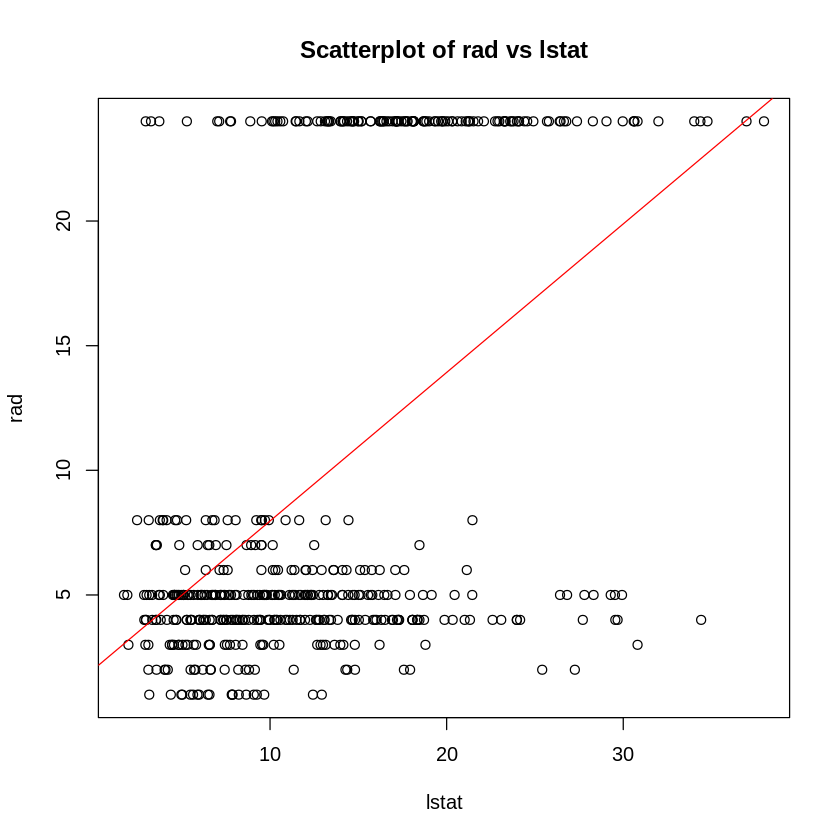

[1] 0.1456386


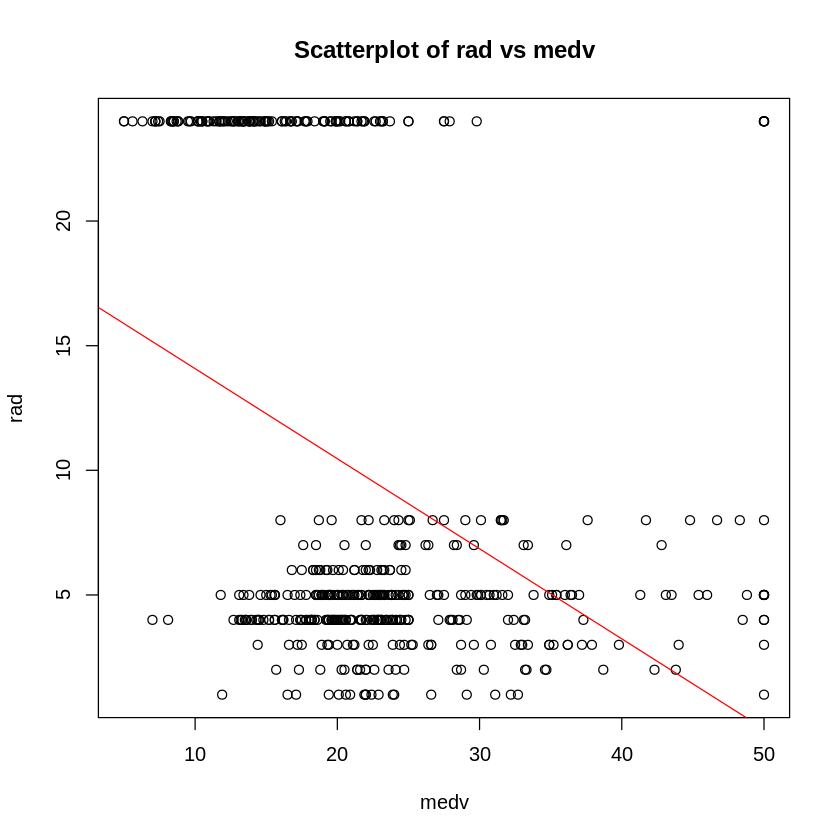

[1] 0.2123855


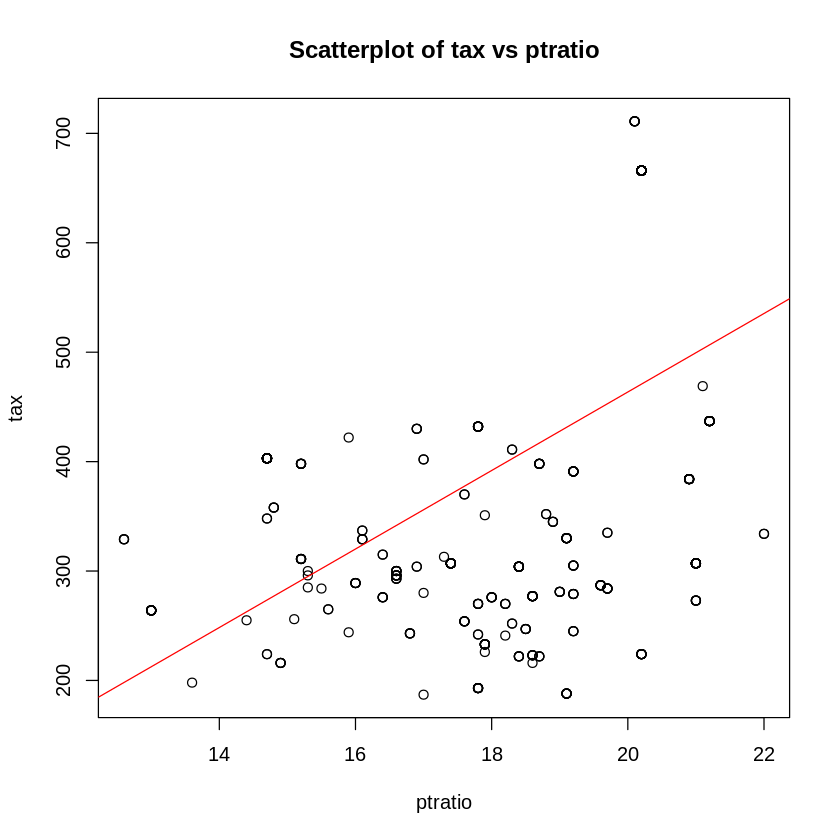

[1] 0.1951943


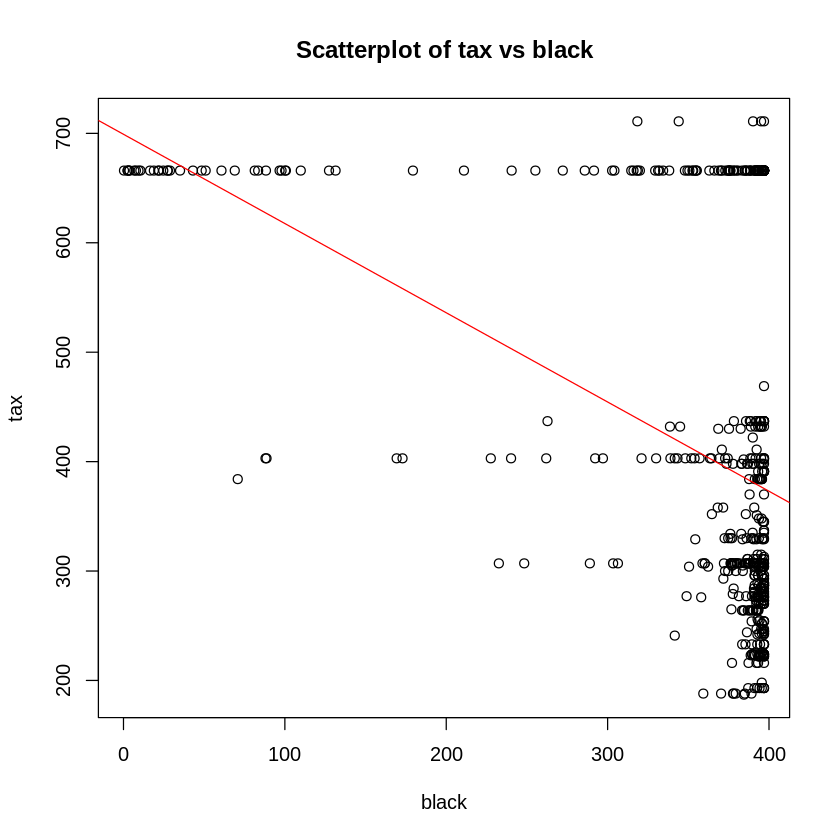

[1] 0.2959288


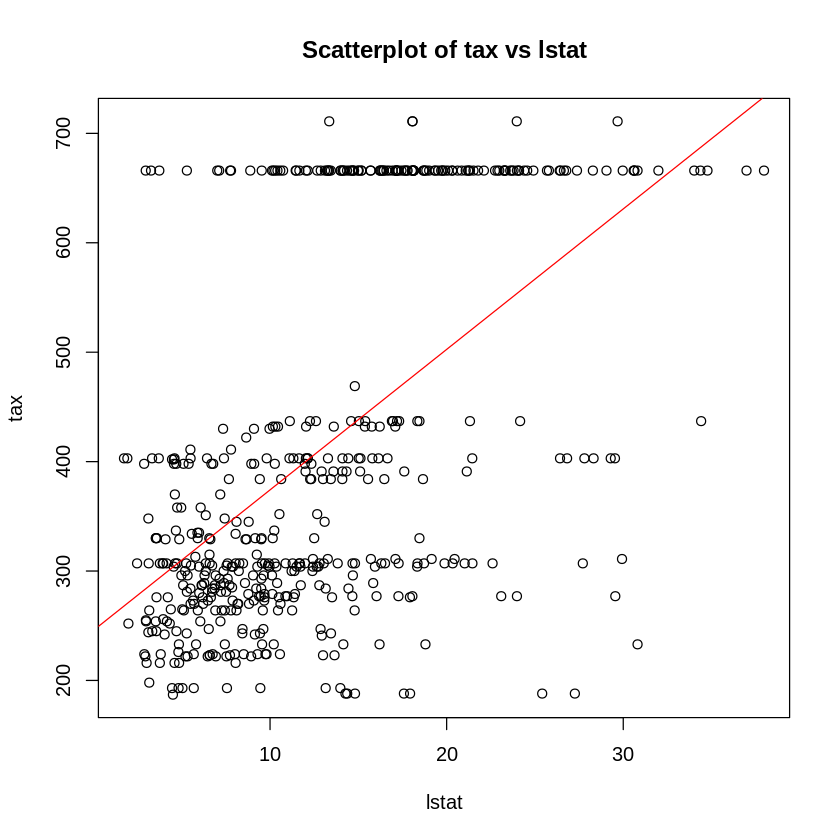

[1] 0.2195259


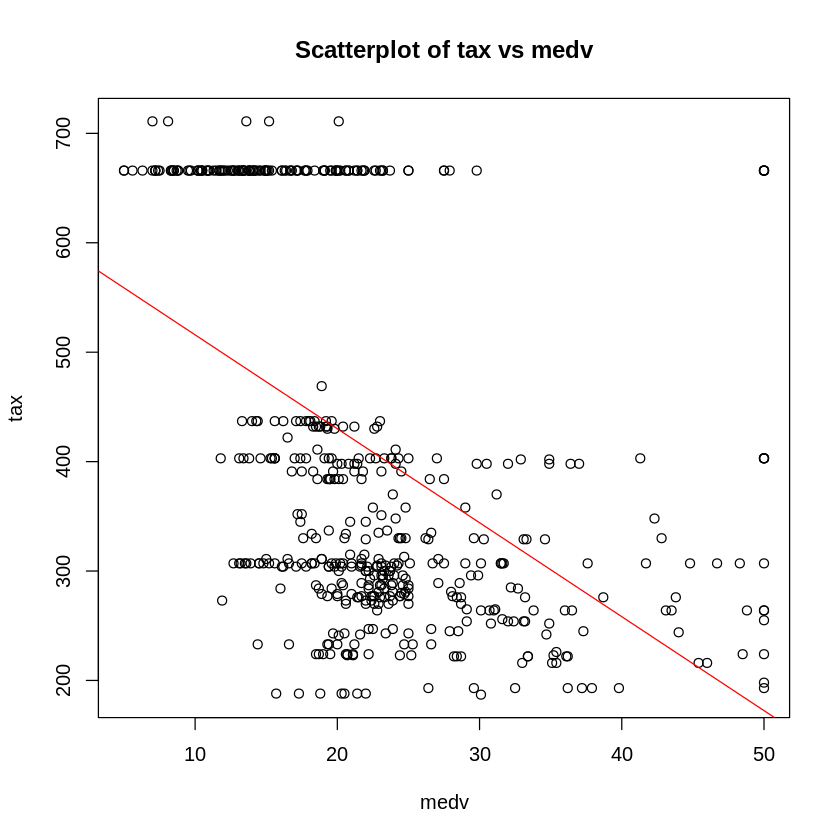

[1] 0.03146484


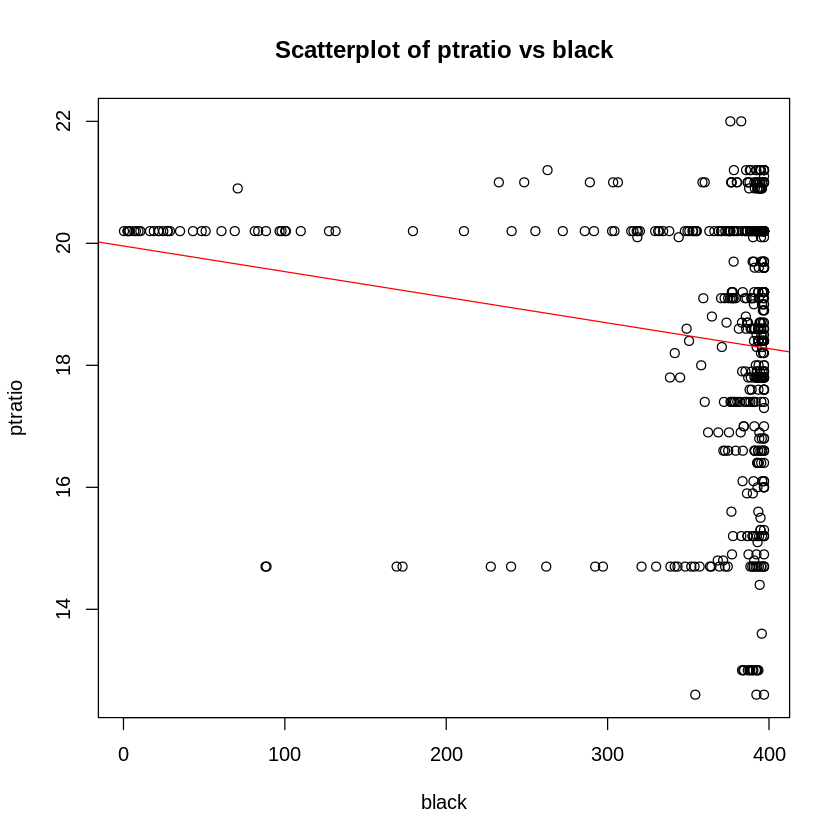

[1] 0.1399092


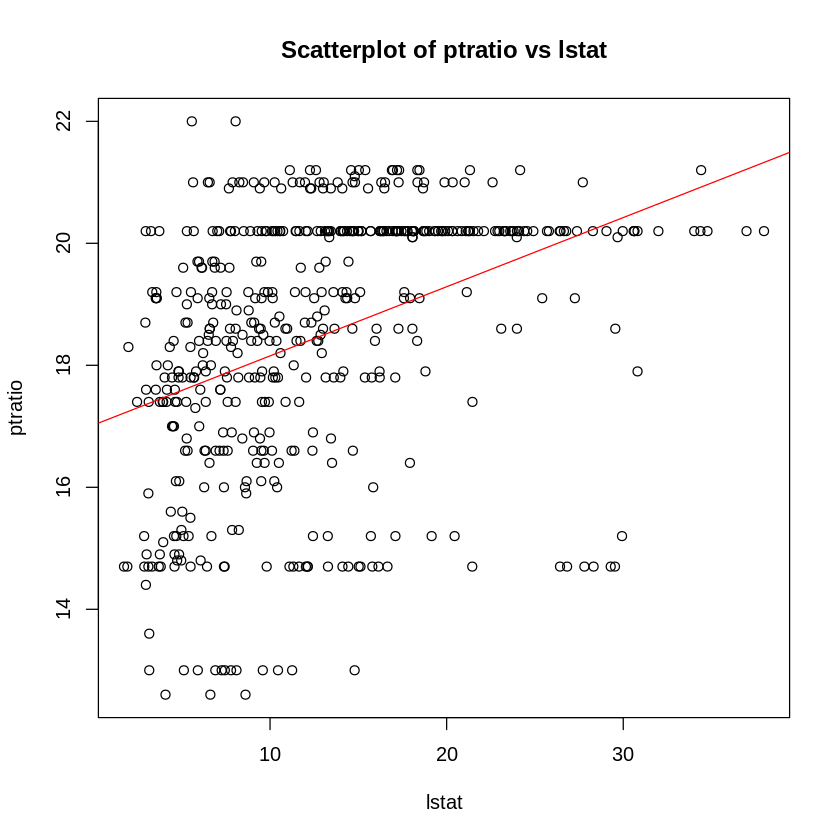

[1] 0.2578473


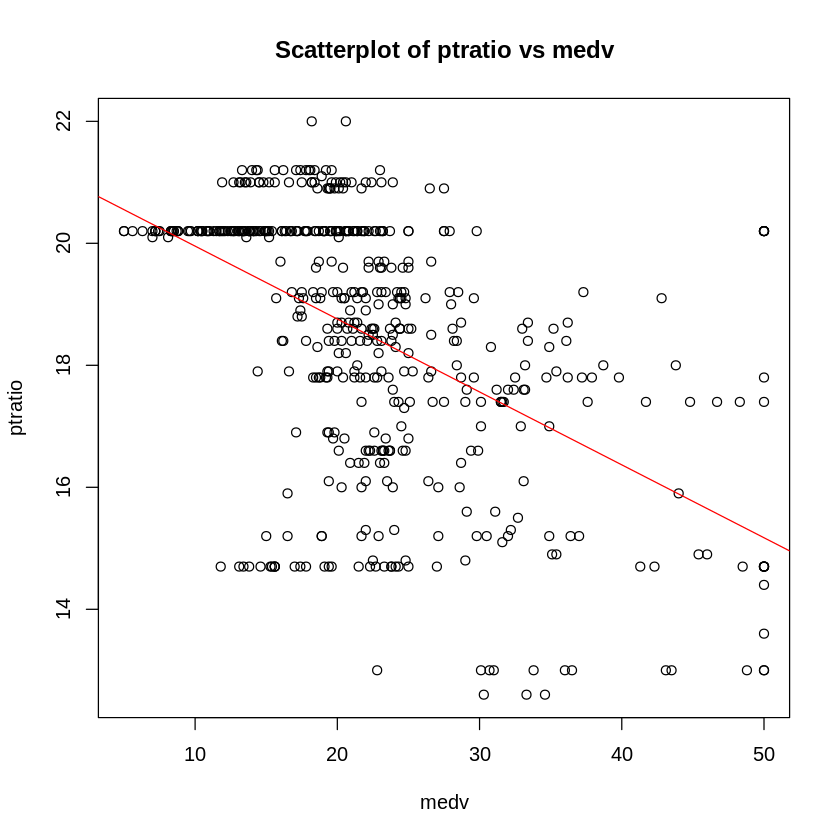

[1] 0.1340196


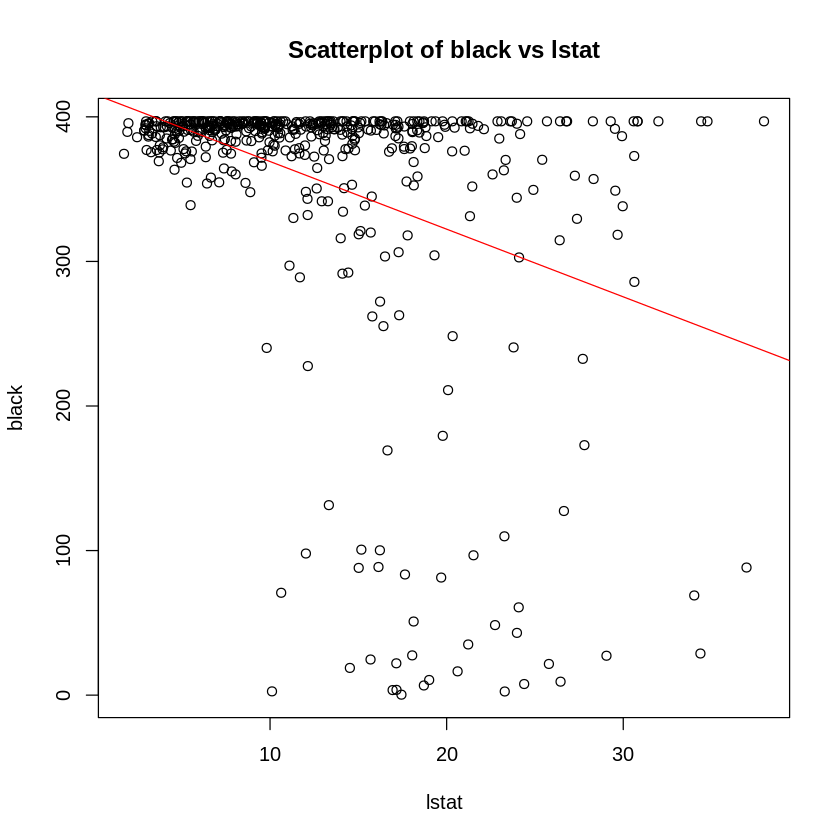

[1] 0.1111961


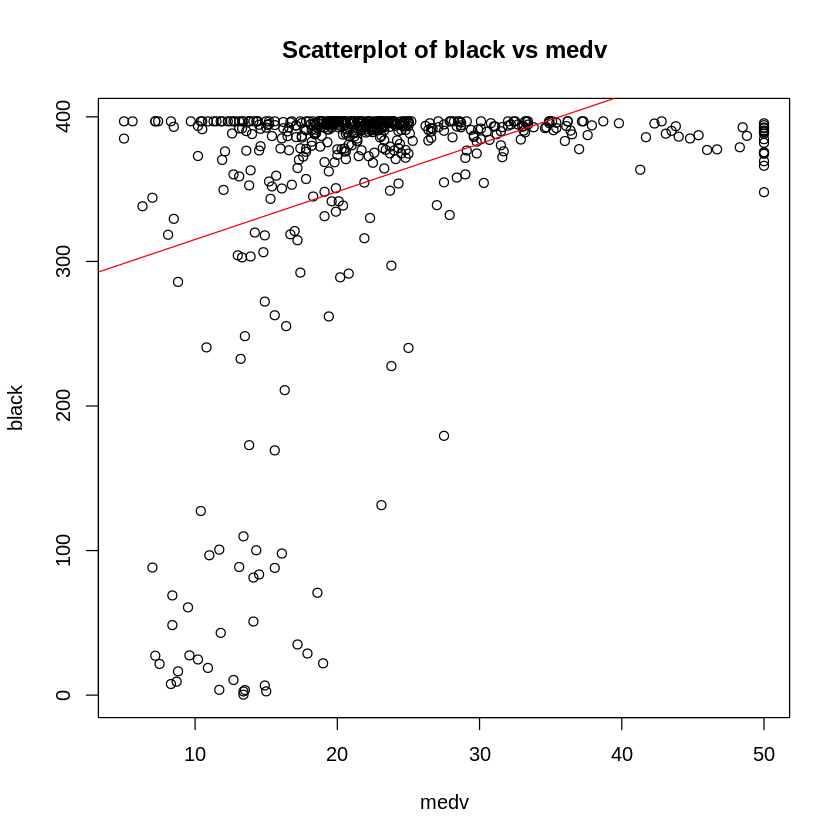

[1] 0.5441463


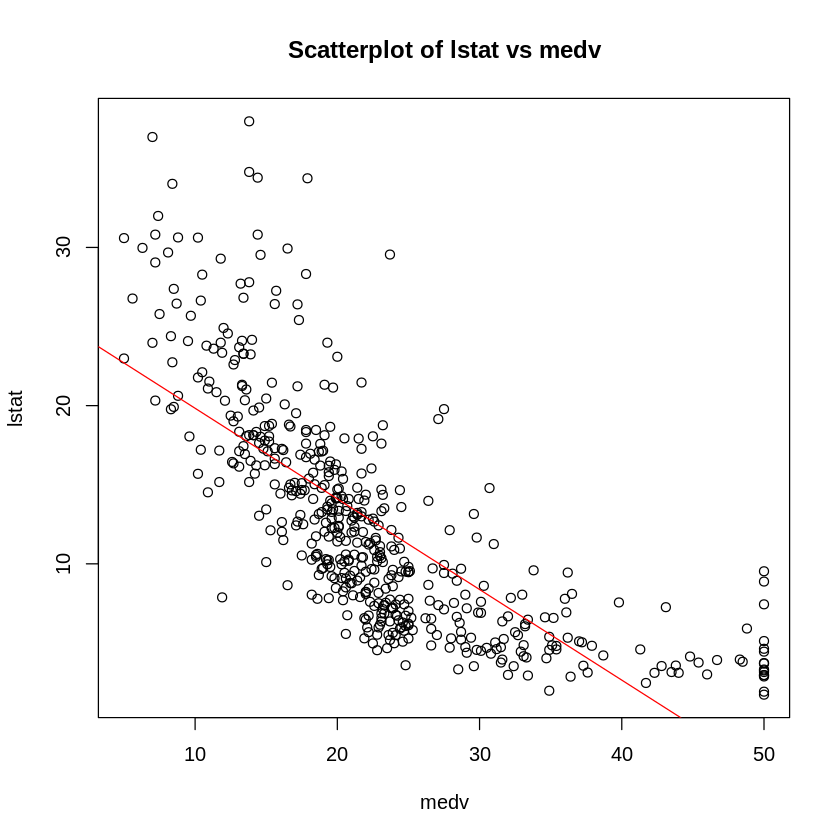

In [7]:
names <- names(Boston)

for (j in names) {
  for (i in names[names != j]) {
    #formula <- as.formula(paste("medv ~", i))
    formula <- as.formula(paste(j , '~', i))

    plot(formula, Boston, #data=Boston,
    xlab=i, ylab= j,
    main = paste("Scatterplot of", j, "vs", i))

    lin_model = lm(formula, data=Boston) #cannot use directly i ~ j here
    print(summary (lin_model)$r.squared) #shows coefficientes, R^2 and p-values ????
    abline(lin_model, col = 'red')
  }
  names <- names[-1] #removes first item???
}





#UNDERSTANDING CORRELATION

Let's start with a linear, power-law, exponential and logarithmic model to fir to our data
Im only doing it for the first variables, zn and crim (WHICH ARE CLEARLY NON LINEAR) --> EXTEND TO OTHER VARIABLES WITH A LOOP (?)

```R
#power_law <- function(zn, a, b) {
#  return(a / (zn + b))
#}
# Fit nonlinear least squares model
#power_model <- nls(crim ~ power_law(zn, a, b), data = Boston, start = list(a = 1, b = 1))
# Summary of results
#summary(power_model)

#exp_decay <- function(zn, a, b) {return(a * exp(-b * zn))}
# Fit nonlinear least squares model
#exp_model <- nls(crim ~ exp_decay(zn, a, b), data = Boston, start = list(a = max(df$crim), b = 0.1))
# Summary of results
#summary(exp_model)

#log_model <- lm(crim ~ log(zn + 1), data = Boston)
# Summary of results
#summary(log_model)
```

Comparing between models to see the best fit = R^2 + AIC (AKAIKE INFORMATION CRITERION)

  - Extract R-squared values = presents the proportional improvement in the
  prediction of the regression model in comparison with the average model. E[0,1]

ANOTHER METRIC: ECM- Error Cuandrático Medio (or RSME- Root Mean Squared Error)
```R
#r2_power <- summary(power_model)$r.squared
#r2_exp <- summary(exp_model)$r.squared
#r2_log <- summary(log_model)$r.squared
#AIC(power_model, exp_model, log_model) #THE SMALLER THE BEST
```


CONLUSION: there's a "linear correlation" in (VISUAL INSPECTION):

- indux .vs. max/tax/pratio

- rm .vs. lstat/medv

- age .vs. dire

- listat .vs. medv


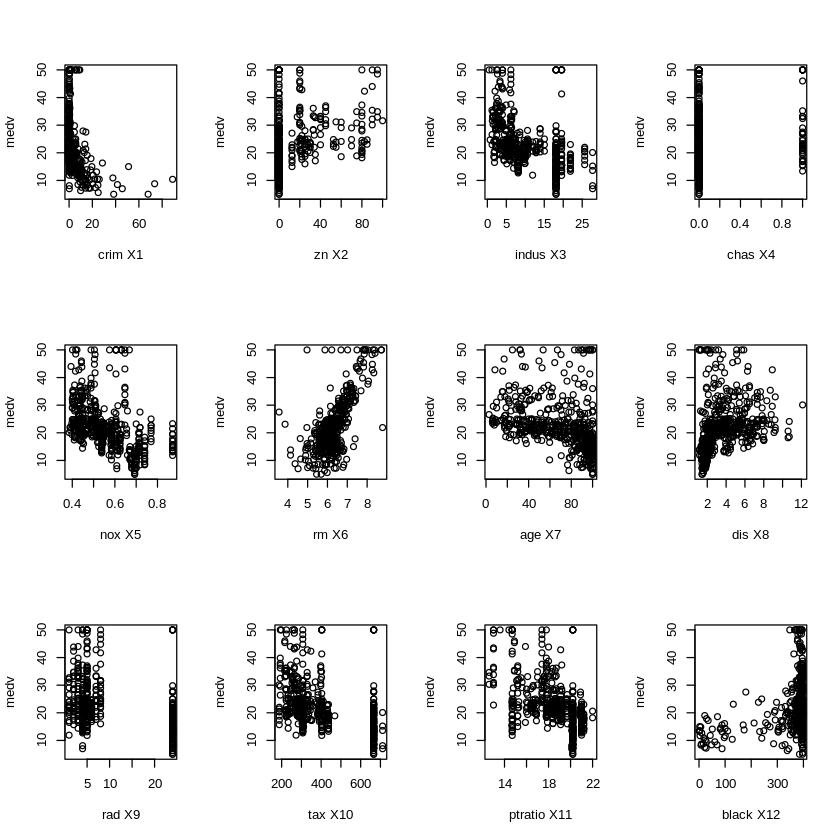

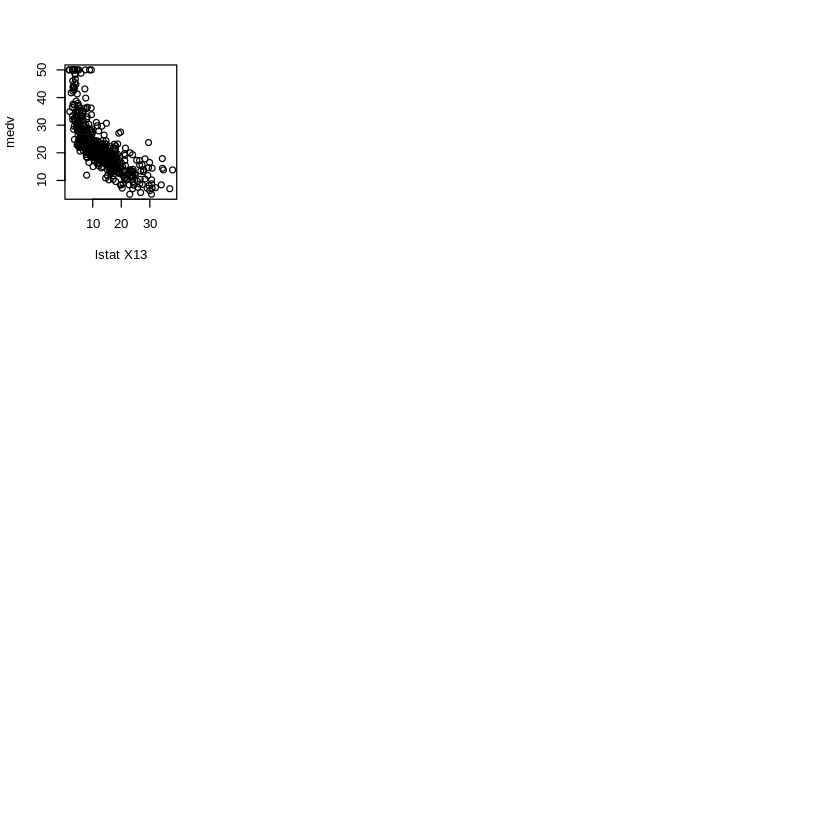

In [8]:
temp <- Boston
plotY <- function (x,y) {
plot(temp[,y]~temp[,x], xlab=paste(names(temp)[x]," X",x,sep=""),
ylab=names(temp)[y])
}
par(mfrow=c(3,4))
x <- sapply(1:(dim(temp)[2]-1), plotY, dim(temp)[2]) #plotting mdeva against all other variables
par(mfrow=c(1,1))

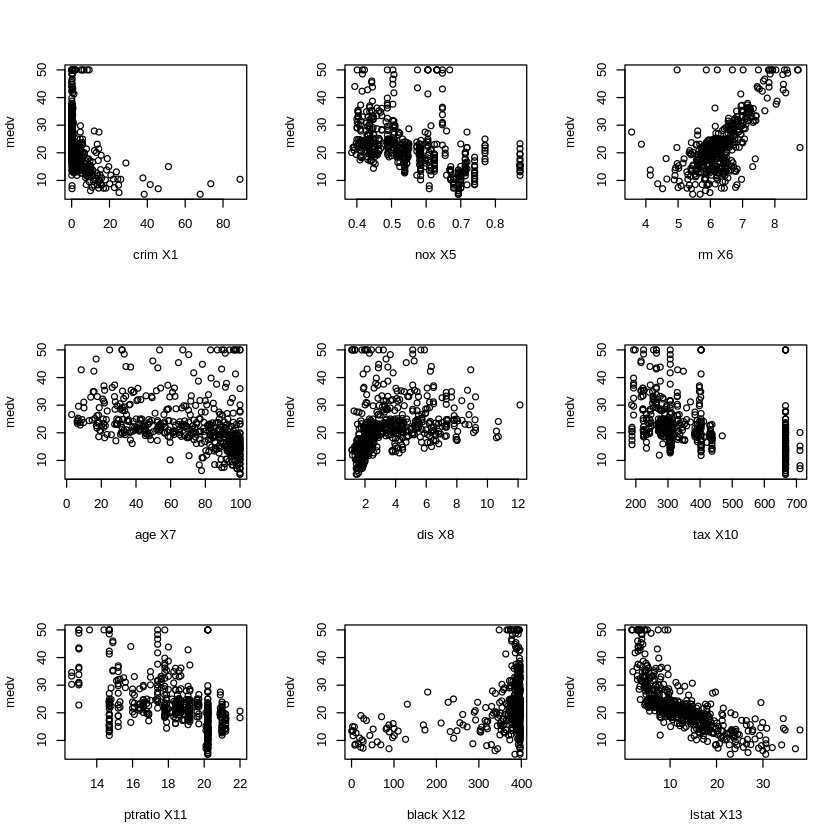

In [9]:
par(mfrow=c(3,3))
x <- sapply(c(1, 5, 6, 7, 8, 10, 11, 12, 13), plotY, dim(temp)[2])
par(mfrow=c(1,1))

through a visual inspection, it is clear that we can use a linear regressor for the predictor rm (average number of rooms per dwelling) and lstat (lower status of the population in percentage) with the response mdev.

**why only using medv like the response?**

medv = median value of owner-occupied homes in $1000's.

UNDERSTANDING CORRELATION

Let's start with a linear, power-law, exponential and logarithmic model to fit to our data

Im only doing it for the first variables, zn and crim (WHICH ARE CLEARLY NON LINEAR) --> TODO: EXTEND TO OTHER VARIABLES WITH A LOOP

```R
power_law <- function(zn, a, b) {
  return(a / (zn + b))
}
#Fit nonlinear least squares model
power_model <- nls(crim ~ power_law(zn, a, b), data = Boston, start = list(a = 1, b = 1))
#Summary of results
summary(power_model)

exp_decay <- function(zn, a, b) {return(a * exp(-b * zn))}
#Fit nonlinear least squares model
exp_model <- nls(crim ~ exp_decay(zn, a, b), data = Boston, start = list(a = max(df$crim), b = 0.1))
# Summary of results
summary(exp_model)

log_model <- lm(crim ~ log(zn + 1), data = Boston)
# Summary of results
summary(log_model)

#compare between models to see the best fit = R^2 + AIC (AKAIKE INFORMATION CRITERION)

# Extract R-squared values = presents the proportional improvement in the
#prediction of the regression model in comparison with the average model. E[0, 1]
#THE SMALLER THE BEST
r2_power <- summary(power_model)$r.squared
r2_exp <- summary(exp_model)$r.squared
r2_log <- summary(log_model)$r.squared
AIC(power_model, exp_model, log_model)
```




In [10]:
fit1 = lm(medv ~lstat, data=Boston)#fit1 = lm(Boston$medv ~Boston$lstat)
fit1

fit2 = lm(medv ~rm, data=Boston)
fit2


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  



Call:
lm(formula = medv ~ rm, data = Boston)

Coefficients:
(Intercept)           rm  
    -34.671        9.102  


Coefficients are estimated by the least squares technique, minimizing the error for each instance in the training set.

    For a multivariate regressor, the ideal case where this technique is fully generalizable occurs when the regressors are not correlated

In [11]:
predictors <- c("lstat", "rm")  # Define the predictors to use
models <- list()  # Initialize an empty list to store the models

for (predictor in predictors) {
  formula <- as.formula(paste("medv ~", predictor))  # Create the formula dynamically
  model <- lm(formula, data = Boston)  # Fit the linear model
  models[[predictor]] <- model  # Store the model in the list with the predictor name as the key
}

models[["lstat"]]  # Access the model with lstat as predictor
models[["rm"]]  # Access the model with rm as predictor


Call:
lm(formula = formula, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  



Call:
lm(formula = formula, data = Boston)

Coefficients:
(Intercept)           rm  
    -34.671        9.102  


[1] "summary of linear regression medv.vs. lstat"

Call:
lm(formula = formula, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16

                2.5 %     97.5 %
(Intercept) 33.448457 35.6592247
lstat       -1.026148 -0.8739505
[1] "summary of linear regression medv.vs. rm"

Call:
lm(formula = formula, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -34.671      2.650  -13.08   <2e-

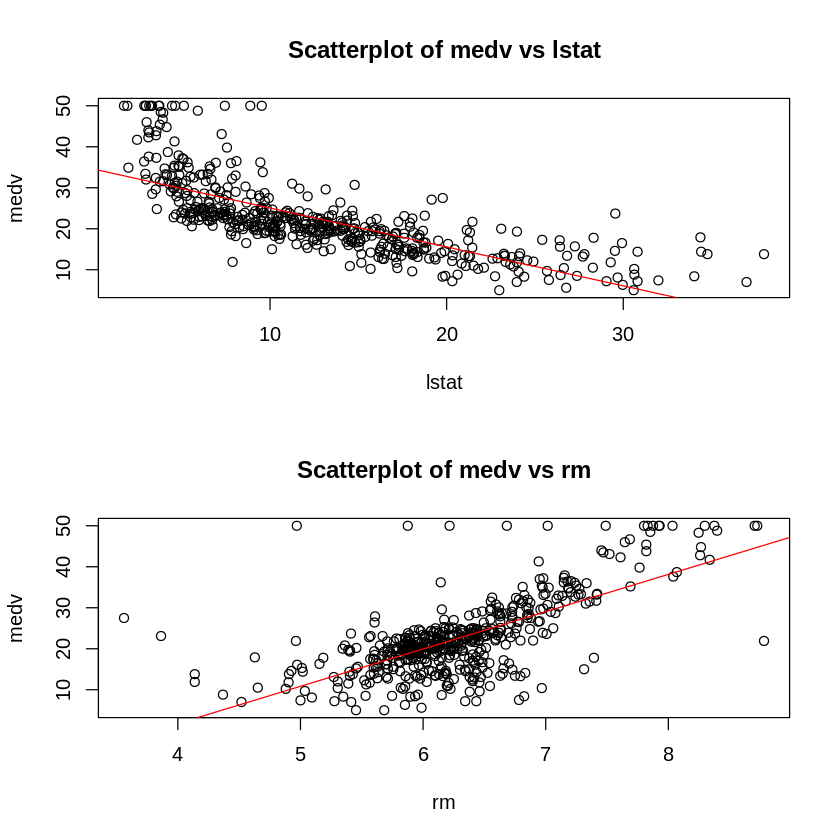

In [12]:

par(mfrow=c(2,1)) # Adjust grid layout as needed

for (predictor in predictors) {
  model <- models[[predictor]] # Get the model from the list

  # Display model summary
  print(paste("summary of linear regression medv.vs.", predictor))
  print(summary(model))

  # Create scatter plot and add regression line
  plot(Boston$medv ~ Boston[,predictor],
       xlab = predictor,
       ylab = "medv",
       main = paste("Scatterplot of medv vs", predictor))
  abline(model, col = "red")

  # Display confidence intervals
  print(confint(model)) #confidence intervals for estimated coefficients
  #confidence_intervals = range of values within which the true population parameter
  #is expected to fall within a certain level of confidence
}

par(mfrow=c(1,1)) # Reset plotting area

Statistical measurement for multivariate linear regression = is there at least one regressor that has a linear relationship with the response?

    Call:
    lm(formula = formula, data = Boston)

    Residuals:
        Min      1Q  Median      3Q     Max
    -15.168  -3.990  -1.318   2.034  24.500

    Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
    (Intercept) 34.55384    0.56263   61.41   <2e-16 ***
    lstat       -0.95005    0.03873  -24.53   <2e-16 ***
    ---
    Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    Residual standard error: 6.216 on 504 degrees of freedom
    Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432
    F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16

                    2.5 %     97.5 %
    (Intercept) 33.448457 35.6592247
    lstat       -1.026148 -0.8739505

The **residuals** are the differences between observed and predicted values. From the information here provided we can assess the distribution of errors and potential outliers (?)
So, in this first example, we see that the median value (this is the value for which values above are 50% of the dataset and values below are 50% of the dataset is -1.318 and the min and max values are -15... and 24.... This may mean that there are outliers in our dataset). The distribution of residuals/errors also show that 25% of the data lies below -3... and 25%  of the data above 2...

The **coefficients** shows its estimation an the Sandard error (it shows its variability(?)). In this case, it is low which shows a good fitthen it is showed the t-statistic ($= \frac{estimate}{SD}$). It is used for hypothesis testing

Pr(>|t|) is the p-value associated with the t-statistic. Indicates the probability of observing such an extreme t-value if there were no relationship between the predictor and the response.

The **residual standard error** represents the SD of the residals. Measures the average difference bertween the observed and predicted values. It is high for this approximation, but the rest of the values (F-statistic and p-value shows that the approximation is statistically significant)

###What are these values?
  - **p-value (associated to each coffieient)**: indicates if the coefficient is relevant for the linear regression. values above 0.15 may indicate its not relevant

  - **t-statistic**: if it goes away from 1, indicates that theres at least one regressor that presents a linear relationship with the response. If it gets closer to 1, we can skip the linear regression as one not suitable method for the regression task

  - **f-statistic** tests the overall significance of the model, assessing whether at least one predictor variables has a significant relationship with the response variable.

  -**$R^2$ (Determination Coefficient)** E[0, 1]. 1 reveals a perfect fit. To be able to compare models with different number of variables, we need to calculate the adjusted $R^2$

$R^2 = \frac{sum \quad squares \quad residuals}{total \quad sum \quad squares} = \frac{SSres}{SStot}$

being $y = {y_{1}, ..., y_{n}}$ the n observations in the response and $y' = {y'_{1}, ..., y'_{n}}$ the predicted values of the response

$SSres = \sum_{0}^{n} (y_{i}- y'_{i}) ^2 $  

$SStot = \sum_{0}^{n}(y_{i} - <y>)^2$

                       
                            
  - **adjusted $R^2$** = its a modified version of R-squared that takes into account the number of predictors in a regression model,addressing a limitation of R-squared, which tends to increase as more predictors are added to the model, even if those predictions dont significantly improve the models explanatory power
$
Adjusted \quad R^{2} = \frac{1 - [(1 - R^{2}) (n - 1)]} {(n - k - 1)}
$


where

$R^2$ = regular R-squared

n = number of observations in the dataset

k = number of predictors
  - **multiple $R^2$** = measure of the proportion of variance in the response variable that is explained by the predictor variables in the model. E[0, 1]. Higher values indicates a better fit. = $R^2$???????

  - **degrees of freedom** indicates the number of independent pieces of information used to estimate the model parameters

  - **estimated SD** is a measure of the variability or spread of the residuals. A lower value indicates better predictive accuracy for the model




  NOTE: THE LINEAR REGRESSION IS A METHOD THAT DEPENDS HEAVILIY IN THE SELECTION OF VARIABLES --> **Extensions to the linear model (!)**


  Interpretation:

  *Coefficients*: Examine the "Estimate" and "Pr(>|t|)" columns to understand the relationship between each predictor and the response. A low p-value (typically below 0.05) suggests a statistically significant relationship.

  *R-squared*: A higher R-squared indicates a better fit, meaning the model explains more of the variance in the response variable.

  *F-statistic*: A significant F-statistic (low p-value) suggests that the model as a whole is statistically significant.
  Residual standard error: A lower residual standard error indicates a better model fit, as the predictions are closer to the actual values.

In [13]:
#similar values between R^2 and adjusted R^2

#accesing information of the linear regression model
fit1= models[['lstat']]
fit2 = models[['rm']]

names(fit1)
names(fit2)

sqrt(sum(fit1$residuals^2)/length(fit1$residuals))
#smaller RMSE than calculated with summary()

sqrt(sum(fit1$residuals^2)/(length(fit1$residuals)-2))
#equal than the value of summary()

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

[1] 6.203464

[1] 6.21576

RMSE Calculation and Denominator Choice

Two ways of calculating the RMSE

- Using n-p in the denominator: This is the more statistically rigorous approach, especially when dealing with smaller sample sizes

$RMSE = sqrt(sum(residuals^2) / (n - p))$

  where:

    - residuals: The differences between the observed and predicted values.
    - n: The number of observations.
    - p: The number of parameters estimated in the model (including the intercept).

  > This formula accounts for the degrees of freedom lost when estimating model parameters. Since you're using data to estimate parameters, you have slightly less information available to assess model fit.
  
  > Using n-p provides an unbiased estimate of the population RMSE, especially when the sample size (n) is relatively small compared to the number of parameters (p).

- Using n in the denominator: This is often used in practice, especially for comparisons between models.

$RMSE = sqrt(sum(residuals^2) / n)$

    where:
    - residuals: The differences between the observed and predicted values.
    - n: The number of observations.

> This simpler formula is often used in practice for model comparisons.

> When the sample size (n) is large compared to the number of parameters (p), the difference between using n and n-p becomes negligible.

> It provides a measure of the average prediction error on the observed data, which is often the primary focus for practical applications.














**CONCLUSION**

n-p is theoretically preferred: It provides a statistically unbiased estimate, especially for smaller sample sizes.
n is commonly used for comparisons: When comparing models, using n in the denominator is more common because:
- It simplifies the calculation.
- The difference between using n and n-p is often minimal in practical scenarios.
- It provides a direct measure of the average prediction error on the observed data.


> For rigorous statistical analysis and unbiased estimation, especially with smaller datasets, use the RMSE formula with the n-p denominator.

> For practical model comparisons, where the focus is on relative performance, using the RMSE formula with the n denominator is often sufficient and more common.

#PREDICTION OF NEW RESPONSE VALUES!



In [14]:
predict(fit1, data.frame(lstat = c(5, 10, 15)))

1        2        3 
29.80359 25.05335 20.30310

# MANUAL CALCULATION OF RMSE (Root of Mean Squared Error) OVER A SET





In [15]:
yprime=predict(fit1,data.frame(lstat=Boston$lstat))
#o directamente #yprime=predict(fit1,Boston)
sqrt(sum(abs(Boston$medv-yprime)^2)/length(yprime))


[1] 6.203464


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16



Call:
lm(formula = medv ~ lstat + rm, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.076  -3.516  -1.010   1.909  28.131 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.35827    3.17283  -0.428    0.669    
lstat       -0.64236    0.04373 -14.689   <2e-16 ***
rm           5.09479    0.44447  11.463   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.54 on 503 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6371 
F-statistic: 444.3 on 2 and 503 DF,  p-value: < 2.2e-16



Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0


Call:
lm(formula = medv ~ . - age - indus, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.736 on 494 d


Call:
lm(formula = medv ~ . - age - indus - chas - crim, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8917  -2.7329  -0.4988   1.8547  26.6433 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.459724   5.158054   6.875 1.87e-11 ***
zn            0.041396   0.013737   3.013 0.002715 ** 
nox         -15.502932   3.583879  -4.326 1.84e-05 ***
rm            3.879580   0.414180   9.367  < 2e-16 ***
dis          -1.451648   0.187926  -7.725 6.26e-14 ***
rad           0.252412   0.061778   4.086 5.12e-05 ***
tax          -0.012360   0.003427  -3.606 0.000342 ***
ptratio      -0.968703   0.131248  -7.381 6.69e-13 ***
black         0.010842   0.002705   4.008 7.06e-05 ***
lstat        -0.555124   0.047699 -11.638  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.832 on 496 degrees of freedom
Multiple R-squared:  0.7289,	Adjusted R-squared:  0.724 
F-statistic: 148.2 on

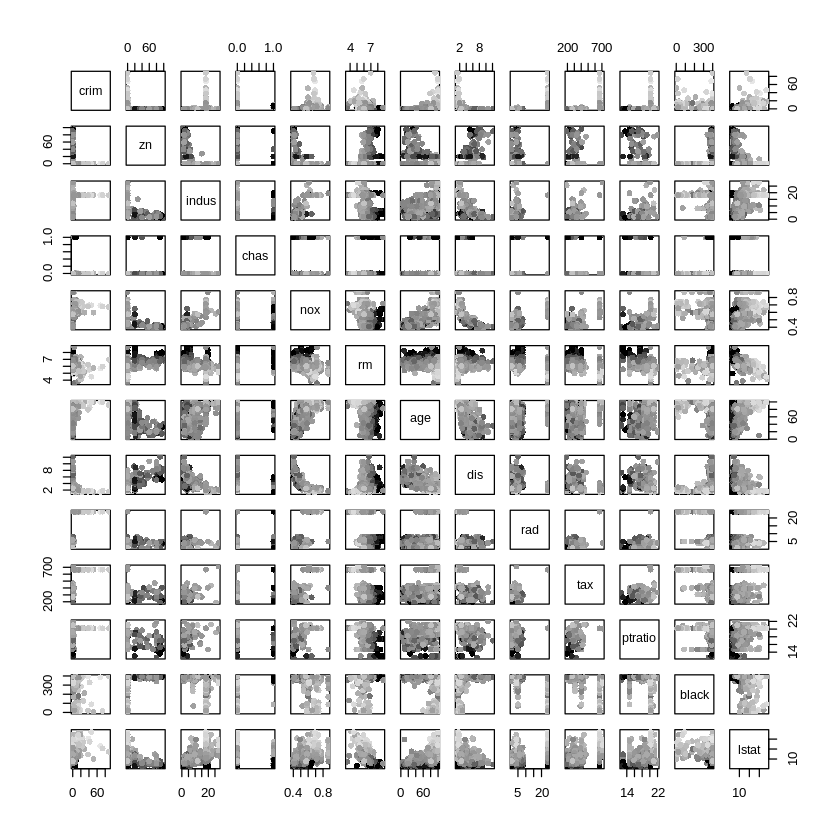

In [17]:
#MULTIPLE LINEAR REGRESSION MODELS

#ascendent selection = we start with the null model, this is a model that only
#contains the independent term --> Make simple linear regressions and aggregate the
# variable thah has the more low error. Cotinue until some criteria is met, e.g.
# when all the rest of the variables have a p-value abocve certain threshold
#when trying to add them

fit3=lm(medv~lstat+age,data=Boston)
summary(fit3)


temp <- Boston
plot(temp[,-dim(temp)[2]],pch=16,col=gray(1-(temp[,dim(temp)[2]]/max(temp[,dim(temp)[2]])))) #whats this used for?

#lstat+rm
fit4=lm(medv~lstat+rm,data=Boston)
summary(fit4)
#it gets improved



#descendent selection: start with all variables of the model and eliminate the
#variable with the highest p-value = (the less statistically significant variable)
# and go on

fit5=lm(medv~.,data=Boston)
summary(fit5)

#eliminate irrelevant variables (those with higher p-values) and we look for R^2
#adjusted for improvement
fit6=lm(medv~.-age-indus,data=Boston)
summary(fit6)

fit7=lm(medv~.-age-indus-chas-crim,data=Boston) #it gets worse!!!
summary(fit7)



ATTENTION!

PROCEED WITH CARE COMPARING MODELS WITH DIFFERENT NUMBER OF PREDICTORS

- The degrees of freedom in a regression model represents the number of values that are free to change in a statistic
  - In the regression context these are related to the number of observations and the number of estimated parameters in the model --> when more predictors are aggregated to the model, less degrees of freedom

-->

When comparing models with different number of predictors, we have to pay close attention to the degrees of freedom <-- the statistics (like the adjusted $R^2$) are calculated using the degrees of freedom. If degrees of freedom are not taking into consideration, complex models with more predictors may appear to be better than more simple models.

The degrees of freedom represent the quantity of independent information that can be used to estimate the parameters of the model
> first, you have df=observation. Each estimated parameter, takes away one degree of freedom.

  - When we have a model with a lot of predictos, we would have less df and a better adjusted $R^2$ but may overfit

The adjusted $R^2$ tries to mitigate the fact that $R^2$ tends to grow with more predictors even if *those predictors arent relevant*

# **Extensions to the linear model**

The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn





Call:
lm(formula = medv ~ lstat * rm, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.2349  -2.6897  -0.6158   1.9663  31.6141 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -29.12452    3.34250  -8.713   <2e-16 ***
lstat         2.19398    0.20570  10.666   <2e-16 ***
rm            9.70126    0.50023  19.393   <2e-16 ***
lstat:rm     -0.48494    0.03459 -14.018   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.701 on 502 degrees of freedom
Multiple R-squared:  0.7402,	Adjusted R-squared:  0.7387 
F-statistic: 476.9 on 3 and 502 DF,  p-value: < 2.2e-16



Call:
lm(formula = medv ~ I(lstat^2), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.242  -4.488  -2.202   2.540  24.554 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.647392   0.429925   64.31   <2e-16 ***
I(lstat^2)  -0.024240   0.001359  -17.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.207 on 504 degrees of freedom
Multiple R-squared:  0.3871,	Adjusted R-squared:  0.3859 
F-statistic: 318.3 on 1 and 504 DF,  p-value: < 2.2e-16


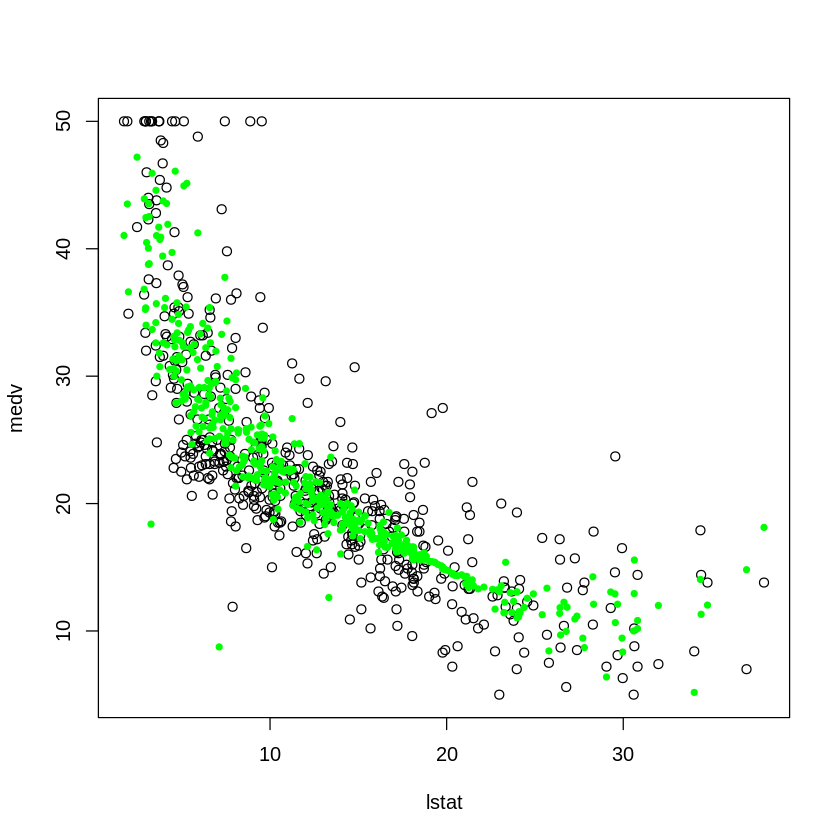


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


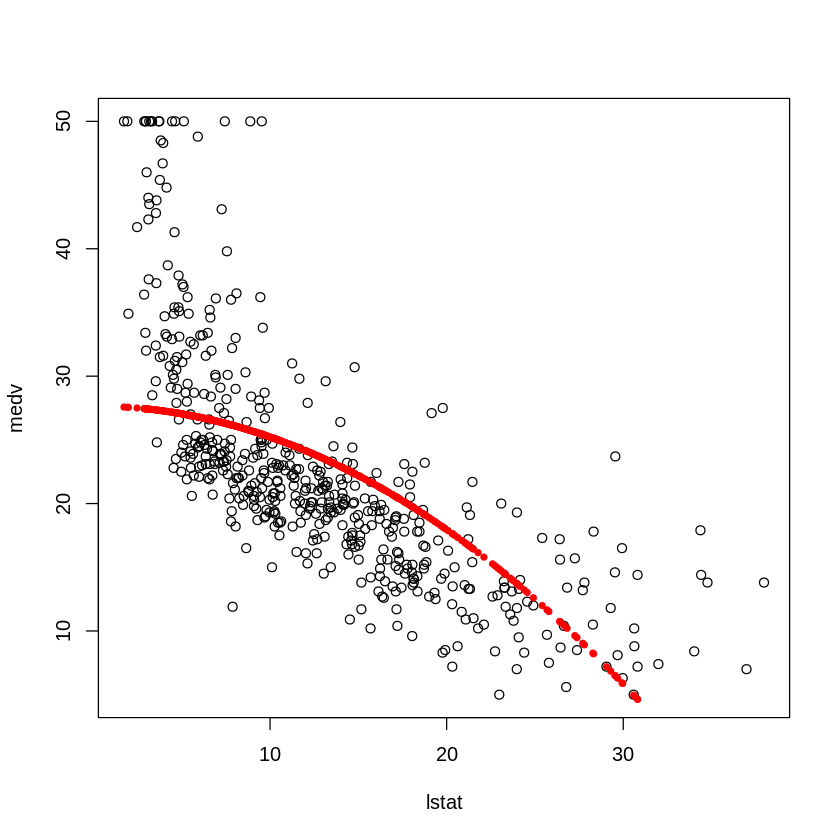

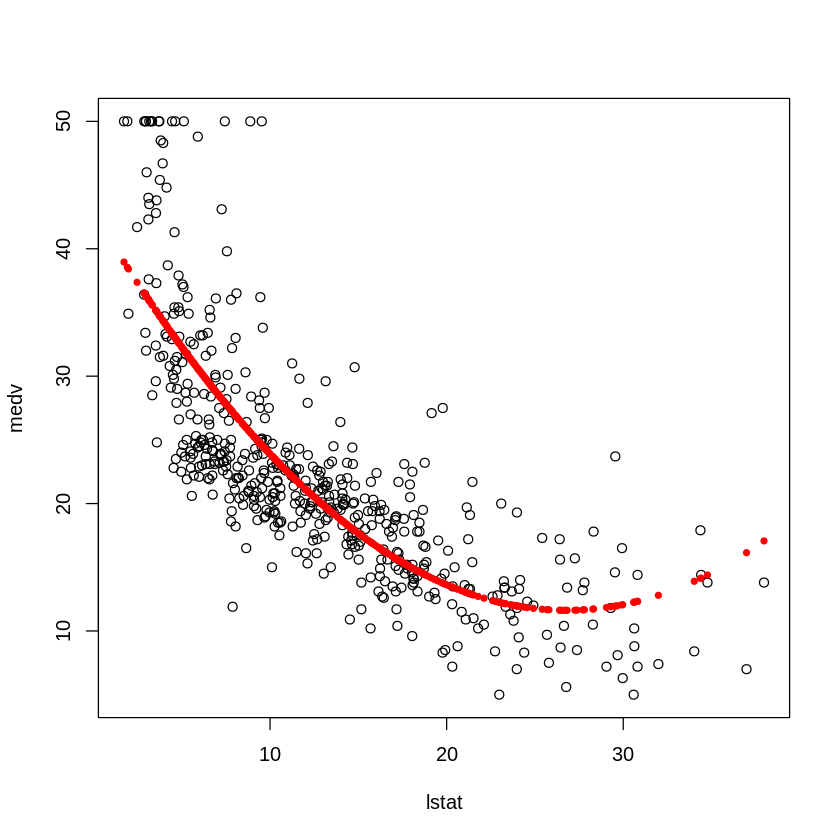

In [19]:
#INTERACTIONS AND NO LINEARITY = eliminating the additive supposition

#extensions to the linear model:
#- we consider new interaction terms (variables
#with positive synergy that powers each other)
#-non-linear terms (quadratic, logairthmic grow).
#BUT THE PRINCIPLE OF HIERARCHY HAS TO BE RESPECTED:
#this is if a new variable X_5^3 is added, then we should also incluse X_5^2 and
#X_2, even if their p-values are high

#LETS INCLUDE THE INTERACTION VARIABLE LSTAT*RM
attach(Boston)
fit8=lm(medv~lstat*rm,Boston)
summary(fit8)
plot(medv~lstat)
points(lstat,fitted(fit8),col="green",pch=20) #best model to the current time

#LETS INCLUDE NON LINEARITY

fit9=lm(medv~I(lstat^2),Boston)
summary(fit9)
plot(medv~lstat)
points(lstat,fitted(fit9),col="red",pch=20)
#REMEMBER: THE HIERARCHIAL PRINCIPLE
fit9=lm(medv~lstat +I(lstat^2),Boston)
summary(fit9)
plot(medv~lstat)
points(lstat,fitted(fit9),col="red",pch=20)




Call:
lm(formula = medv ~ lstat + rm + I(lstat * rm) + I(lstat^2) + 
    I(lstat^2 * rm), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.9804  -2.5819  -0.5236   2.0825  31.5691 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -38.009987   6.159613  -6.171 1.40e-09 ***
lstat             4.529066   0.838776   5.400 1.03e-07 ***
rm               11.363011   0.891732  12.743  < 2e-16 ***
I(lstat * rm)    -0.908820   0.132984  -6.834 2.41e-11 ***
I(lstat^2)       -0.079987   0.023042  -3.471 0.000563 ***
I(lstat^2 * rm)   0.014709   0.003952   3.722 0.000220 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.644 on 500 degrees of freedom
Multiple R-squared:  0.7475,	Adjusted R-squared:  0.745 
F-statistic: 296.1 on 5 and 500 DF,  p-value: < 2.2e-16


[1] 4.682768

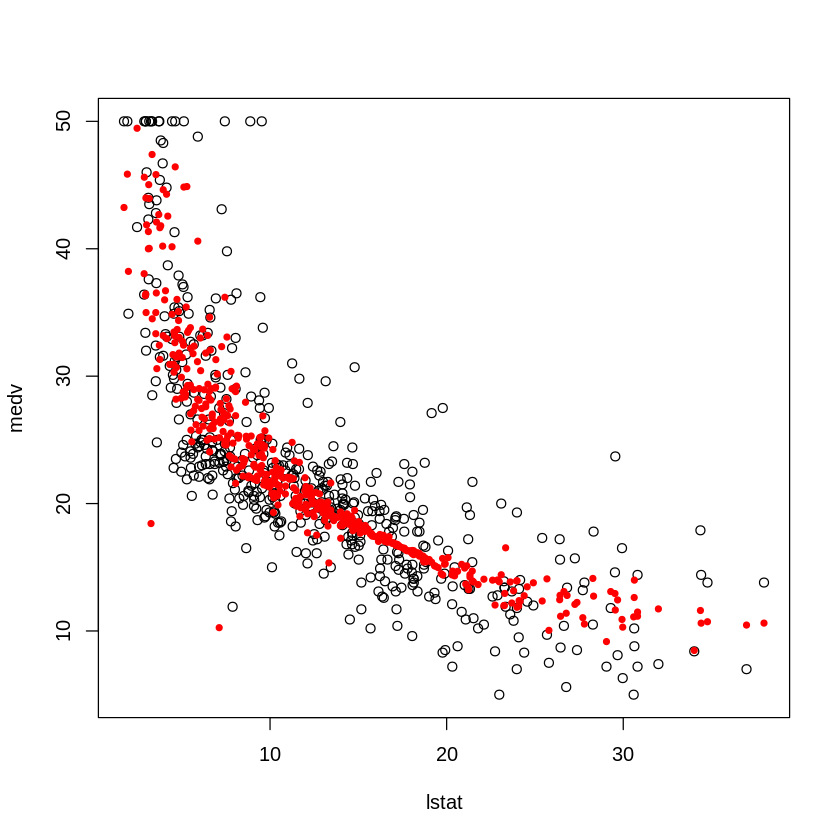

In [20]:
#...
fitprueba=lm(medv~lstat +rm +I(lstat * rm) +I(lstat^2) +I(lstat^2 * rm),Boston)
#BEST RESULT!!!
summary(fitprueba)
plot(medv~lstat)
points(lstat,fitted(fitprueba),col="red",pch=20)

yprime=predict(fit8,Boston)
sqrt(sum(abs(Boston$medv-yprime)^2)/length(yprime))

#NOTE!: DATASETS IMPORTATION

Important Considerations:

 >File Separators: Use forward slashes (/) as file separators in R, even on Windows systems.

  >Escape Characters: If your file path contains special characters (e.g., spaces), you may need to escape them using backslashes (\).

  >Working Directory: Be mindful of your current working directory. You can change it using setwd().

e.g:
getcwd()
setwd("C:/path_file")
list.files()
list.files(all.files=TRUE)


- Replace the backslashes (\) with forward slashes (/) in your file path. This is the preferred way to specify file paths in R, as it works consistently across different operating systems (even on Windows).

- If you need to use backslashes for some reason, you can escape them by using a double backslash (\\) instead of a single backslash.



In [21]:
 #KEEL DATASETS READING

 #download 'California' dataset in http://keel.es/

 #read downloaded dataset
 xtra <- read.csv("california.dat", comment.char="@", header = FALSE)
 #head(xtra)
 #Asignación manual
 names(xtra) <- c("Longitude", "Latitude", "HousingMedianAge",
 "TotalRooms", "TotalBedrooms", "Population", "Households",
 "MedianIncome", "MedianHouseValue")
#Asignación automática, facilita el acceso a los campos
 n <- length(names(xtra)) - 1
 names(xtra)[1:n] <- paste ("X", 1:n, sep="")
 names(xtra)[n+1] <- "Y"

Warning message in file(file, "rt"):
“cannot open file 'california.dat': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


Erase all variables from the R environment
rm(list=ls())

#Técnicas de regresión no paramétrica (theres no a priori functional form)

  - kNN for continuous variables. It won´t make a cluster. It will define a regressed response point
  - M5 (!!)

Other examples of Non-parametric Methods:

- Hypothesis Tests:

    - Mann-Whitney U test (alternative to the independent samples t-test)
    - Wilcoxon signed-rank test (alternative to the paired samples t-test)
    - Kruskal-Wallis test (alternative to one-way ANOVA)
    - Friedman test (alternative to repeated measures ANOVA)

- Confidence Intervals:
    - Bootstrap confidence intervals
    - Jackknife confidence intervals

- Descriptive Statistics:
  - Median, quartiles, and percentiles
  - Boxplots

When to Use Non-parametric Distributions:

  - Data violates assumptions of parametric tests: For example, if the data is not normally distributed or has unequal variances.
  - Ordinal or ranked data: When the data is not measured on a continuous scale but represents ranks or categories.
  - Small sample sizes: When the sample size is too small to reliably assess the assumptions of parametric tests.
  - Outliers are present: When the data contains outliers that may significantly influence the results of parametric tests.

Advantages of Non-parametric Distributions:

  - Fewer assumptions: More flexibility in data types and analysis.
  - Robustness to outliers: Less sensitive to extreme values.
  - Simplicity: Often easier to understand and apply.

Disadvantages of Non-parametric Distributions:

  - Less power: May have lower ability to detect true effects compared to parametric methods when assumptions are met.
  - Information loss: May not fully utilize all the information in the data.


In [22]:
install.packages("kknn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’




In [23]:
require(MASS)
attach(Boston)
require(kknn)

The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn


The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn


Loading required package: kknn



## KNN

In [24]:
fitknn1 <- kknn(medv~., Boston, Boston) #by default, k=7, distance=2, kernel='optimal', y scale = TRUE
names(fitknn1)
#fitknn1.fitted.values = values obtained for test examples

[1] "fitted.values" "CL"            "W"             "D"            
 [5] "C"             "prob"          "response"      "distance"     
 [9] "call"          "terms"

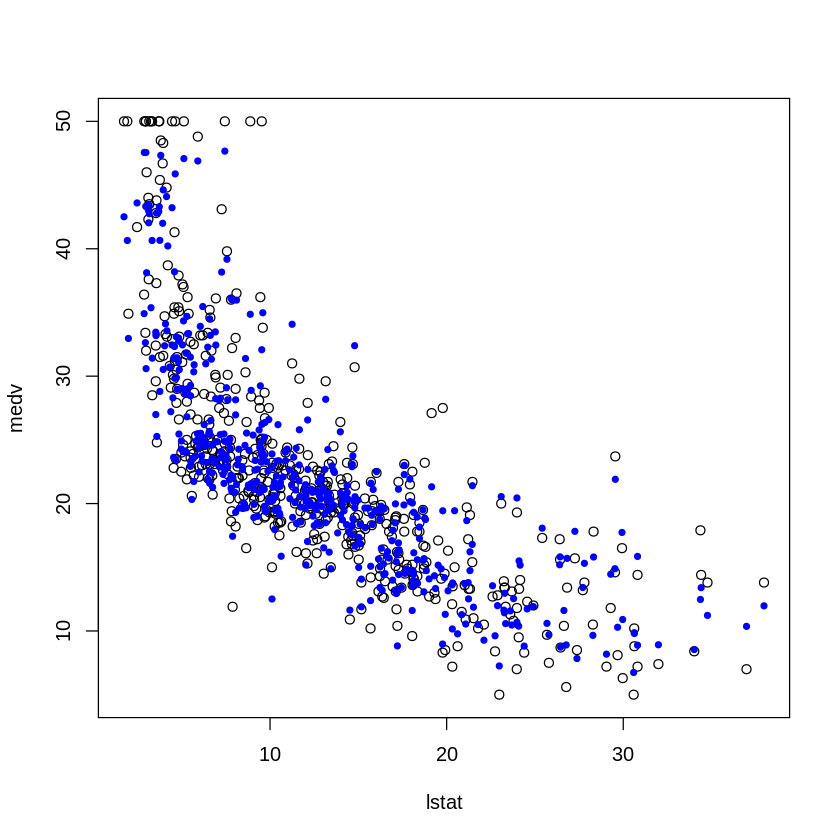

In [25]:
#VISUALIZATION

plot(medv~lstat)
points(lstat,fitknn1$fitted.values,col="blue",pch=20)

In [26]:
yprime = fitknn1$fitted.values

#manual calculation of RMSE
sqrt(sum((medv-yprime)^2)/length(yprime)) #RMSE
#sqrt(sum((Boston$medv-yprime)^2)/length(yprime))

[1] 2.467004

In [27]:


fitknn2 <- kknn(medv ~ lstat*rm+I(lstat^2)+age+crim+dis, Boston, Boston)
yprime = fitknn2$fitted.values; sqrt(sum((Boston$medv-yprime)^2)/length(yprime)) #RMSE

fitknn3 <- kknn(medv ~ lstat*rm+I(lstat^2)+age+crim+dis+black+nox, Boston, Boston)
yprime = fitknn3$fitted.values; sqrt(sum((Boston$medv-yprime)^2)/length(yprime)) #RMSE

fitknn4 <- kknn(medv ~ . + lstat*rm+I(lstat^2) - chas, Boston, Boston)
yprime = fitknn4$fitted.values; sqrt(sum((Boston$medv-yprime)^2)/length(yprime)) #RMSE

[1] 2.421144

[1] 2.259452

[1] 2.029163

### Comparing with the multiple linear regression results
(the best RSME result was given when considering the interaction term $lstat*rm$ followed by an spline of degree 18 (*fit10*))

[1] 2.009211

[1] 1.947602

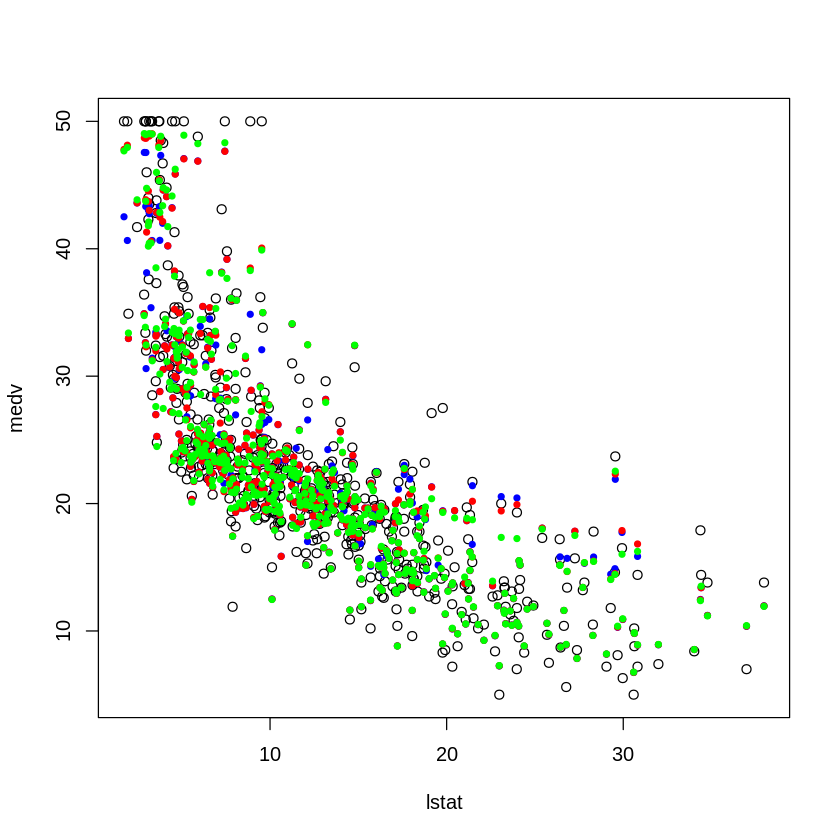

In [28]:
fitknn5 <- kknn(medv ~ . - chas, Boston, Boston)
yprime = fitknn5$fitted.values; sqrt(sum((Boston$medv-yprime)^2)/length(yprime)) #RMSE

fitknn6 <- kknn(medv ~ . - chas - ptratio -zn, Boston, Boston)
yprime = fitknn6$fitted.values; sqrt(sum((Boston$medv-yprime)^2)/length(yprime)) #RMSE

plot(medv~lstat)
points(lstat,fitknn1$fitted.values,col="blue",pch=20)
points(lstat,fitknn5$fitted.values,col="red",pch=20)
points(lstat,fitknn6$fitted.values,col="green",pch=20)


## M5

TREE-BASED + LINEAR REGRESSION

  - Instead of assigning a value to each leaf node, the M5 model assigns linear regressions
  - The tree structure can be used to understand relationships between predictor variables and response
  - Can hanlde continuous and discrete variables

In [29]:
install.packages("Cubist")
require(MASS)
require(Cubist)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Loading required package: Cubist

Loading required package: lattice



In [30]:
data <- Boston
tam <- length(names(data))

fitM5 <- cubist(x = data[, -tam], y = data$medv)#exclude medv (response) and define it in y - TRAINING THE MODEL

yprime = predict(fitM5,data)

cat('\n(M5) RMSE:', sqrt(sum((data$medv-yprime)^2)/length(yprime)), "\n")
summary(fitM5)


(M5) RMSE: 3.025956 



Call:
cubist.default(x = data[, -tam], y = data$medv)


Cubist [Release 2.07 GPL Edition]  Sat Apr 12 17:00:13 2025
---------------------------------

    Target attribute `outcome'

Read 506 cases (14 attributes) from undefined.data

Model:

  Rule 1: [101 cases, mean 13.84, range 5 to 27.5, est err 1.98]

    if
	nox > 0.668
    then
	outcome = -1.11 + 2.93 dis + 21.4 nox - 0.33 lstat + 0.008 black
	          - 0.13 ptratio - 0.02 crim - 0.003 age + 0.1 rm

  Rule 2: [203 cases, mean 19.42, range 7 to 31, est err 2.10]

    if
	nox <= 0.668
	lstat > 9.59
    then
	outcome = 23.57 + 3.1 rm - 0.81 dis - 0.71 ptratio - 0.048 age
	          - 0.15 lstat + 0.01 black - 0.0041 tax - 5.2 nox + 0.05 crim
	          + 0.02 rad

  Rule 3: [43 cases, mean 24.00, range 11.9 to 50, est err 2.56]

    if
	rm <= 6.226
	lstat <= 9.59
    then
	outcome = 1.18 + 3.83 crim + 4.3 rm - 0.06 age - 0.11 lstat - 0.003 tax
	          - 0.09 dis - 0.08 ptratio

  Rule 4: [163 cases, mean 31.46, range 16.5 to

```R
Call:
cubist.default(x = data[, -tam], y = data$medv)


Cubist [Release 2.07 GPL Edition]  Sun Apr  6 08:53:36 2025
---------------------------------

    Target attribute `outcome' ((OUTCOME = medv))

Read 506 cases (14 attributes) from undefined.data

Model:

  Rule 1: [101 cases, mean 13.84, range 5 to 27.5, est err 1.98] ((AVERAGE VALUE OF THE RESPONSE IN THOSE 101 CASES COVERED BY THE RULE, RANGE=[MIN, MAX], STANDARD DEVIATION OF TARGET VARIABLE))

    if
	nox > 0.668
    then
	outcome = -1.11 + 2.93 dis + 21.4 nox - 0.33 lstat + 0.008 black
	          - 0.13 ptratio - 0.02 crim - 0.003 age + 0.1 rm

  Rule 2: [203 cases, mean 19.42, range 7 to 31, est err 2.10]

    if
	nox <= 0.668
	lstat > 9.59
    then
	outcome = 23.57 + 3.1 rm - 0.81 dis - 0.71 ptratio - 0.048 age
	          - 0.15 lstat + 0.01 black - 0.0041 tax - 5.2 nox + 0.05 crim
	          + 0.02 rad

  Rule 3: [43 cases, mean 24.00, range 11.9 to 50, est err 2.56]

    if
	rm <= 6.226
	lstat <= 9.59
    then
	outcome = 1.18 + 3.83 crim + 4.3 rm - 0.06 age - 0.11 lstat - 0.003 tax
	          - 0.09 dis - 0.08 ptratio

  Rule 4: [163 cases, mean 31.46, range 16.5 to 50, est err 2.78]

    if
	rm > 6.226
	lstat <= 9.59
    then
	outcome = -4.71 + 2.22 crim + 9.2 rm - 0.83 lstat - 0.0182 tax
	          - 0.72 ptratio - 0.71 dis - 0.04 age + 0.03 rad - 1.7 nox
	          + 0.008 zn


Evaluation on training data (506 cases):

    Average  |error|               2.09 #((MAE))
    Relative |error|               0.32 # = MAE/AVERAGE(TARGET_VALUES) = PERCENTAGE OF THE RATION BETWEEN THE AVERAGE ERROR IN TERMS OF THE AVERAGE TARGET VALUE
    Correlation coefficient        0.94 #((LINEAR CORRELATION = GOOD FIT OF TRAINING DATA)) = PEARSON -PREARSON PRODUCT-MOMENT CORRELATION COEFFICIENT
    r = (Σ[(xi - x̄)(yi - ȳ)]) / (√[Σ(xi - x̄)²] * √[Σ(yi - ȳ)²])

	Attribute usage: #((PERCENTAGE OF TIMES EACH PREDICTOR VARIABLE IS USED IN THE MODEL RULES, PERCENTAGE OF TIME VARIABLES ARE USED IN THE CONDITIONS = IMPORTANT VARIABLE INVOLVED IN SPLITTING THE DATA IN DIFFERENT SUBSETS, PERCENTAGE OF TIME VARIABLES USED IN THE LINEAR MODELS))

	  Conds  Model

	   80%   100%    lstat
	   60%    92%    nox
	   40%   100%    rm
	         100%    crim
	         100%    age
	         100%    dis
	         100%    ptratio
	          80%    tax
	          72%    rad
	          60%    black
	          32%    zn


Time: 0.0 secs
```

# What does the correlation coefficient tells us ?

Linearity: Pearson correlation only measures linear relationships. If the relationship between the actual and predicted values is non-linear, the correlation coefficient might not accurately reflect the model's performance.

Outliers: Outliers in the data can significantly influence the Pearson correlation. It's essential to be aware of potential outliers and their impact on the interpretation.

Training Data: Remember that this correlation coefficient is calculated on the training data. It doesn't necessarily guarantee good performance on new, unseen data.

In [31]:
names(fitM5)

yprime=predict(fitM5,Boston)
sqrt(sum((Boston$medv-yprime)^2)/length(yprime)) #RMSE


[1] "data"         "names"        "caseWeights"  "model"        "output"      
 [6] "control"      "committees"   "maxd"         "dims"         "splits"      
[11] "usage"        "call"         "coefficients" "vars"

[1] 3.025956

ERROR: Error: object 'xtra' not found


#SOME NOTES

 Use the same partitions to test different algorithms

 Recommendation: have the distinct partitions in different files

how to make the partition manually?
```R
n <- length(names(xtra)) - 1
names(xtra)[1:n] <- paste ("X", 1:n, sep="")
names(xtra)[n+1] <- "Y"
```


AFTER DOWNLOADING CALIFORNIA SET FROM KEEL WEBPAGE

In [33]:
nombre <- "california" #change this depending on folder structure

run_lm_fold <- function(i, x, tt = "test") {

  file <- paste(x, '/', x, "-5-", i, "tra.dat", sep="") #change this dependind on folder stracture and file names
  x_tra <- read.csv(file, comment.char="@", header = FALSE)
  file <- paste(x, '/', x,  "-5-", i, "tst.dat", sep="")
  x_tst <- read.csv(file, comment.char="@", header = FALSE)
  In <- length(names(x_tra)) - 1
  names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
  names(x_tra)[In+1] <- "Y"
  names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
  names(x_tst)[In+1] <- "Y"
  if (tt == "train") {
  test <- x_tra

  }
  else {

  test <- x_tst

  }
  fitMulti=lm(Y~.,x_tra)
  yprime=predict(fitMulti,test)
  sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE

}
lmMSEtrain<-mean(sapply(1:5,run_lm_fold,nombre,"train"))
lmMSEtest<-mean(sapply(1:5,run_lm_fold,nombre,"test"))

Warning message in file(file, "rt"):
“cannot open file 'california/california-5-1tra.dat': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [34]:

nombre <- "california"
run_knn_fold <- function(i, x, tt = "test") {
  file <- paste(x, "-5-", i, "tra.dat", sep="")
  x_tra <- read.csv(file, comment.char="@", header = FALSE)
  file <- paste(x, "-5-", i, "tst.dat", sep="")
  x_tst <- read.csv(file, comment.char="@", header = FALSE)
  ln <- length(names(x_tra)) - 1
  names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
  names(x_tra)[In+1] <- "Y"
  names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
  names(x_tst)[In+1] <- "Y"
  if (tt == "train") {
    test <- x_tra
  }
  else {
    test <- x_tst
  }


  fitMulti=kknn(Y~.,x_tra,test)
  yprime=fitMulti$fitted.values
  sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}

knnMSEtrain<-mean(sapply(1:5,run_knn_fold,nombre,"train"))
knnMSEtest<-mean(sapply(1:5,run_knn_fold,nombre,"test"))


nombre <- "california"
run_m5p_fold <- function(i, x, tt= "test"){
  file <-paste(x, '/', x,  "-5-", i, "tra.dat", sep = "")
  xx_tra <- read.csv(file, comment.char="@", header=FALSE)
  file <- paste(x, "/", x, "-5-", i, "tst.dat", sep="")
  x_tst <- read.csv(file, comment.char= "@", header=FALSE)
  ln <- length(names(x_tra)) - 1
  names(x_tra)[1:ln] <- paste ("X", 1:ln, sep= "")
  names(x_tra)[ln + 1] <- "Y"
  names(x_tst)[1 + ln] <- paste ("X", 1:ln, sep="")
  names(x_tst)[ln + 1] <- "Y"
  if (tt == "train"){
    test <- xx_tra
  }
  else{
    test <- x_tst
  }
  fitMulti = cubist (x=x_tra[, -(ln + 1)], y=x_tra$Y)
  yprime = predict(fitMulti, test)
  sum(abs(test$Y-yprime)^2/length(yprime))
}

 m5MSEtrain<-mean(sapply(1:5,run_m5p_fold,nombre,"train"))
 m5MSEtest<-mean(sapply(1:5,run_m5p_fold,nombre,"test"))

Warning message in file(file, "rt"):
“cannot open file 'california-5-1tra.dat': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection
